# Step1: read data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)
print("data_labels:",dataset_labels)


data_labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Step2: 数据展示

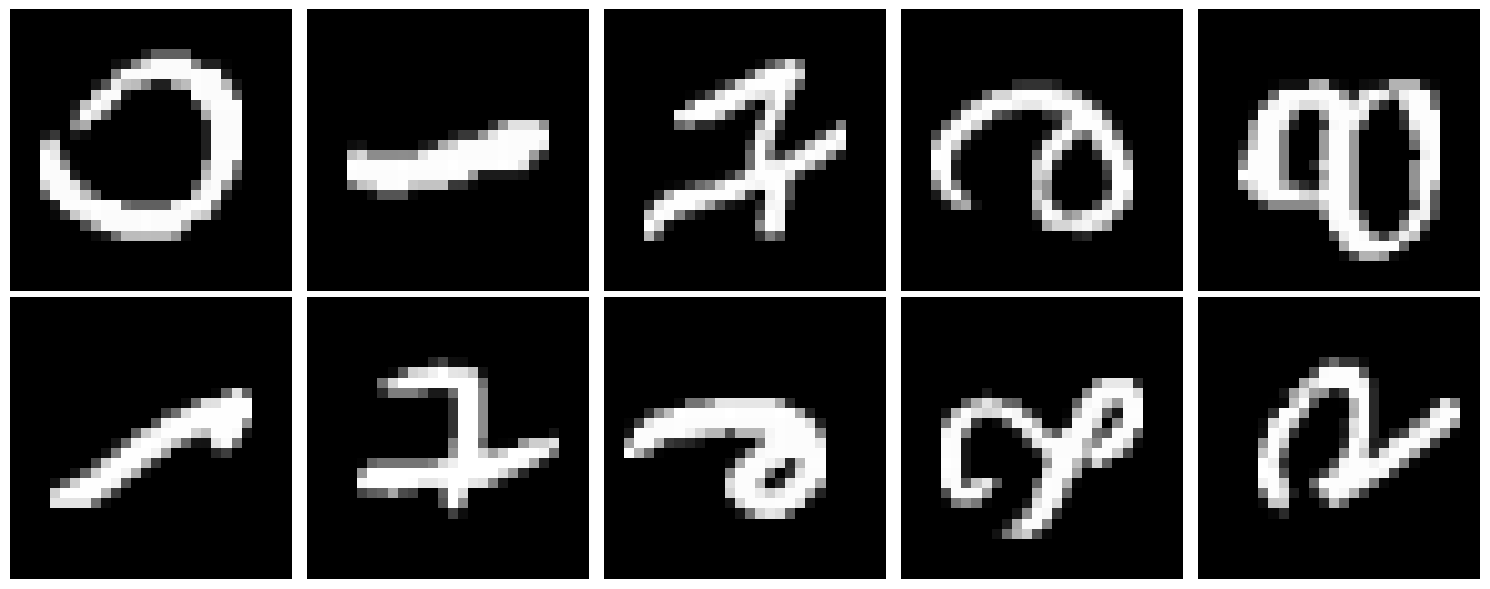

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 将每个1x784的向量重塑为28x28的矩阵，并显示这些图像
# 指定要显示的向量的索引
indices = [1, 300, 800, 1200, 1700, 2300, 2800, 3200, 3700, 3999]

# 确定行和列数
num_rows = 2
num_cols = (len(indices) + 1) // num_rows  # 确保有足够的列来显示所有图片

# 创建一个足够大的子图来显示这些图像
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

# 遍历每一个索引，并在对应的轴上显示图像
for i, index in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    image_matrix = np.array(data_vector[index]).reshape(28, 28)  # 将选定的向量重塑为 28x28 矩阵
    axes[row, col].imshow(image_matrix, cmap='gray')  # 用灰度颜色映射显示图像
    axes[row, col].axis('off')  # 关闭坐标轴

# 如果axes中有没用到的位置，关闭它们
for ax in axes.flat[len(indices):]:
    ax.axis('off')

plt.tight_layout()  # 调整子图间的间距
plt.show()  # 显示所有图像

# Step3: 数据随机选取

In [ ]:
import random


# 计算要抽取的元素数量，即 50%
num_to_select = len(dataset_labels) // 2

# 随机选取 50% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)

# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
print("selected_trainning_data:",selected_trainning_data)
print("selected_testing_data:",selected_testing_data)
print("selected_indices:",sorted(selected_indices))
print("remaining_indices:",sorted(remaining_indices))

selected_trainning_data: [5, 6, 7, 5, 5, 5, 6, 0, 2, 0, 6, 1, 3, 0, 7, 6, 4, 7, 3, 1, 6, 8, 8, 4, 8, 1, 4, 8, 1, 9, 6, 2, 0, 4, 7, 7, 0, 8, 6, 7, 5, 7, 2, 5, 8, 8, 0, 3, 9, 1, 5, 9, 6, 8, 8, 7, 3, 0, 7, 9, 9, 4, 3, 7, 8, 1, 3, 8, 1, 6, 1, 8, 5, 1, 9, 7, 6, 4, 3, 4, 4, 0, 1, 0, 5, 8, 8, 3, 5, 6, 6, 0, 1, 3, 5, 5, 5, 4, 6, 2, 8, 0, 0, 7, 1, 2, 8, 1, 8, 6, 0, 0, 2, 7, 0, 0, 3, 2, 2, 1, 9, 4, 4, 9, 7, 9, 9, 2, 4, 4, 1, 1, 2, 0, 2, 2, 1, 6, 4, 6, 8, 9, 7, 1, 2, 8, 1, 2, 5, 2, 4, 2, 3, 4, 0, 6, 4, 4, 0, 3, 5, 5, 8, 7, 2, 5, 1, 9, 3, 3, 0, 9, 8, 3, 6, 3, 3, 1, 2, 9, 9, 8, 6, 1, 7, 9, 5, 4, 6, 9, 4, 5, 7, 9, 9, 1, 7, 8, 9, 8, 6, 3, 7, 7, 9, 6, 3, 0, 1, 6, 1, 7, 9, 2, 0, 1, 9, 0, 2, 0, 9, 7, 2, 8, 3, 6, 2, 0, 1, 3, 7, 5, 4, 6, 8, 2, 6, 0, 7, 1, 5, 7, 1, 1, 2, 4, 1, 7, 1, 7, 6, 7, 8, 5, 2, 4, 1, 4, 0, 1, 7, 9, 5, 0, 3, 5, 6, 4, 3, 3, 4, 1, 1, 7, 4, 7, 3, 4, 5, 5, 2, 0, 9, 9, 2, 2, 0, 3, 1, 9, 0, 4, 3, 6, 4, 4, 7, 2, 3, 9, 9, 2, 3, 8, 5, 8, 5, 3, 7, 9, 7, 8, 2, 9, 2, 9, 7, 2, 3, 2, 6, 5, 0, 0, 4,

In [ ]:
train_dataset = [data_vector[index] for index in selected_indices]
test_dataset = [data_vector[index] for index in remaining_indices]
print("train_dataset:",train_dataset)
print("test_dataset:",test_dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Step4: transfer data to numpy.array

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
# 转换成 numpy array
train_dataset = np.array(train_dataset)
test_dataset = np.array(test_dataset)
train_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
train_labels

array([3, 4, 4, ..., 2, 2, 7])

In [ ]:
test_labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_dataset)
X_test_scaled = scaler.transform(test_dataset)

In [ ]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Step5: Init the machine learning methods

In [ ]:
# 初始化SVM分类器
svm_model = SVC()
# 初始化Logistic Regression分类器
logreg_model = LogisticRegression(max_iter=1000)
# 初始化Gaussian Naive Bayes分类器
gnb_model = GaussianNB()
# k近邻算法
knn = KNeighborsClassifier(n_neighbors=3)
# 随机森林
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# 梯度提升机
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
# 多层感知机
mlp = MLPClassifier(random_state=42)
# 自适应网络
ada = AdaBoostClassifier(n_estimators=100)
# 极端随机树
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

## A: Tra one time: Trainning by machine learning methods

In [ ]:
# 训练模型
svm_model.fit(X_train_scaled, train_labels)
logreg_model.fit(X_train_scaled, train_labels)
gnb_model.fit(X_train_scaled, train_labels)
knn.fit(X_train_scaled, train_labels)
random_forest.fit(X_train_scaled, train_labels)
gb.fit(X_train_scaled, train_labels)
mlp.fit(X_train_scaled, train_labels)
ada.fit(X_train_scaled, train_labels)
et.fit(X_train_scaled, train_labels)

ExtraTreesClassifier(random_state=42)

## B: Tra one time: Test by using test dataset

In [ ]:
# 预测测试集
predictions_svm = svm_model.predict(X_test_scaled)
predictions_logreg = logreg_model.predict(X_test_scaled)
predictions_gnb = gnb_model.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_gb = gb.predict(X_test_scaled)
predictions_mlp = mlp.predict(X_test_scaled)
predictions_ada = ada.predict(X_test_scaled)
predictions_et = et.predict(X_test_scaled)

## C: Tra one time: Get the score of test dataset

In [ ]:
# 计算准确率
accuracy_svm = accuracy_score(test_labels, predictions_svm)
accuracy_logreg = accuracy_score(test_labels, predictions_logreg)
accuracy_gnb = accuracy_score(test_labels, predictions_gnb)
accuracy_knn = accuracy_score(test_labels, predictions_knn)
accuracy_rf = accuracy_score(test_labels, predictions_rf)
accuracy_gb = accuracy_score(test_labels, predictions_gb)
accuracy_mlp = accuracy_score(test_labels, predictions_mlp)
accuracy_ada = accuracy_score(test_labels, predictions_ada)
accuracy_et = accuracy_score(test_labels, predictions_et)

In [ ]:
print(f'SVM Accuracy: {accuracy_svm}')
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb}')
print(f'knn Accuracy: {accuracy_knn}')
print(f'Random Forests Accuracy: {accuracy_rf}')
print(f'Gradient Boosting Machines Accuracy: {accuracy_gb}')
print(f'Neural Networks Accuracy: {accuracy_mlp}')
print(f'AdaBoost Accuracy: {accuracy_ada}')
print(f'Extra Trees Accuracy: {accuracy_et}')

SVM Accuracy: 0.888
Logistic Regression Accuracy: 0.8805
Gaussian Naive Bayes Accuracy: 0.6225
knn Accuracy: 0.863
Random Forests Accuracy: 0.9235
Gradient Boosting Machines Accuracy: 0.742
Neural Networks Accuracy: 0.9065
AdaBoost Accuracy: 0.5295
Extra Trees Accuracy: 0.9335


So we finally get the accuracy based on machine learning methods.But at this time we don't use any ways the find the best model.

# Step6: Find best Machine Learning model

## A. Init parameters

In [ ]:
import time
import psutil
from tqdm import tqdm
X = np.array(data_vector)
y = np.array(dataset_labels)
svm_accuracies = []
logreg_accuracies = []
gnb_accuracies = []
knn_accuracies = []
rf_accuracies = []
gb_accuracies = []
mlp_accuracies = []
ada_accuracies = []
et_accuracies = []
# 这里记录准确率的最高点和对应的test_size
svm_best = (0, 0)
logreg_best = (0, 0)
gnb_best = (0, 0)
knn_best = (0, 0)
rf_best = (0, 0)
gb_best = (0, 0)
mlp_best = (0, 0)
ada_best = (0, 0)
et_best = (0, 0)
model_svm = None
model_logreg = None
model_gnb = None
model_knn = None
model_rf = None
model_gb = None
model_mlp = None
model_ada = None
model_et = None

## B. Training and save parameters into dict

In [ ]:
# 初始化性能监控数据结构
performance_data = {
    'svm': {'times': [], 'cpu_usages': [], 'latencies': []},
    'logreg': {'times': [], 'cpu_usages': [], 'latencies': []},
    'gnb': {'times': [], 'cpu_usages': [], 'latencies': []},
    'knn': {'times': [], 'cpu_usages': [], 'latencies': []},
    'rf': {'times': [], 'cpu_usages': [], 'latencies': []},
    'gb': {'times': [], 'cpu_usages': [], 'latencies': []},
    'mlp': {'times': [], 'cpu_usages': [], 'latencies': []},
    'ada': {'times': [], 'cpu_usages': [], 'latencies': []},
    'et': {'times': [], 'cpu_usages': [], 'latencies': []}
}

X = np.array(data_vector)
y = np.array(dataset_labels)
test_sizes = np.linspace(0.1, 0.9, 9)

for i in tqdm(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'svm': SVC(),
        'logreg': LogisticRegression(max_iter=1000),
        'gnb': GaussianNB(),
        'knn': KNeighborsClassifier(n_neighbors=3),
        'rf': RandomForestClassifier(n_estimators=100, random_state=42),
        'gb': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
        'mlp': MLPClassifier(random_state=42),
        'ada': AdaBoostClassifier(n_estimators=100),
        'et': ExtraTreesClassifier(n_estimators=100, random_state=42)
    }

    for key, model in models.items():
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        end_time = time.time()

        # 计算模型预测时间以及CPU占用
        cpu_usage_start = psutil.cpu_percent(interval=1)
        latency_start = time.time()
        predictions = model.predict(X_test_scaled)
        latency_end = time.time()
        cpu_usage_end = psutil.cpu_percent(interval=1)

        performance_data[key]['times'].append(end_time - start_time)
        performance_data[key]['cpu_usages'].append(cpu_usage_end - cpu_usage_start)
        performance_data[key]['latencies'].append(latency_end - latency_start)

        # 计算准确率并更新最佳记录
        accuracy = accuracy_score(y_test, predictions)
        globals()[f'{key}_accuracies'].append(accuracy)
        if accuracy > globals()[f'{key}_best'][1]:
            globals()[f'{key}_best'] = (i, accuracy)
            globals()[f'model_{key}'] = model


100%|██████████| 9/9 [10:41<00:00, 71.32s/it]


## C. Plot all accuracies

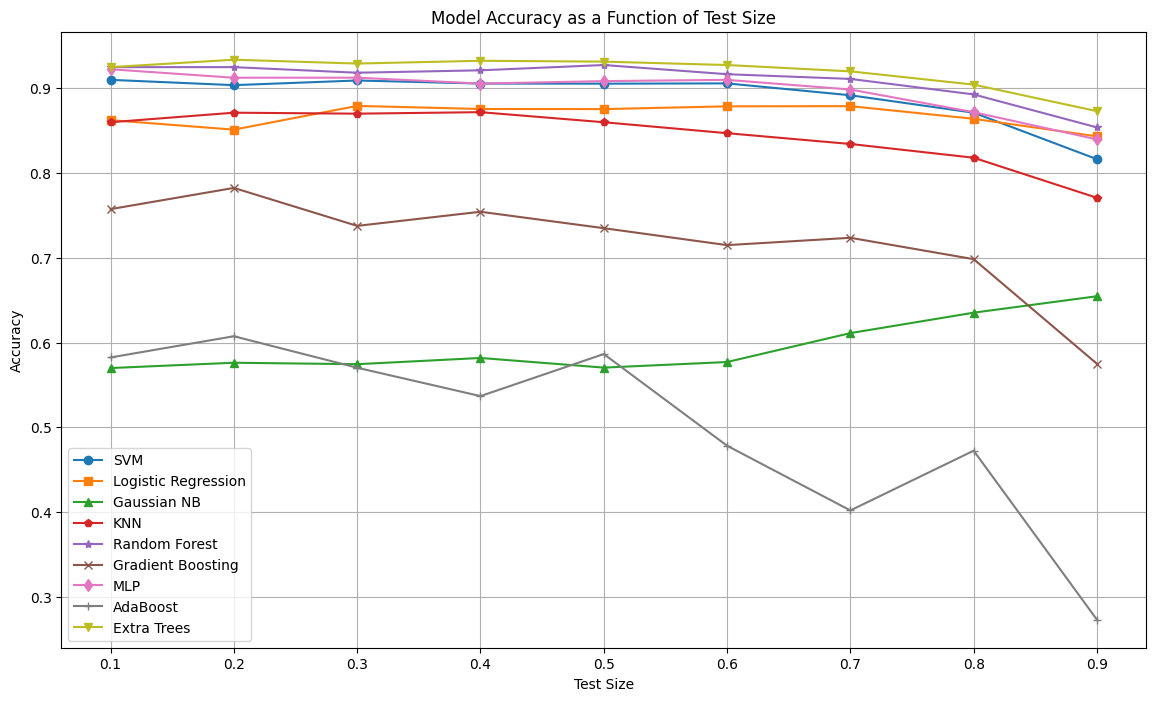

In [ ]:
import matplotlib.pyplot as plt

# 绘制模型准确率随测试集大小变化的图
plt.figure(figsize=(14, 8))
plt.plot(test_sizes, svm_accuracies, marker='o', label='SVM')
plt.plot(test_sizes, logreg_accuracies, marker='s', label='Logistic Regression')
plt.plot(test_sizes, gnb_accuracies, marker='^', label='Gaussian NB')
plt.plot(test_sizes, knn_accuracies, marker='p', label='KNN')
plt.plot(test_sizes, rf_accuracies, marker='*', label='Random Forest')
plt.plot(test_sizes, gb_accuracies, marker='x', label='Gradient Boosting')
plt.plot(test_sizes, mlp_accuracies, marker='d', label='MLP')
plt.plot(test_sizes, ada_accuracies, marker='+', label='AdaBoost')
plt.plot(test_sizes, et_accuracies, marker='v', label='Extra Trees')
plt.title('Model Accuracy as a Function of Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## D. Plot all parameters which had been saved

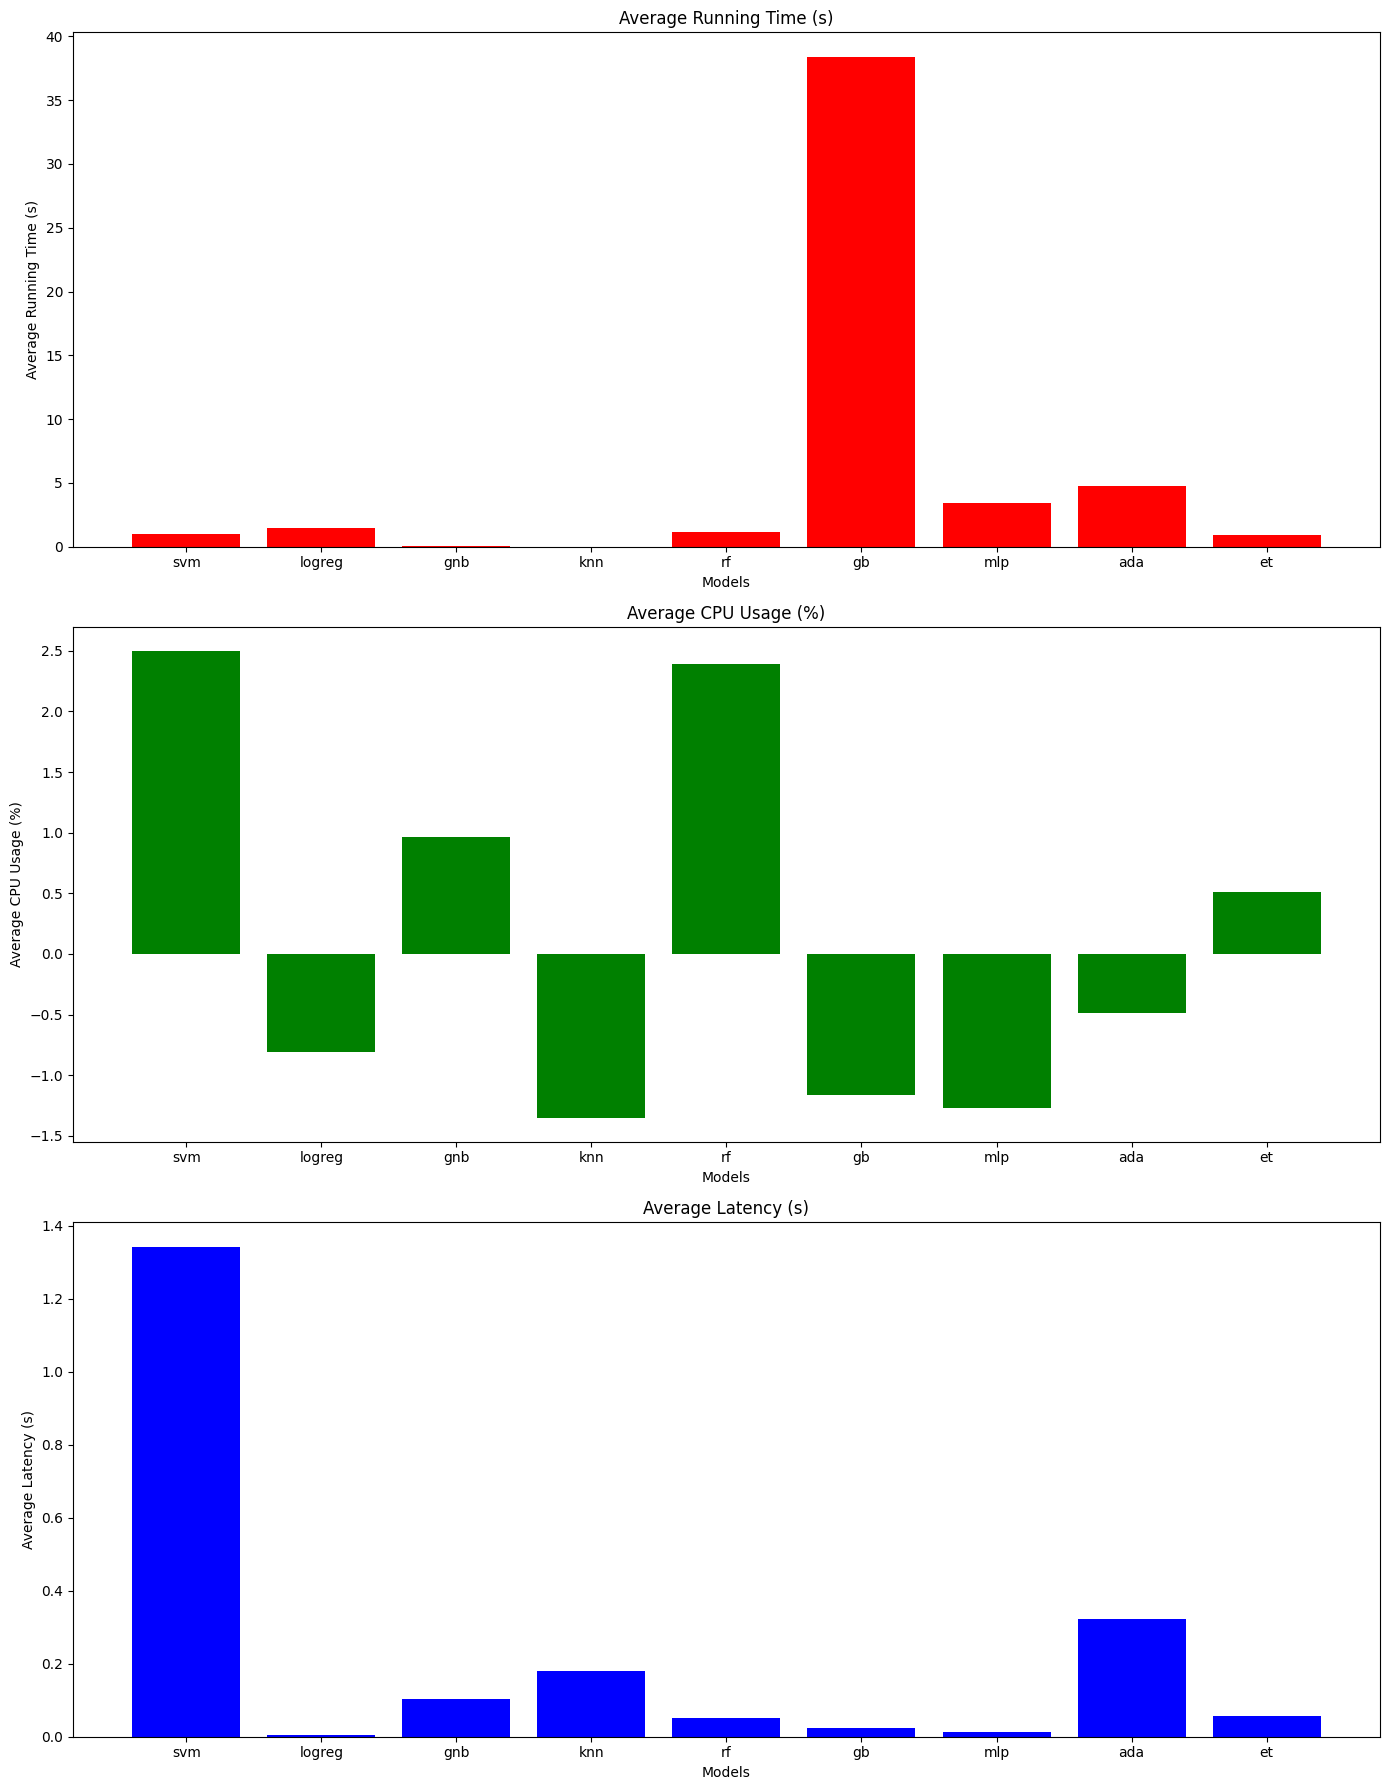

In [ ]:
import matplotlib.pyplot as plt


# 绘制模型性能图（运行时间、CPU占用、延迟）
fig, ax = plt.subplots(3, 1, figsize=(14, 18))
metrics = ['times', 'cpu_usages', 'latencies']
titles = ['Average Running Time (s)', 'Average CPU Usage (%)', 'Average Latency (s)']
colors = ['r', 'g', 'b']

for index, metric in enumerate(metrics):
    for key in performance_data:
        avg_metric = np.mean(performance_data[key][metric])
        ax[index].bar(key, avg_metric, color=colors[index % len(colors)])
    ax[index].set_title(titles[index])
    ax[index].set_ylabel(titles[index])
    ax[index].set_xlabel('Models')

plt.tight_layout()
plt.show()


## E. Plot in different ways

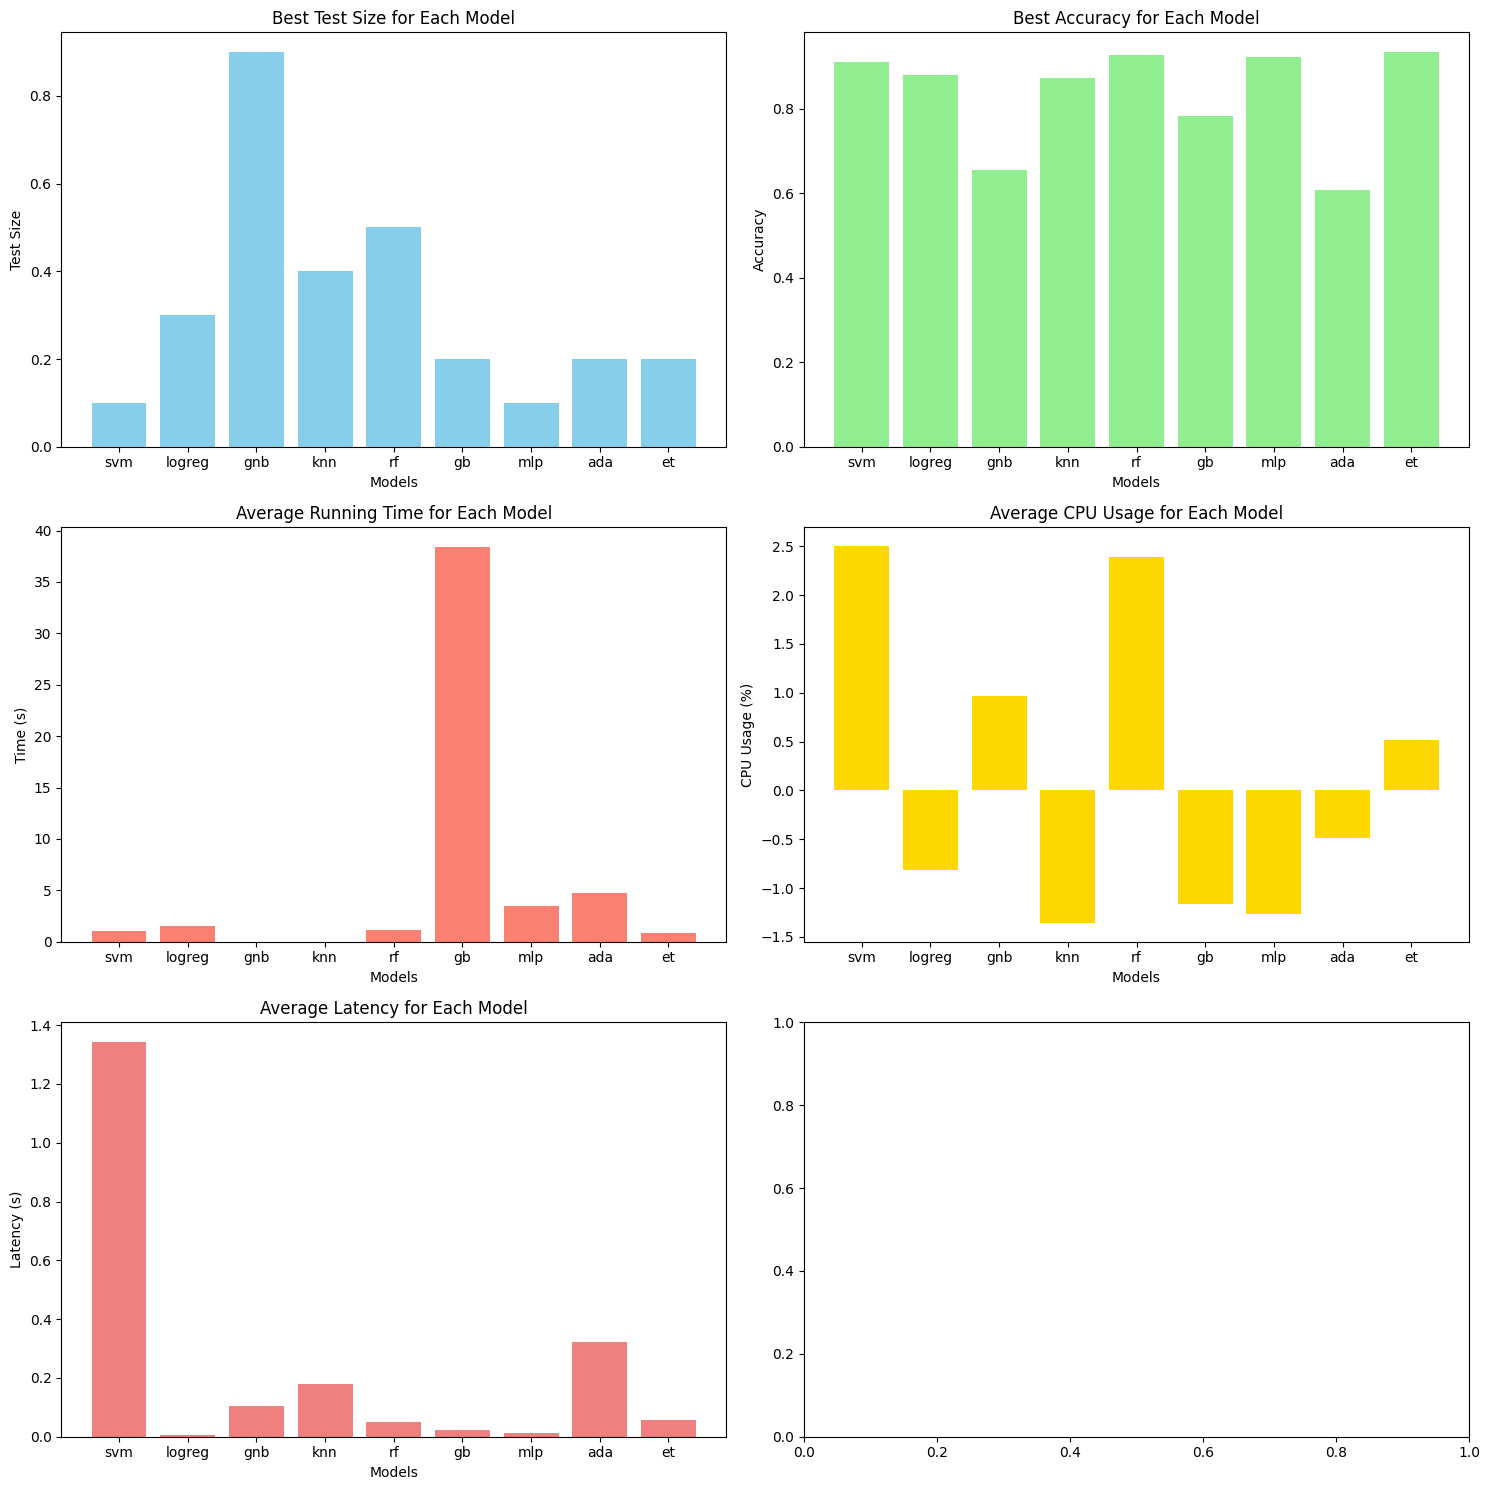

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
model_names = ['svm', 'logreg', 'gnb', 'knn', 'rf', 'gb', 'mlp', 'ada', 'et']
best_test_sizes = [globals()[f'{name}_best'][0] for name in model_names]
best_accuracies = [globals()[f'{name}_best'][1] for name in model_names]
avg_times = [np.mean(performance_data[name]['times']) for name in model_names]
avg_cpus = [np.mean(performance_data[name]['cpu_usages']) for name in model_names]
avg_latencies = [np.mean(performance_data[name]['latencies']) for name in model_names]

# 创建图表
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 调整子图布局大小

# 最佳测试尺寸
axs[0, 0].bar(model_names, best_test_sizes, color='skyblue')
axs[0, 0].set_title('Best Test Size for Each Model')
axs[0, 0].set_ylabel('Test Size')
axs[0, 0].set_xlabel('Models')

# 最高准确率
axs[0, 1].bar(model_names, best_accuracies, color='lightgreen')
axs[0, 1].set_title('Best Accuracy for Each Model')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].set_xlabel('Models')

# 平均运行时间
axs[1, 0].bar(model_names, avg_times, color='salmon')
axs[1, 0].set_title('Average Running Time for Each Model')
axs[1, 0].set_ylabel('Time (s)')
axs[1, 0].set_xlabel('Models')

# 平均CPU占用率
axs[1, 1].bar(model_names, avg_cpus, color='gold')
axs[1, 1].set_title('Average CPU Usage for Each Model')
axs[1, 1].set_ylabel('CPU Usage (%)')
axs[1, 1].set_xlabel('Models')

# 平均延迟
axs[2, 0].bar(model_names, avg_latencies, color='lightcoral')
axs[2, 0].set_title('Average Latency for Each Model')
axs[2, 0].set_ylabel('Latency (s)')
axs[2, 0].set_xlabel('Models')

# 调整布局
fig.tight_layout()
plt.show()


## F. Save all parameters to csv

In [ ]:
import pandas as pd


# 创建三个空的DataFrame
df_times = pd.DataFrame()
df_cpu_usages = pd.DataFrame()
df_latencies = pd.DataFrame()

# 填充这三个DataFrame
for model, metrics in performance_data.items():
    df_times[model] = metrics['times']
    df_cpu_usages[model] = metrics['cpu_usages']
    df_latencies[model] = metrics['latencies']

# 将DataFrame保存为CSV
df_times.to_csv('/content/drive/My Drive/result/model_times.csv', index=False)
df_cpu_usages.to_csv('/content/drive/My Drive/result/model_cpu_usages.csv', index=False)
df_latencies.to_csv('/content/drive/My Drive/result/model_latencies.csv', index=False)

print("Data for times, CPU usages, and latencies has been saved to separate CSV files.")


Data for times, CPU usages, and latencies has been saved to separate CSV files.


**So we can not only plot the parameters, but also save them into csv**

## G. Print all information

In [ ]:
# 打印最高准确率点
print(f'SVM Best Test Size: {svm_best[0]}, Accuracy: {svm_best[1]:.2f}')
print(f'Logistic Regression Best Test Size: {logreg_best[0]}, Accuracy: {logreg_best[1]:.2f}')
print(f'Gaussian Naive Bayes Best Test Size: {gnb_best[0]}, Accuracy: {gnb_best[1]:.2f}')
# 打印最高准确率点
print(f'knn Best Test Size: {knn_best[0]}, Accuracy: {knn_best[1]:.2f}')
print(f'rf Best Test Size: {rf_best[0]}, Accuracy: {rf_best[1]:.2f}')
print(f'gb Best Test Size: {gb_best[0]}, Accuracy: {gb_best[1]:.2f}')
# 打印最高准确率点
print(f'mlp Best Test Size: {mlp_best[0]}, Accuracy: {mlp_best[1]:.2f}')
print(f'ada Best Test Size: {ada_best[0]}, Accuracy: {ada_best[1]:.2f}')
print(f'et Best Test Size: {et_best[0]}, Accuracy: {et_best[1]:.2f}')
# 保存模型
print(model_svm)
print(model_logreg)
print(model_gnb)
print(model_knn)
print(model_rf)
print(model_gb)
print(model_mlp)
print(model_ada)
print(model_et)

SVM Best Test Size: 0.1, Accuracy: 0.91
Logistic Regression Best Test Size: 0.30000000000000004, Accuracy: 0.88
Gaussian Naive Bayes Best Test Size: 0.9, Accuracy: 0.65
knn Best Test Size: 0.4, Accuracy: 0.87
rf Best Test Size: 0.5, Accuracy: 0.93
gb Best Test Size: 0.2, Accuracy: 0.78
mlp Best Test Size: 0.1, Accuracy: 0.92
ada Best Test Size: 0.2, Accuracy: 0.61
et Best Test Size: 0.2, Accuracy: 0.93
SVC()
LogisticRegression(max_iter=1000)
GaussianNB()
KNeighborsClassifier(n_neighbors=3)
RandomForestClassifier(random_state=42)
GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)
MLPClassifier(random_state=42)
AdaBoostClassifier(n_estimators=100)
ExtraTreesClassifier(random_state=42)


## H. Save all models

In [ ]:
import pickle

# 保存模型
with open('/content/drive/My Drive/ml_model_old/model_svm_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_svm, file)
with open('/content/drive/My Drive/ml_model_old/model_logreg_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_logreg, file)
with open('/content/drive/My Drive/ml_model_old/model_gnb_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_gnb, file)
with open('/content/drive/My Drive/ml_model_old/model_knn_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_knn, file)
with open('/content/drive/My Drive/ml_model_old/model_rf_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
with open('/content/drive/My Drive/ml_model_old/model_gb_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_gb, file)
with open('/content/drive/My Drive/ml_model_old/model_mlp_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_mlp, file)
with open('/content/drive/My Drive/ml_model_old/model_ada_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_ada, file)
with open('/content/drive/My Drive/ml_model_old/model_et_no_cross_val_2.pkl', 'wb') as file:
    pickle.dump(model_et, file)

# Step7: using k-fold cross validation

## A. import pakages

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import time
import psutil
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import pickle

## B. Init parameters and read data

In [ ]:
# 初始化性能监控数据结构
performance_data = {
    'svm': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'logreg': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'gnb': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'knn': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'rf': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'gb': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'mlp': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'ada': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]},
    'et': {'times': [], 'cpu_usages': [], 'latencies': [],'accuracies':[]}
}
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)
X = np.array(data_vector)
y = np.array(dataset_labels)
test_sizes = np.linspace(0.1, 0.9, 9)


## C. Init models

In [ ]:
models = {
    'svm': SVC(),
    'logreg': LogisticRegression(max_iter=1000),
    'gnb': GaussianNB(),
    'knn': KNeighborsClassifier(n_neighbors=3),
    'rf': RandomForestClassifier(n_estimators=100, random_state=42),
    'gb': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    'mlp': MLPClassifier(random_state=42),
    'ada': AdaBoostClassifier(n_estimators=100),
    'et': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

## D. Start to train and save parameters

In [ ]:
for key in models.keys():
    for i in tqdm(test_sizes):
        start_time = time.time()  # 开始计时
        cpu_start = psutil.cpu_percent(interval=None)  # 获取CPU使用率

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model = models[key]
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)

        elapsed_time = time.time() - start_time  # 计算运行时间
        cpu_end = psutil.cpu_percent(interval=None)  # 获取CPU结束时的使用率
        cpu_usage = (cpu_end - cpu_start) / 2  # 估算平均CPU使用率

        # 模拟延迟
        latency = elapsed_time / len(X_test)  # 假设延迟与测试集大小成比例

        accuracy = accuracy_score(y_test, predictions)
        performance_data[key]['accuracies'].append(accuracy)
        performance_data[key]['times'].append(elapsed_time)
        performance_data[key]['cpu_usages'].append(cpu_usage)
        performance_data[key]['latencies'].append(latency)

100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


## E. Save parameters to csv

In [ ]:
df_times = pd.DataFrame()
df_cpu_usages = pd.DataFrame()
df_latencies = pd.DataFrame()

# 填充DataFrames
for model, metrics in performance_data.items():
    df_times[model] = metrics['times']
    df_cpu_usages[model] = metrics['cpu_usages']
    df_latencies[model] = metrics['latencies']

# 将DataFrames保存到CSV文件
df_times.to_csv('/content/drive/My Drive/result/model_times_val.csv', index=False)
df_cpu_usages.to_csv('/content/drive/My Drive/result/model_cpu_usages_val.csv', index=False)
df_latencies.to_csv('/content/drive/My Drive/result/model_latencies_val.csv', index=False)
print("Data for times, CPU usages and latencies has been saved to separate CSV files.")

Data for times, CPU usages and latencies has been saved to separate CSV files.


## F. Plot parameters

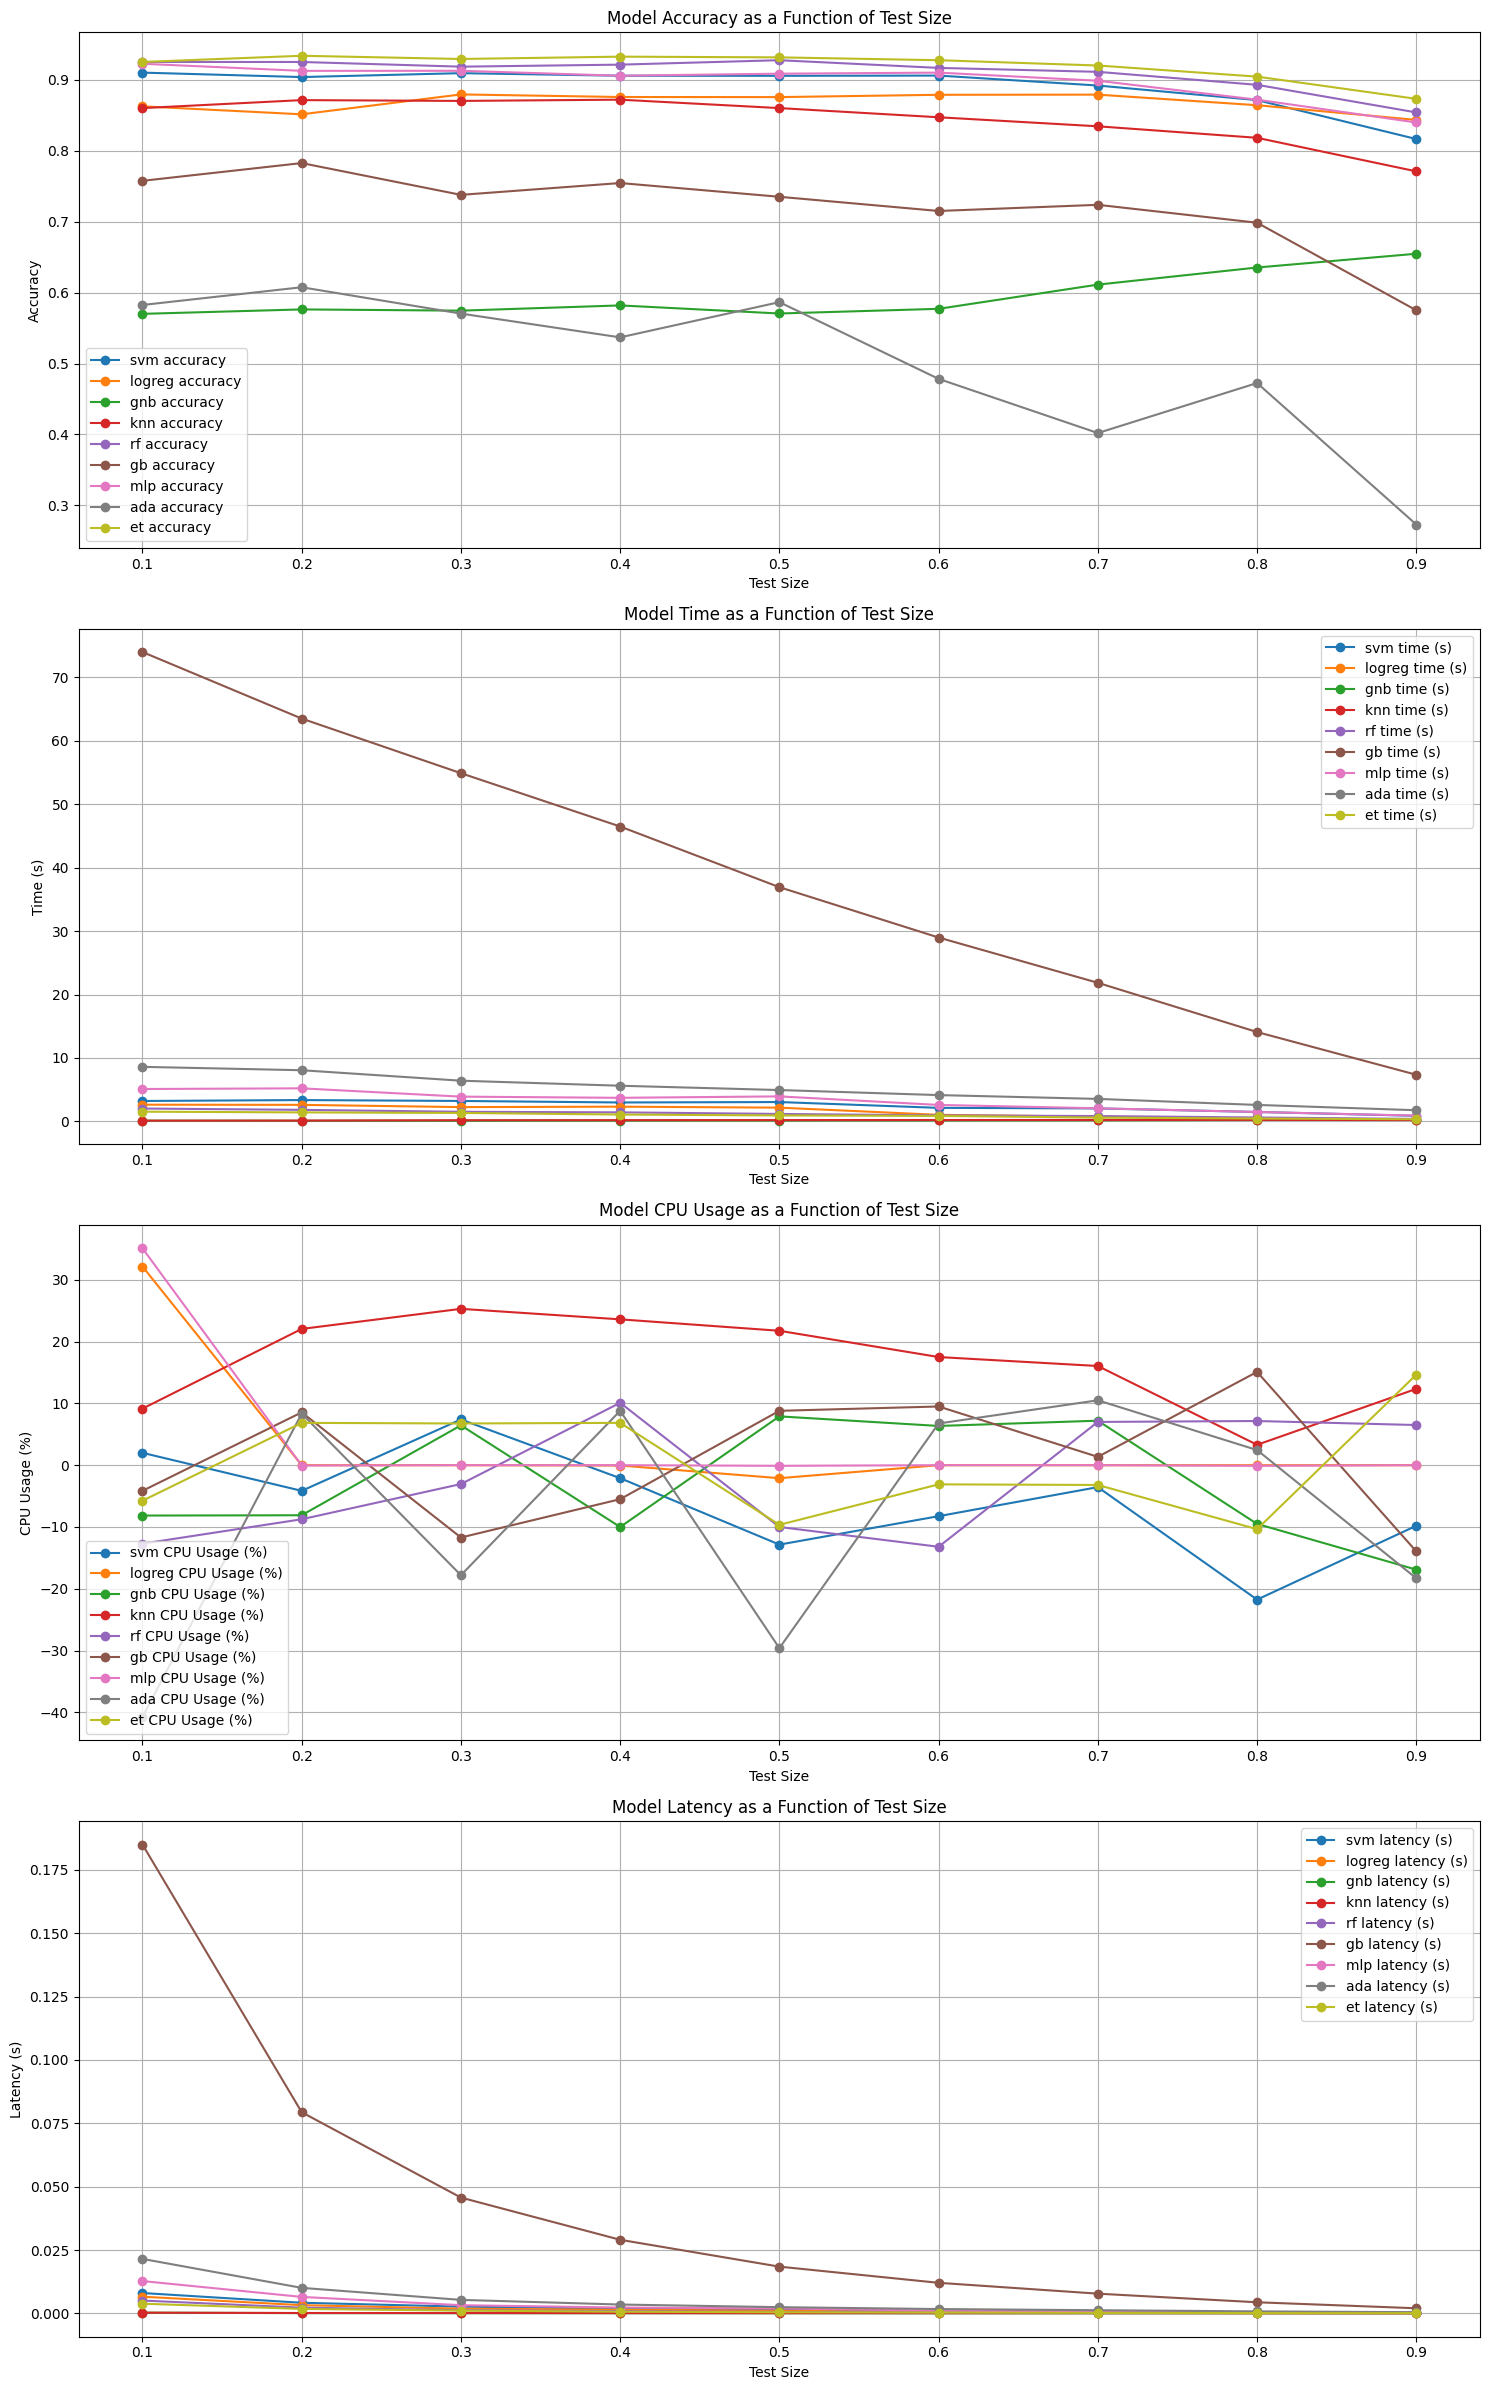

In [ ]:
# 绘制准确率、运行时间、CPU使用率和延迟的图表
fig, axs = plt.subplots(4, 1, figsize=(15, 24))  # 创建4个子图

for key in performance_data:
    accuracies = performance_data[key]['accuracies']
    times = performance_data[key]['times']
    cpu_usages = performance_data[key]['cpu_usages']
    latencies = performance_data[key]['latencies']

    # 绘制准确率
    axs[0].plot(test_sizes, accuracies, marker='o', label=f'{key} accuracy')
    # 绘制运行时间
    axs[1].plot(test_sizes, times, marker='o', label=f'{key} time (s)')
    # 绘制CPU使用率
    axs[2].plot(test_sizes, cpu_usages, marker='o', label=f'{key} CPU Usage (%)')
    # 绘制延迟
    axs[3].plot(test_sizes, latencies, marker='o', label=f'{key} latency (s)')
# 设置图表标题和标签
axs[0].set_title('Model Accuracy as a Function of Test Size')
axs[0].set_xlabel('Test Size')
axs[0].set_ylabel('Accuracy')

axs[1].set_title('Model Time as a Function of Test Size')
axs[1].set_xlabel('Test Size')
axs[1].set_ylabel('Time (s)')

axs[2].set_title('Model CPU Usage as a Function of Test Size')
axs[2].set_xlabel('Test Size')
axs[2].set_ylabel('CPU Usage (%)')

axs[3].set_title('Model Latency as a Function of Test Size')
axs[3].set_xlabel('Test Size')
axs[3].set_ylabel('Latency (s)')

# 添加图例
for ax in axs:
    ax.legend()
    ax.grid(True)

# 显示图表
plt.tight_layout()
plt.show()


## G. Save best models based on this dataset

In [ ]:
# 保存每个模型的最佳配置
for key in models.keys():
    best_model = models[key]
    best_accuracy = max(performance_data[key]['accuracies'])
    best_index = performance_data[key]['accuracies'].index(best_accuracy)
    best_test_size = test_sizes[best_index]

    # 保存模型
    model_filename = f'/content/drive/My Drive/ml_model_new/{key}_best_model.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model, file)

    print(f'{key.title()} Best Model saved with accuracy: {best_accuracy:.2f} at test size: {best_test_size}')

Svm Best Model saved with accuracy: 0.91 at test size: 0.1
Logreg Best Model saved with accuracy: 0.88 at test size: 0.30000000000000004
Gnb Best Model saved with accuracy: 0.65 at test size: 0.9
Knn Best Model saved with accuracy: 0.87 at test size: 0.4
Rf Best Model saved with accuracy: 0.93 at test size: 0.5
Gb Best Model saved with accuracy: 0.78 at test size: 0.2
Mlp Best Model saved with accuracy: 0.92 at test size: 0.1
Ada Best Model saved with accuracy: 0.61 at test size: 0.2
Et Best Model saved with accuracy: 0.93 at test size: 0.2


# Step 8: Using deep learning methods

# Step 9: Using Neural Network

## A. Import packages

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import torch.optim as optim
import numpy as np
from torchvision import transforms
from tqdm import tqdm
from sklearn.model_selection import train_test_split


## B.Read dataset by using pytorch

In [ ]:
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)
X = np.array(data_vector)
y = np.array(dataset_labels)
# 将数据分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
train_data = torch.FloatTensor(X_train)
test_data = torch.FloatTensor(X_test)
# 假设 train_labels 和 test_labels 是已经加载好的标签
train_labels = torch.LongTensor(y_train)
test_labels = torch.LongTensor(y_test)
# 创建数据加载器
train_loader = DataLoader(
    dataset=TensorDataset(train_data, train_labels), batch_size=64, shuffle=True)
test_loader = DataLoader(
    dataset=TensorDataset(test_data, test_labels), batch_size=64, shuffle=False)
print(train_loader)
print(test_loader)

## C. Define my own Neural Network

In [ ]:
# 定义模型
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x


## D. Trainning NN model

In [ ]:
# 定义模型、损失函数和优化器
model_nn = NeuralNet()
criterion_nn = nn.CrossEntropyLoss()
optimizer_nn = optim.Adam(model_nn.parameters(), lr=0.001)

# 训练模型
num_epochs = 15
for epoch in tqdm(range(num_epochs)):
    model_nn.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Compute prediction and loss
        pred = model_nn(data)
        loss = criterion_nn(pred, target)

        # Backpropagation
        optimizer_nn.zero_grad()
        loss.backward()
        optimizer_nn.step()

        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Finished training")

  7%|▋         | 1/15 [00:00<00:04,  3.40it/s]

Epoch [1/15], Step [1/32], Loss: 13.2268
Epoch [2/15], Step [1/32], Loss: 0.2195


 20%|██        | 3/15 [00:00<00:01,  6.61it/s]

Epoch [3/15], Step [1/32], Loss: 0.0329
Epoch [4/15], Step [1/32], Loss: 0.0333


 33%|███▎      | 5/15 [00:00<00:01,  8.11it/s]

Epoch [5/15], Step [1/32], Loss: 0.0060
Epoch [6/15], Step [1/32], Loss: 0.0288


 47%|████▋     | 7/15 [00:00<00:00,  8.15it/s]

Epoch [7/15], Step [1/32], Loss: 0.0417
Epoch [8/15], Step [1/32], Loss: 0.0015


 60%|██████    | 9/15 [00:01<00:00,  7.85it/s]

Epoch [9/15], Step [1/32], Loss: 0.0012
Epoch [10/15], Step [1/32], Loss: 0.0021


 73%|███████▎  | 11/15 [00:01<00:00,  7.65it/s]

Epoch [11/15], Step [1/32], Loss: 0.1852
Epoch [12/15], Step [1/32], Loss: 0.2629


 87%|████████▋ | 13/15 [00:01<00:00,  7.63it/s]

Epoch [13/15], Step [1/32], Loss: 0.3106
Epoch [14/15], Step [1/32], Loss: 0.0636


100%|██████████| 15/15 [00:02<00:00,  7.40it/s]

Epoch [15/15], Step [1/32], Loss: 0.1176
Finished training


## E. Metric NN model

In [ ]:
# 评估模型
model_nn.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader:
        outputs = model_nn(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 92.25 %


## F: Init parameters

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import time

# 设备选择
device = (
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)
print(f"Using {device} device")

# 初始化性能数据字典
performance_metrics = {
    "batch_size": 64,
    "epochs": 15,
    "optimizer_params": {"lr": 0.001, "betas": (0.9, 0.999)},
    "model_name": "NeuralNet",
    "training_time": [],
    "average_latency": [],
    "memory_usage": [],
    "final_loss": []
}

# 开始模型训练和评估
max_accuracy = 0
best_test_rate = 0.1
# 使用np.arange生成从0.1到0.9的序列，步长为0.05
test_sizes = np.arange(0.1, 0.95, 0.05)  # 终止值设为0.95是为了确保包含0.9
accuracies = []
best_nn_model = None

Using cuda device


## G. Training to find the best model

In [ ]:
for i in tqdm(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)

    train_data = torch.FloatTensor(X_train)
    test_data = torch.FloatTensor(X_test)
    train_labels = torch.LongTensor(y_train)
    test_labels = torch.LongTensor(y_test)

    train_loader = DataLoader(dataset=TensorDataset(train_data, train_labels), batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset=TensorDataset(test_data, test_labels), batch_size=64, shuffle=False)

    model_nn = NeuralNet().to(device)
    criterion_nn = nn.CrossEntropyLoss()
    optimizer_nn = optim.Adam(model_nn.parameters(), **performance_metrics["optimizer_params"])

    start_time = time.time()

    for epoch in range(performance_metrics["epochs"]):
        model_nn.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            pred = model_nn(data)
            loss = criterion_nn(pred, target)
            optimizer_nn.zero_grad()
            loss.backward()
            optimizer_nn.step()

    epoch_time = time.time() - start_time
    performance_metrics["training_time"].append(epoch_time)
    performance_metrics["final_loss"].append(loss.item())

    if torch.cuda.is_available():
        performance_metrics["memory_usage"].append(torch.cuda.memory_allocated())

    # 评估模型
    model_nn.eval()
    total, correct = 0, 0
    latency_start = time.time()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model_nn(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    latency_end = time.time()
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    performance_metrics["average_latency"].append(latency_end - latency_start)

    if max_accuracy < accuracy:
        max_accuracy = accuracy
        best_test_rate = i
        best_nn_model = model_nn

print("最大准确率为：", max_accuracy)
print("取到最大准确率最佳测试集比例为：", best_test_rate)
torch.save(best_nn_model.state_dict(), '/content/drive/My Drive/dl_model/best_nn_model_new.pth')
print(test_sizes)

100%|██████████| 17/17 [00:18<00:00,  1.06s/it]

最大准确率为： 93.00437226733291
取到最大准确率最佳测试集比例为： 0.40000000000000013
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9 ]


**So when we use 60% of data to train and 40% to test, the accuracy is 93.0%**

## H. Plot the line chart

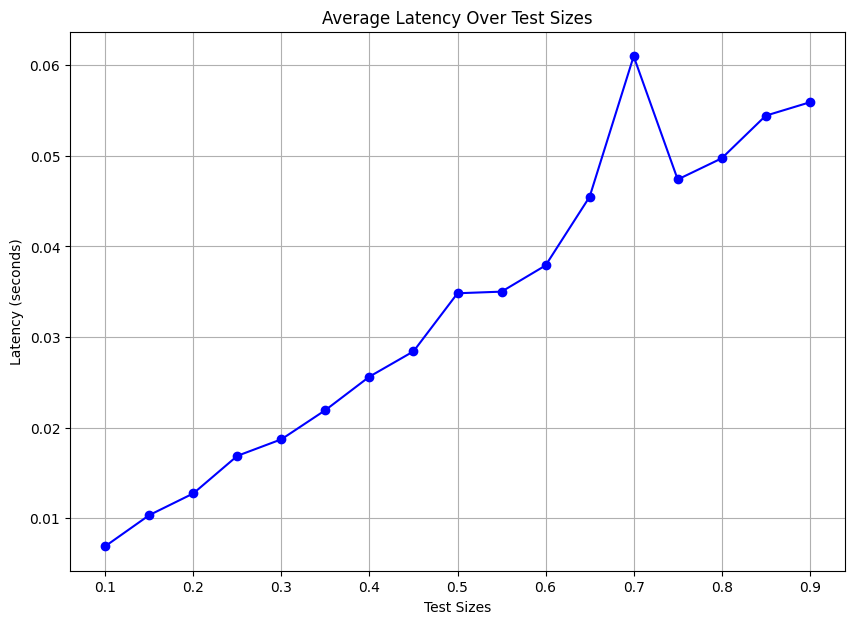

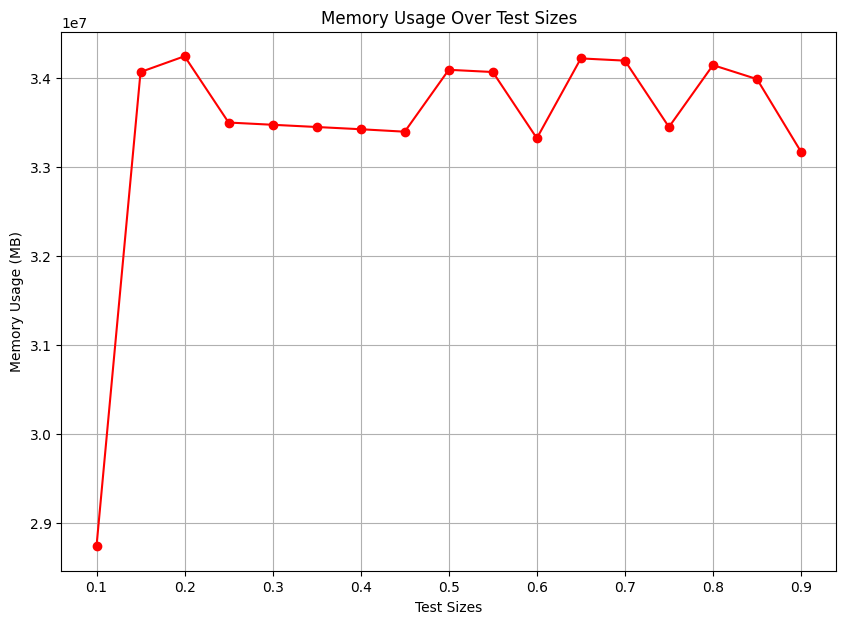

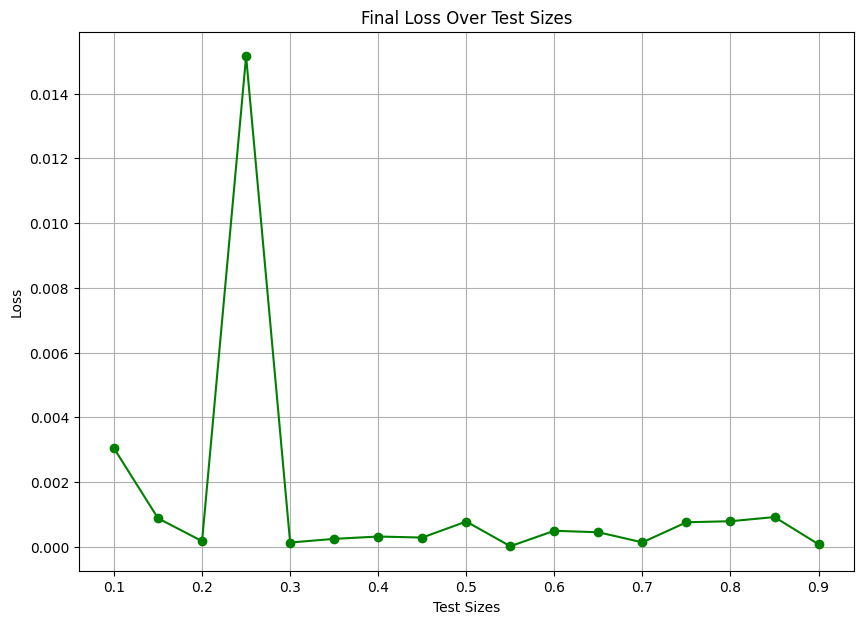

In [ ]:
import matplotlib.pyplot as plt

# 绘制平均延迟图
plt.figure(figsize=(10, 7))
plt.plot(test_sizes,performance_metrics["average_latency"], marker='o', linestyle='-', color='b')
plt.title("Average Latency Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("Latency (seconds)")
plt.grid(True)
plt.show()

# 绘制内存使用图
plt.figure(figsize=(10, 7))
plt.plot(test_sizes,performance_metrics["memory_usage"], marker='o', linestyle='-', color='r')
plt.title("Memory Usage Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("Memory Usage (MB)")
plt.grid(True)
plt.show()

# 绘制损失图
plt.figure(figsize=(10, 7))
plt.plot(test_sizes,performance_metrics["final_loss"], marker='o', linestyle='-', color='g')
plt.title("Final Loss Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


## I. Save all data to csv

In [ ]:
import pandas as pd
df_NeuralNet = pd.DataFrame()

df_NeuralNet['average_latency'] = performance_metrics['average_latency']
df_NeuralNet['memory_usage'] = performance_metrics['memory_usage']
df_NeuralNet['final_loss'] = performance_metrics['final_loss']

# 将DataFrames保存到CSV文件
df_NeuralNet.to_csv('/content/drive/My Drive/result_neuralNet/model_NeuralNet.csv', index=False)
print("Data for times, CPU usages and latencies has been saved to separate CSV files.")

Data for times, CPU usages and latencies has been saved to separate CSV files.


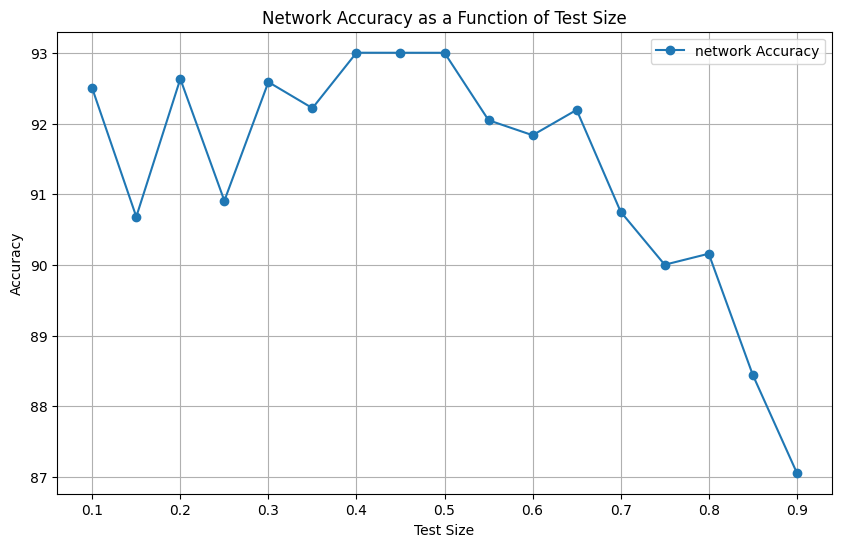

In [ ]:
import matplotlib.pyplot as plt
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', label='network Accuracy')
plt.title('Network Accuracy as a Function of Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Using CNN

## A. Reading data and import packadges

In [ ]:
# import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import random
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)
# 计算要抽取的元素数量，即 50%
num_to_select = len(dataset_labels) // 2

# 随机选取 50% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)

# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)
print("train_X shape:", train_X.shape)
print("train_Y shape:", train_Y.shape)
print("test_X shape:", test_X.shape)
print("test_Y shape:", test_Y.shape)

# 创建PyTorch数据加载器
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)

train_X shape: torch.Size([2000, 1, 28, 28])
train_Y shape: torch.Size([2000])
test_X shape: torch.Size([2000, 1, 28, 28])
test_Y shape: torch.Size([2000])


## B. Define my own CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 1024)
        self.fc2 = nn.Linear(1024, 10)  # 假设有10个类别

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## C: Train CNN model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_cnn = CNN().to(device)
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

num_epochs = 15
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # 前向传播
        outputs = model_cnn(images)
        loss = criterion_cnn(outputs, labels)

        # 反向传播和优化
        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


 20%|██        | 3/15 [00:01<00:04,  2.95it/s]

Epoch [1/15], Loss: 1.0650
Epoch [2/15], Loss: 1.0064
Epoch [3/15], Loss: 0.6689


 33%|███▎      | 5/15 [00:01<00:02,  4.80it/s]

Epoch [4/15], Loss: 0.4966
Epoch [5/15], Loss: 0.3738
Epoch [6/15], Loss: 0.2670


 60%|██████    | 9/15 [00:01<00:00,  7.80it/s]

Epoch [7/15], Loss: 0.0112
Epoch [8/15], Loss: 0.0273
Epoch [9/15], Loss: 0.0197


 73%|███████▎  | 11/15 [00:01<00:00,  8.84it/s]

Epoch [10/15], Loss: 0.0012
Epoch [11/15], Loss: 0.0153
Epoch [12/15], Loss: 0.0008


100%|██████████| 15/15 [00:02<00:00,  6.67it/s]

Epoch [13/15], Loss: 0.0022
Epoch [14/15], Loss: 0.0004
Epoch [15/15], Loss: 0.0005


## D. Metric CNN model

In [ ]:
model_cnn.eval()  # 设置模型为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total}%')

100%|██████████| 32/32 [00:00<00:00, 784.92it/s]

Accuracy on the test set: 93.5%


**So the test set accuracy is 93.5%**

## E. Get the best model parameters

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import time
import matplotlib.pyplot as plt


In [ ]:
# 初始化存储结果的字典
results = {
    "test_accuracy": [],
    "training_time": [],
    "memory_usage": [],
    "final_loss": []
}

device = (
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)
print(f"Using {device} device")
test_sizes = np.arange(0.1, 0.95, 0.05)
max_accuracy = 0
best_model_cnn = None
accuracies = []
for i in tqdm(test_sizes):
    start_time = time.time()

    # 数据处理和模型初始化代码

    train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
    test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)

    model_cnn = CNN().to(device)
    criterion_cnn = nn.CrossEntropyLoss()
    optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)

    memory_usage = torch.cuda.memory_allocated(device)  # 初始显存占用
    # 训练模型
    num_epochs = 15
    final_loss = 0
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            pred = model_cnn(data)
            loss = criterion_cnn(pred, target)
            optimizer_cnn.zero_grad()
            loss.backward()
            optimizer_cnn.step()
            final_loss = loss.item()
    memory_usage = torch.cuda.memory_allocated(device) - memory_usage  # 计算增加的显存占用
    training_time = time.time() - start_time
    model_cnn.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model_cnn(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_accuracy = 100 * correct / total
    accuracies.append(100 * correct / total)

    results["test_accuracy"].append(test_accuracy)
    results["training_time"].append(training_time)
    results["memory_usage"].append(memory_usage)
    results["final_loss"].append(final_loss)
    if max_accuracy < 100 * correct / total:
        max_accuracy = 100 * correct / total
        best_test_rate = i
        best_model_cnn = model_cnn
print("最大准确率为：",max_accuracy)
print("取到最大准确率最佳测试集比例为：",best_test_rate)
torch.save(best_model_cnn.state_dict(), '/content/drive/My Drive/dl_model/best_model_cnn_new.pth')

Using cuda device


100%|██████████| 17/17 [00:25<00:00,  1.51s/it]

最大准确率为： 96.55
取到最大准确率最佳测试集比例为： 0.1


We find the max accuracy is 96.55%,and at this time,the best test ratio is 10%

## F: Plot line chart by the accuracies of different test sizes

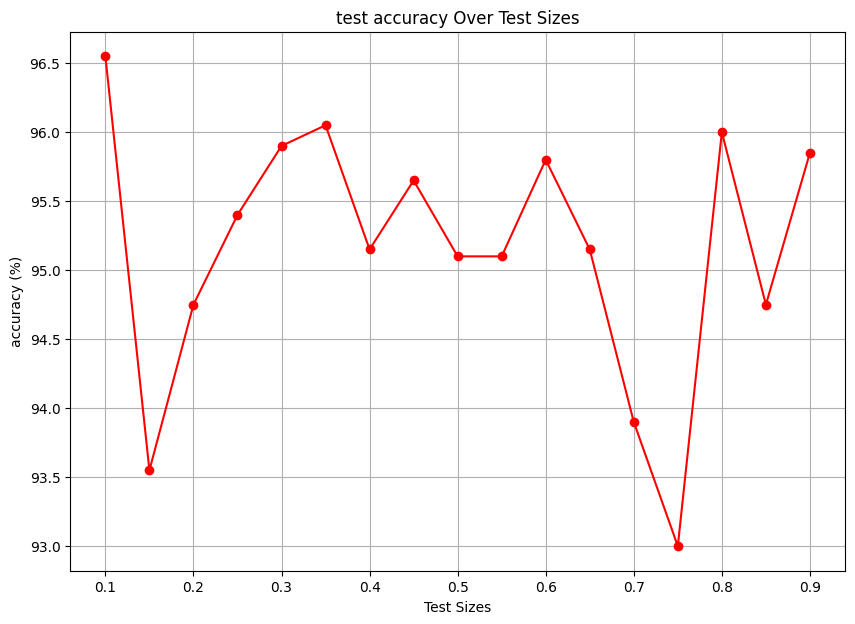

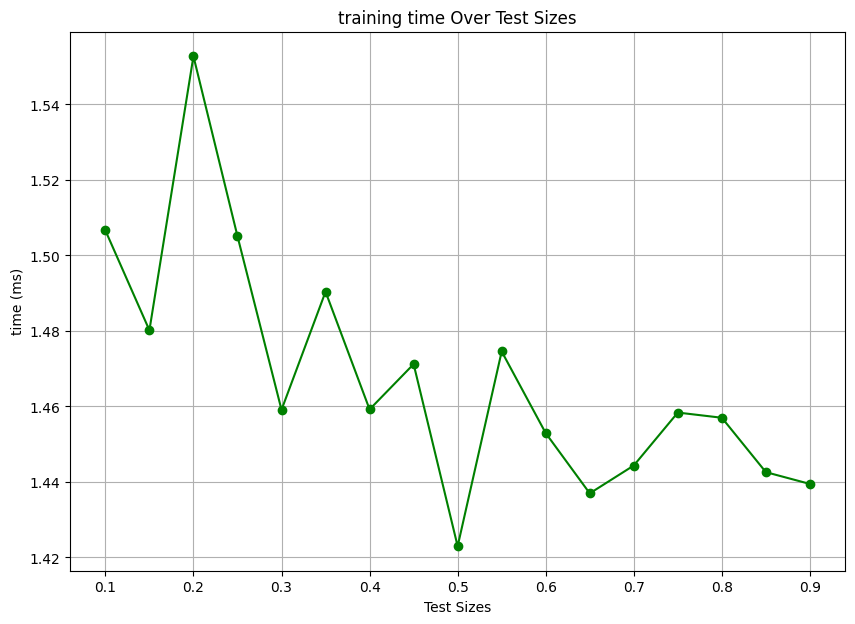

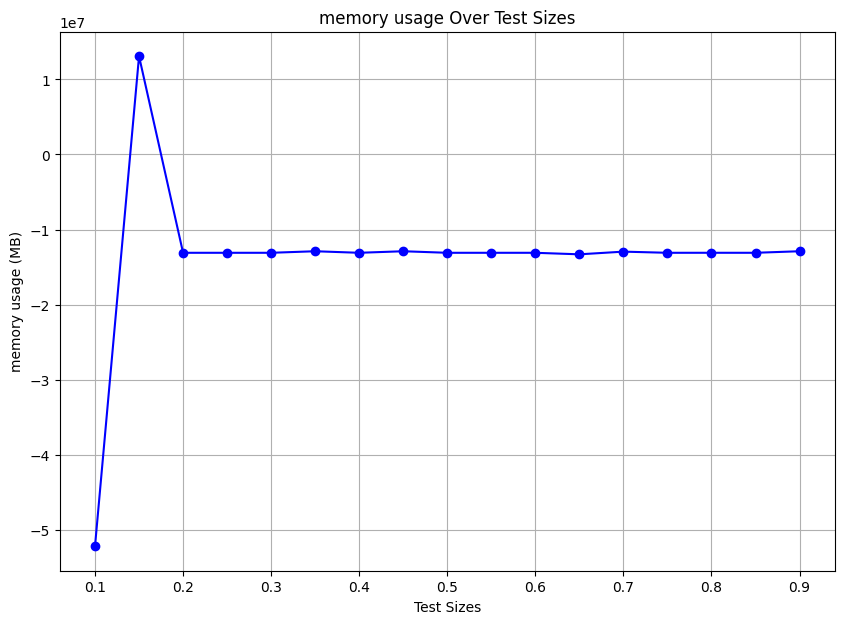

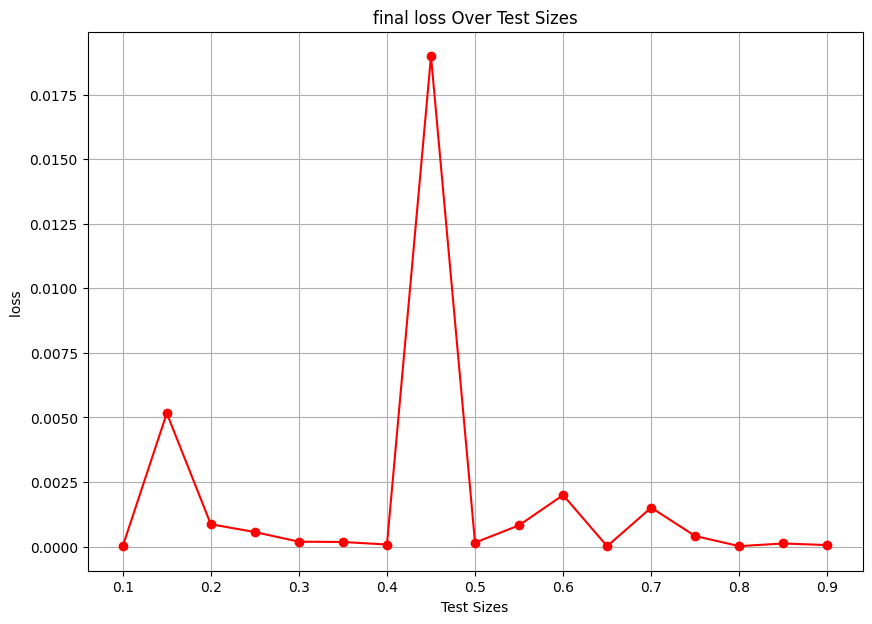

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(test_sizes, results["test_accuracy"], label="test_accuracy",marker='o', linestyle='-', color='r')
plt.title("test accuracy Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("accuracy (%)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(test_sizes, results["training_time"], label="training_time",marker='o', linestyle='-', color='g')
plt.title("training time Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("time (ms)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(test_sizes, results["memory_usage"], label="memory_usage",marker='o', linestyle='-', color='b')
plt.title("memory usage Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("memory usage (MB)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(test_sizes, results["final_loss"], label="final_loss",marker='o', linestyle='-', color='r')
plt.title("final loss Over Test Sizes")
plt.xlabel("Test Sizes")
plt.ylabel("loss ")
plt.grid(True)
plt.show()

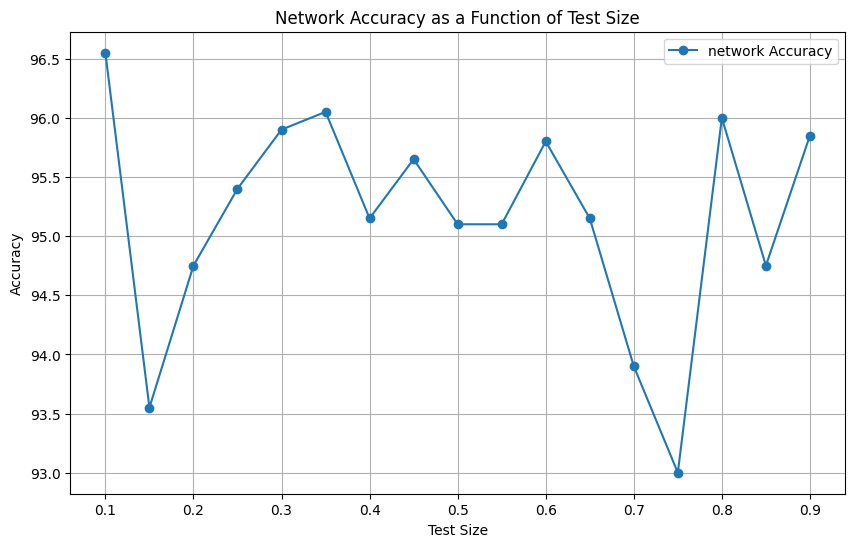

In [ ]:
import matplotlib.pyplot as plt
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', label='network Accuracy')
plt.title('Network Accuracy as a Function of Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## G. Save all parameters to csv

In [ ]:
# 将结果存储到CSV文件
df = pd.DataFrame(results)
df.to_csv('/content/drive/My Drive/result_cnn/model_performance_metrics.csv', index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


# Step11: Using LeNet-5 Network

## A. Init parameters

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 输入通道1, 输出通道6, 卷积核大小5
        self.pool = nn.MaxPool2d(2, 2)   # 池化层, 窗口大小2, 步长2
        self.conv2 = nn.Conv2d(6, 16, 5) # 输入通道6, 输出通道16, 卷积核大小5
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 输入特征维度, 输出特征维度
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 假设有10个类别

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## B. Load data

In [ ]:
import random
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import torch.optim as optim
import numpy as np
from torchvision import transforms
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import time
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 50% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
# 这里继续使用前面初始化数据集的代码
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

# 创建PyTorch数据加载器
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)

## C.Train the network

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_net5 = LeNet5().to(device)
criterion_net5 = nn.CrossEntropyLoss()
optimizer_net5 = torch.optim.Adam(model_net5.parameters(), lr=0.001)

epochs = 10
for epoch in tqdm(range(epochs)):
    model_net5.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer_net5.zero_grad()
        outputs = model_net5(images)
        loss = criterion_net5(outputs, labels)
        loss.backward()
        optimizer_net5.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

 20%|██        | 2/10 [00:00<00:01,  6.10it/s]

Epoch [1/10], Loss: 0.4016
Epoch [2/10], Loss: 0.1444


 40%|████      | 4/10 [00:00<00:00,  6.49it/s]

Epoch [3/10], Loss: 0.1736
Epoch [4/10], Loss: 0.0268


 60%|██████    | 6/10 [00:00<00:00,  6.55it/s]

Epoch [5/10], Loss: 0.0524
Epoch [6/10], Loss: 0.0116


 80%|████████  | 8/10 [00:01<00:00,  6.63it/s]

Epoch [7/10], Loss: 0.0192
Epoch [8/10], Loss: 0.0605


100%|██████████| 10/10 [00:01<00:00,  6.49it/s]

Epoch [9/10], Loss: 0.0027
Epoch [10/10], Loss: 0.0033


In [ ]:
# 评估模型
model_net5.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model_net5(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 96.375 %


## D. Get the best model parameters

In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
max_accuracy = 0
best_test_rate = 0.1
test_sizes = np.arange(0.1, 0.95, 0.05)
best_model_leNet = None
accuracies = []
# 初始化存储数据的字典
performance_metrics = {
    "test_accuracy": [],
    "training_time": [],
    "memory_usage": [],
    "final_loss": []
}

for i in tqdm(test_sizes):
    start_time = time.time()  # 开始计时

    # 定义模型、损失函数和优化器
    model_net5 = LeNet5().to(device)
    criterion_net5 = nn.CrossEntropyLoss()
    optimizer_net5 = optim.Adam(model_net5.parameters(), lr=0.001)

    initial_memory_usage = torch.cuda.memory_allocated(device)  # 初始显存占用
    peak_memory_usage = initial_memory_usage  # 峰值显存占用

    # 训练模型
    model_net5.train()
    final_loss = 0
    num_epochs = 15
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            pred = model_net5(data)
            loss = criterion_net5(pred, target)
            optimizer_net5.zero_grad()
            loss.backward()
            optimizer_net5.step()
            final_loss = loss.item()  # 更新最终损失值

            # 更新峰值显存占用
            current_memory_usage = torch.cuda.memory_allocated(device)
            if current_memory_usage > peak_memory_usage:
                peak_memory_usage = current_memory_usage

    training_time = time.time() - start_time  # 计算训练时间

    # 评估模型
    model_net5.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model_net5(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy} %')
    accuracies.append(accuracy)
    # 将数据添加到字典
    performance_metrics["test_accuracy"].append(accuracy)
    performance_metrics["training_time"].append(training_time)
    performance_metrics["memory_usage"].append(peak_memory_usage - initial_memory_usage)
    performance_metrics["final_loss"].append(final_loss)
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        best_test_rate = i
        best_model_leNet = model_net5
print("最大准确率为：",max_accuracy)
print("取到最大准确率最佳测试集比例为：",best_test_rate)
torch.save(best_model_leNet.state_dict(), '/content/drive/My Drive/dl_model/best_model_LeNet5_new.pth')

Using cuda device


  6%|▌         | 1/17 [00:02<00:40,  2.50s/it]

Accuracy of the network on the test images: 94.75 %


 12%|█▏        | 2/17 [00:04<00:36,  2.44s/it]

Accuracy of the network on the test images: 96.375 %


 18%|█▊        | 3/17 [00:07<00:33,  2.41s/it]

Accuracy of the network on the test images: 97.0 %


 24%|██▎       | 4/17 [00:09<00:31,  2.39s/it]

Accuracy of the network on the test images: 95.375 %


 29%|██▉       | 5/17 [00:11<00:28,  2.37s/it]

Accuracy of the network on the test images: 96.625 %


 35%|███▌      | 6/17 [00:14<00:26,  2.38s/it]

Accuracy of the network on the test images: 96.375 %


 41%|████      | 7/17 [00:16<00:23,  2.38s/it]

Accuracy of the network on the test images: 96.875 %


 47%|████▋     | 8/17 [00:19<00:21,  2.37s/it]

Accuracy of the network on the test images: 96.125 %


 53%|█████▎    | 9/17 [00:21<00:18,  2.37s/it]

Accuracy of the network on the test images: 97.625 %


 59%|█████▉    | 10/17 [00:23<00:16,  2.36s/it]

Accuracy of the network on the test images: 95.75 %


 65%|██████▍   | 11/17 [00:26<00:14,  2.36s/it]

Accuracy of the network on the test images: 97.5 %


 71%|███████   | 12/17 [00:28<00:11,  2.37s/it]

Accuracy of the network on the test images: 95.75 %


 76%|███████▋  | 13/17 [00:30<00:09,  2.38s/it]

Accuracy of the network on the test images: 96.75 %


 82%|████████▏ | 14/17 [00:33<00:07,  2.38s/it]

Accuracy of the network on the test images: 96.625 %


 88%|████████▊ | 15/17 [00:35<00:04,  2.37s/it]

Accuracy of the network on the test images: 96.5 %


 94%|█████████▍| 16/17 [00:38<00:02,  2.37s/it]

Accuracy of the network on the test images: 96.25 %


100%|██████████| 17/17 [00:40<00:00,  2.38s/it]

Accuracy of the network on the test images: 96.75 %
最大准确率为： 97.625
取到最大准确率最佳测试集比例为： 0.5000000000000001


Maximum accuracy: 97.625.
The best test set ratio to obtain the maximum accuracy is: 0.5

##  E. Plot some important parameters

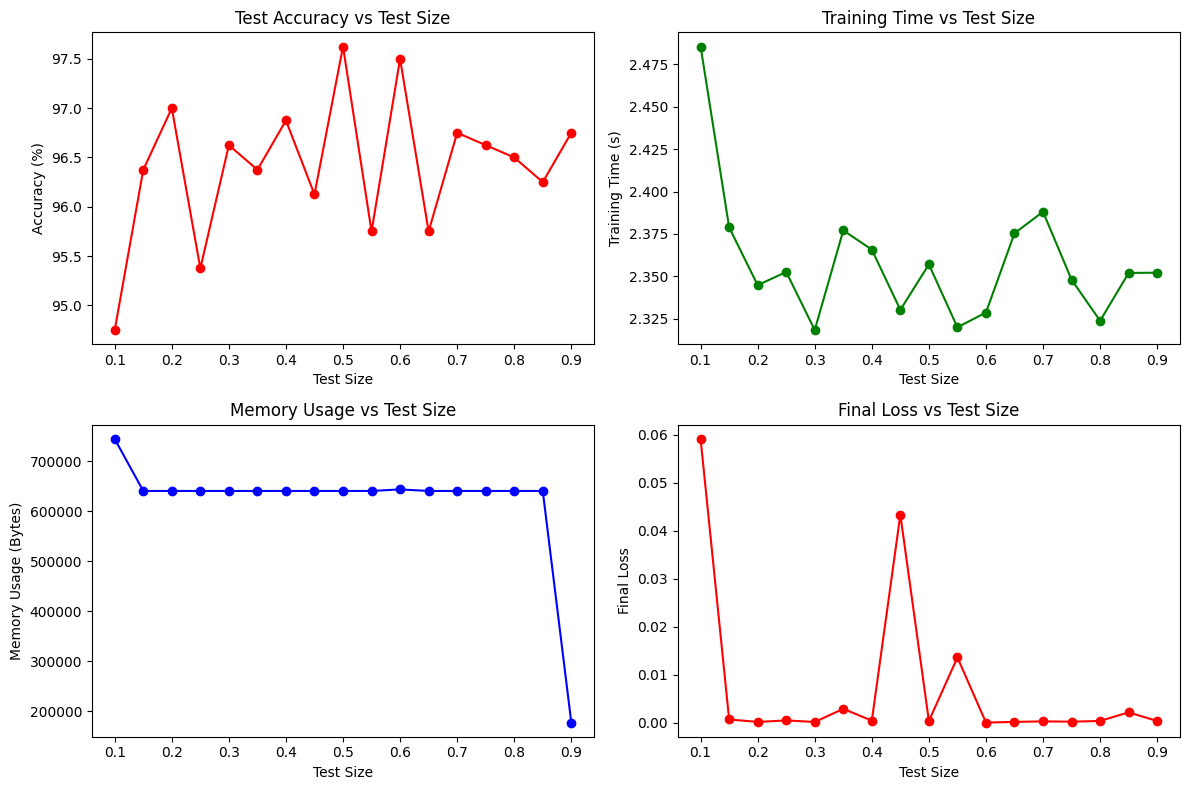

In [ ]:
import matplotlib.pyplot as plt
# 绘图
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(test_sizes, performance_metrics["test_accuracy"], marker='o', color='r')
plt.title('Test Accuracy vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 2)
plt.plot(test_sizes, performance_metrics["training_time"], marker='o', color='g')
plt.title('Training Time vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Training Time (s)')

plt.subplot(2, 2, 3)
plt.plot(test_sizes, performance_metrics["memory_usage"], marker='o', color='b')
plt.title('Memory Usage vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Memory Usage (Bytes)')

plt.subplot(2, 2, 4)
plt.plot(test_sizes, performance_metrics["final_loss"], marker='o', color='r')
plt.title('Final Loss vs Test Size')
plt.xlabel('Test Size')
plt.ylabel('Final Loss')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(performance_metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_LeNet_5/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


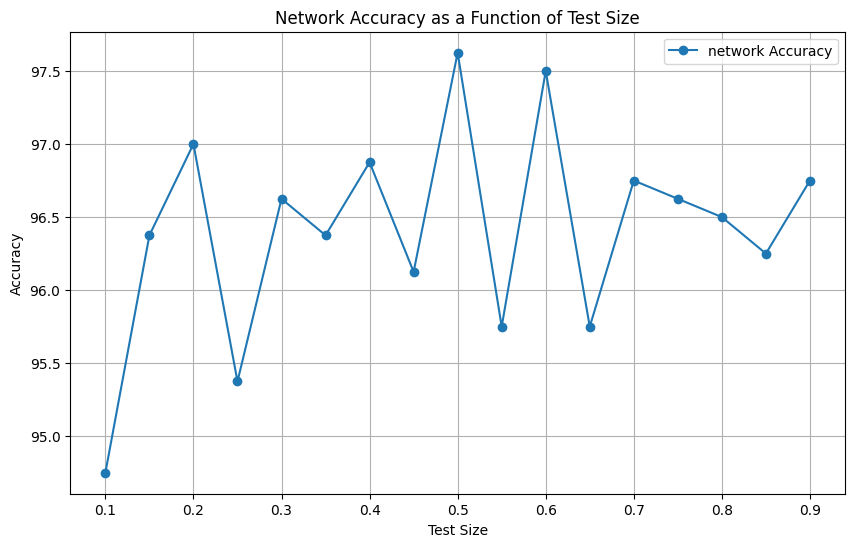

In [ ]:
import matplotlib.pyplot as plt
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', label='network Accuracy')
plt.title('Network Accuracy as a Function of Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step12: Using VIT-base pred-train model

## A: Init parameters

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
# 这里继续使用前面初始化数据集的代码
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

# 创建PyTorch数据加载器
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)
# 确保你的环境支持cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<ipython-input-2-31d503595d2b>:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])


## B. Define Base-Vit model

In [3]:
# 定义ViT模型
class ViTClassifier(torch.nn.Module):
    def __init__(self, num_labels=10):
        super(ViTClassifier, self).__init__()
        self.num_labels = num_labels
        self.vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=self.num_labels)
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

    def forward(self, x):
        inputs = self.feature_extractor(images=x, return_tensors="pt").to(torch.device("cuda"))
        outputs = self.vit(**inputs)
        logits = outputs.logits
        return logits


## C. Model training

In [4]:
from tqdm import tqdm
import time
model_vit_small = ViTClassifier(num_labels=10).to(device)
optimizer_vit_small = torch.optim.Adam(model_vit_small.parameters(), lr=1e-4)
criterion_vit_small = torch.nn.CrossEntropyLoss()
metrics = {
    "epoch": [],
    "avg_loss": [],
    "accuracy": [],
    "training_time": [],
    "memory_usage": []
}

def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    start_time = time.time()
    total_loss = 0
    correct_predictions = 0
    initial_memory_usage = torch.cuda.memory_allocated(device)

    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.repeat(1, 3, 1, 1)  # Convert to 3 channels

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()

    training_time = time.time() - start_time
    peak_memory_usage = torch.cuda.max_memory_allocated(device) - initial_memory_usage
    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / len(data_loader.dataset)

    metrics['epoch'].append(epoch+1)
    metrics['avg_loss'].append(avg_loss)
    metrics['accuracy'].append(accuracy)
    metrics['training_time'].append(training_time)
    metrics['memory_usage'].append(peak_memory_usage)

    return avg_loss, accuracy

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    avg_loss, accuracy = train_epoch(model_vit_small, train_loader, criterion_vit_small, optimizer_vit_small)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
 10%|█         | 1/10 [00:54<08:13, 54.83s/it]

Epoch 1/10, Loss: 1.0117562264204025, Accuracy: 0.875


 20%|██        | 2/10 [01:51<07:26, 55.85s/it]

Epoch 2/10, Loss: 0.24091861814260482, Accuracy: 0.99125


 30%|███       | 3/10 [02:47<06:30, 55.84s/it]

Epoch 3/10, Loss: 0.14100869819521905, Accuracy: 0.994375


 40%|████      | 4/10 [03:43<05:35, 55.93s/it]

Epoch 4/10, Loss: 0.0971772949397564, Accuracy: 0.99625


 50%|█████     | 5/10 [04:39<04:39, 55.95s/it]

Epoch 5/10, Loss: 0.0792982016503811, Accuracy: 0.99375


 60%|██████    | 6/10 [05:35<03:43, 55.98s/it]

Epoch 6/10, Loss: 0.04665041342377663, Accuracy: 0.9996875


 70%|███████   | 7/10 [06:31<02:47, 55.97s/it]

Epoch 7/10, Loss: 0.03348687466233969, Accuracy: 1.0


 80%|████████  | 8/10 [07:27<01:51, 55.98s/it]

Epoch 8/10, Loss: 0.026879588998854162, Accuracy: 1.0


 90%|█████████ | 9/10 [08:23<00:55, 55.93s/it]

Epoch 9/10, Loss: 0.022151129432022573, Accuracy: 1.0


100%|██████████| 10/10 [09:19<00:00, 55.91s/it]

Epoch 10/10, Loss: 0.01857173677533865, Accuracy: 1.0


## D. Model testing

In [ ]:
# 测试函数
def eval_model(model, data_loader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for images, _ in tqdm(data_loader):
            images = images.to(device)
            images = images.repeat(1, 3, 1, 1)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())

    return predictions

# 测试模型
predictions = eval_model(model_vit_small, test_loader)
print("\nModel prediction accuracy on test set:", np.mean(np.array(predictions) == test_Y.numpy()))
torch.save(model_vit_small.state_dict(), '/content/drive/My Drive/dl_model/model_vit_small_new.pth')

100%|██████████| 13/13 [00:06<00:00,  2.15it/s]



Model prediction accuracy on test set: 0.99625


## E. Plot important parameters

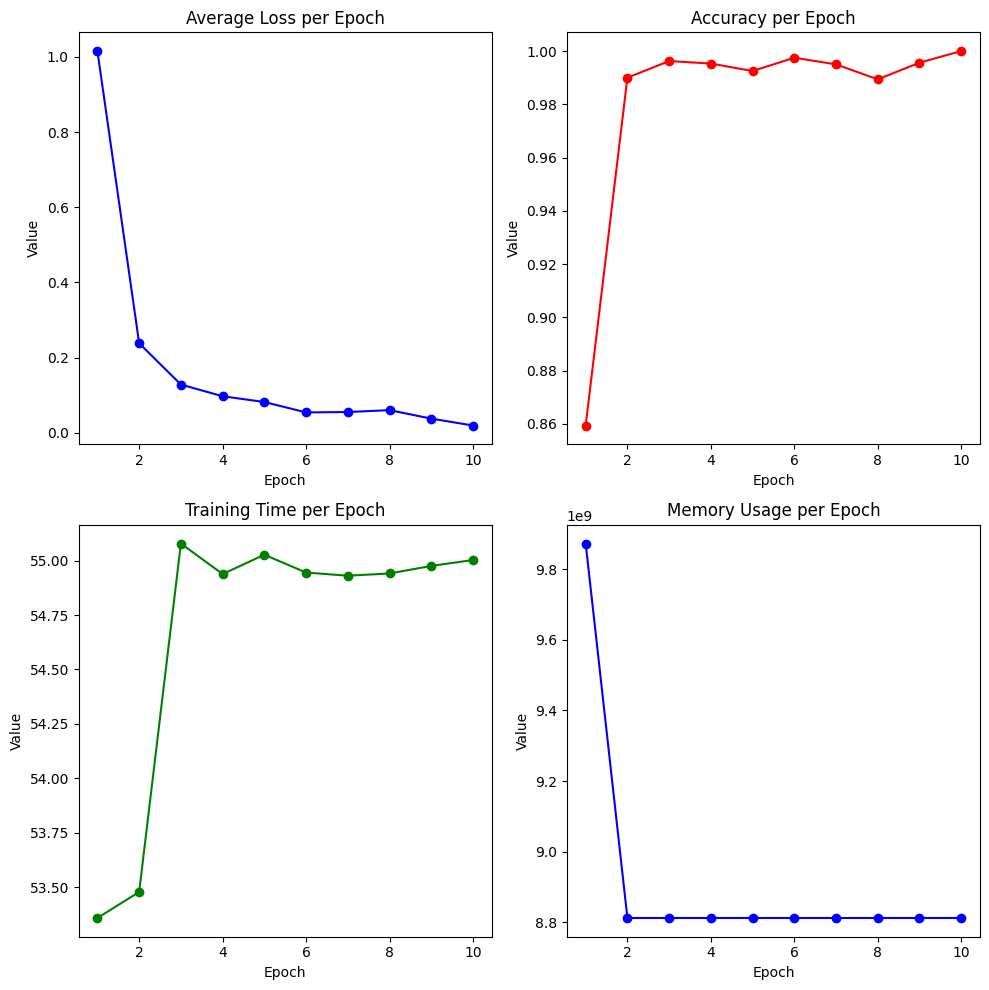

In [ ]:
import matplotlib.pyplot as plt
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(metrics['epoch'], metrics['avg_loss'], marker='o', color='b')
axs[0, 0].set_title('Average Loss per Epoch')
axs[0, 1].plot(metrics['epoch'], metrics['accuracy'], marker='o', color='r')
axs[0, 1].set_title('Accuracy per Epoch')
axs[1, 0].plot(metrics['epoch'], metrics['training_time'], marker='o', color='g')
axs[1, 0].set_title('Training Time per Epoch')
axs[1, 1].plot(metrics['epoch'], metrics['memory_usage'], marker='o', color='b')
axs[1, 1].set_title('Memory Usage per Epoch')

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Value')
plt.tight_layout()
plt.show()

## F. Save all datas to csv

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_vit_small/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


## G. Delete Base-Vit model

In [5]:
del model_vit_small
torch.cuda.empty_cache()

# Step13: Using Huge-Vit pred-train model

## A. Reading data

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
import time
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
# 这里继续使用前面初始化数据集的代码
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

# 创建PyTorch数据加载器
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=32, shuffle=False)
# 确保你的环境支持cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<ipython-input-2-b14e63fea318>:56: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])


## B. Define Huge-Vit model

In [3]:
# 定义 ViT 模型
class ViTClassifierHuge(torch.nn.Module):
    def __init__(self, num_labels=10):
        super(ViTClassifierHuge, self).__init__()
        self.vit = ViTForImageClassification.from_pretrained('google/vit-huge-patch14-224-in21k',
                                                             num_labels=num_labels)
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-huge-patch14-224-in21k')

    def forward(self, x):
        inputs = self.feature_extractor(images=x, return_tensors="pt").to(device)
        outputs = self.vit(**inputs)
        logits = outputs.logits
        return logits

## C. Model training

In [4]:
# 初始化模型和优化器
model_huge_vit = ViTClassifierHuge(num_labels=10).to(device)
optimizer_huge_vit = torch.optim.Adam(model_huge_vit.parameters(), lr=1e-4)
criterion_huge_vit = torch.nn.CrossEntropyLoss()
print("model successfully build!")
metrics = {
    "epoch": [],
    "avg_loss": [],
    "accuracy": [],
    "training_time": [],
    "memory_usage": []
}
# 训练和测试代码
def train_epoch_huge_vit(model, data_loader, criterion, optimizer, accumulation_steps):
    model.train()
    start_time = time.time()
    optimizer.zero_grad()
    total_loss = 0
    correct_predictions = 0
    initial_memory_usage = torch.cuda.memory_allocated(device)
    for i, (images, labels) in enumerate(data_loader, 1):
        images, labels = images.to(device), labels.to(device)
        images = images.repeat(1, 3, 1, 1)  # 调整为3通道

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss = loss / accumulation_steps  # Scale loss
        loss.backward()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()

        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(data_loader):
            optimizer.step()
            optimizer.zero_grad()
    training_time = time.time() - start_time
    peak_memory_usage = torch.cuda.max_memory_allocated(device) - initial_memory_usage
    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / len(data_loader.dataset)

    metrics['epoch'].append(len(metrics['epoch']) + 1)
    metrics['avg_loss'].append(avg_loss)
    metrics['accuracy'].append(accuracy)
    metrics['training_time'].append(training_time)
    metrics['memory_usage'].append(peak_memory_usage)
    return avg_loss, accuracy

# 运行训练和测试
accumulation_steps = 8  # 设置梯度累积步数
num_epochs = 5
for epoch in tqdm(range(num_epochs)):  # 假设训练10个epoch
    avg_loss, accuracy = train_epoch_huge_vit(model_huge_vit, train_loader, criterion_huge_vit, optimizer_huge_vit, accumulation_steps)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-huge-patch14-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model successfully build!


 20%|██        | 1/5 [03:23<13:34, 203.67s/it]

Epoch 1/5, Loss: 0.23593610614538194, Accuracy: 0.64375


 40%|████      | 2/5 [06:46<10:08, 202.96s/it]

Epoch 2/5, Loss: 0.11563353061676025, Accuracy: 0.9509375


 60%|██████    | 3/5 [10:08<06:45, 202.76s/it]

Epoch 3/5, Loss: 0.06059303008019924, Accuracy: 0.98375


 80%|████████  | 4/5 [13:31<03:22, 202.69s/it]

Epoch 4/5, Loss: 0.04195627924054861, Accuracy: 0.995


100%|██████████| 5/5 [16:53<00:00, 202.78s/it]

Epoch 5/5, Loss: 0.03243148032575846, Accuracy: 0.99875


## D. Model testing

In [5]:
# 测试模型性能
def evaluate_epoch_huge_vit(model, data_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in tqdm(data_loader):
            images, labels = images.to(device), labels.to(device)
            images = images.repeat(1, 3, 1, 1)  # 调整为3通道
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on the test set: {accuracy * 100:.2f}%")
evaluate_epoch_huge_vit(model_huge_vit, test_loader)
torch.save(model_huge_vit.state_dict(), '/content/drive/My Drive/dl_model/model_vit_huge.pth')

100%|██████████| 25/25 [00:17<00:00,  1.39it/s]


Accuracy on the test set: 98.88%


## E. Plot all parameters

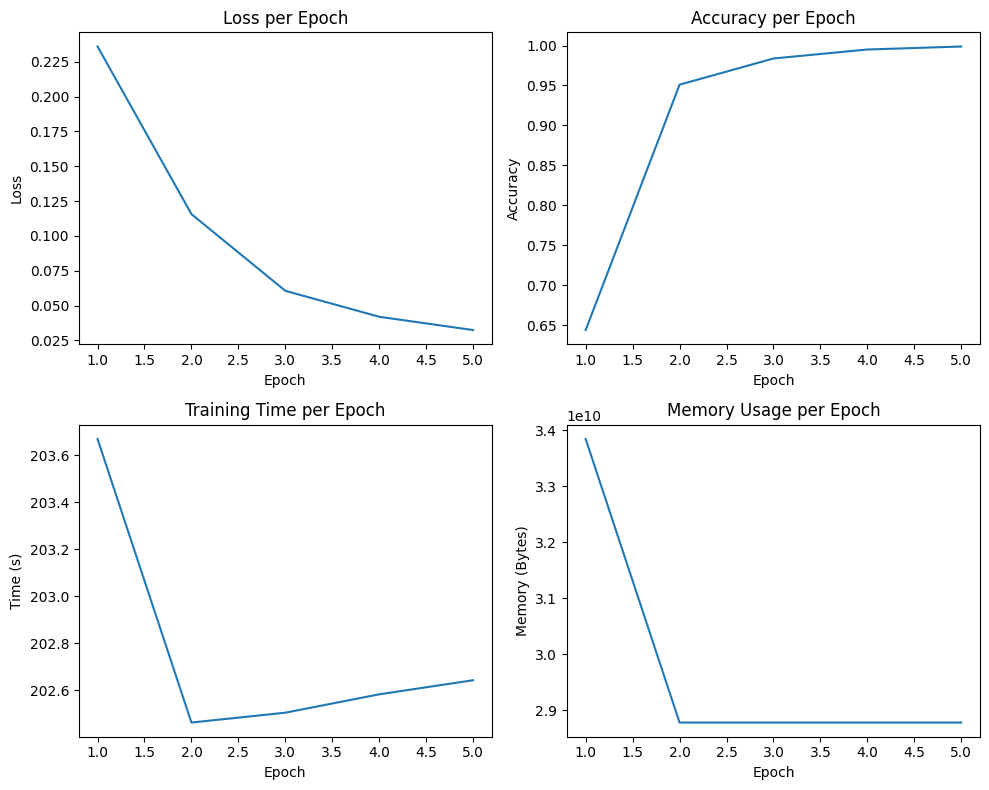

In [7]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(metrics['epoch'], metrics['avg_loss'], label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(metrics['epoch'], metrics['accuracy'], label='Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.plot(metrics['epoch'], metrics['training_time'], label='Training Time')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(metrics['epoch'], metrics['memory_usage'], label='Memory Usage')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (Bytes)')

plt.tight_layout()
plt.show()

## F. Save important parameters to csv

In [8]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_vit_huge/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


## G. Delete Huge-Vit Model

In [9]:
del model_huge_vit
torch.cuda.empty_cache()

# Step13: knowledge distillation (cnn+base-Vit)

## A. Reading data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import random
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import torch.optim as optim
import numpy as np
from torchvision import transforms
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import time
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 50% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
# 这里继续使用前面初始化数据集的代码
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

# 创建PyTorch数据加载器
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)


## B. Define model

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.adapool = nn.AdaptiveAvgPool2d((7, 7))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(64 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.adapool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# 定义ViT模型
class ViTClassifier_base_vit(torch.nn.Module):
    def __init__(self, num_labels=10):
        super(ViTClassifier_base_vit, self).__init__()
        self.num_labels = num_labels
        self.vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=self.num_labels)
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

    def forward(self, x):
        x = x / 255.0  # 如果images在[0, 255]的范围
        inputs = self.feature_extractor(images=x, return_tensors="pt").to(torch.device("cuda"))
        outputs = self.vit(**inputs)
        logits = outputs.logits
        return logits


## C. Distillation loss function Define

In [ ]:
def distillation_loss(student_logits, labels, teacher_logits, T=3.0, alpha=0.5):
    """
    计算知识蒸馏损失。
    :param student_logits: 学生模型的输出
    :param labels: 真实标签
    :param teacher_logits: 教师模型的输出
    :param T: 蒸馏温度
    :param alpha: 平衡参数
    :return: 组合损失
    """
    student_loss = nn.CrossEntropyLoss()(student_logits, labels)
    distill_loss = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(student_logits / T, dim=1),F.softmax(teacher_logits / T, dim=1)) * (T * T)
    return alpha * distill_loss + (1. - alpha) * student_loss

## D. Define evaluation function

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import matplotlib.pyplot as plt


def evaluate_model_cnn_vit(model, test_loader):
    """
    评估模型在测试集上的表现。
    :param model: 要评估的模型
    :param test_loader: 测试数据加载器
    :return: None
    """
    model.eval()  # 设置为评估模式
    correct = 0
    total = 0
    with torch.no_grad():  # 在评估过程中不需要计算梯度
        for images, labels in test_loader:
            images, labels = images.to('cuda'), labels.to('cuda')

            # 调整图像尺寸以适配模型输入大小
            images = images.view(-1, 1, 28, 28)  # 对于MNIST数据集
            images = F.interpolate(images, size=(224, 224), mode='bilinear', align_corners=False)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')
    return  correct / total


## E. Training model

In [ ]:
# Assuming teacher_model and student_model are defined
teacher_model = ViTClassifier_base_vit().to('cuda')
student_model = SimpleCNN().to('cuda')

optimizer = torch.optim.Adam(student_model.parameters(), lr=0.001)
epochs = 20  # Example number of epochs

# Metrics dictionary to store the performance data
performance_metrics = {
    'epoch': [],
    'avg_loss': [],
    'accuracy': [],
    'training_time': [],
    'memory_usage': []
}
best_accuracy = 0
best_model = None
# Training loop
for epoch in tqdm(range(epochs)):
    student_model.train()
    teacher_model.eval()
    start_time = time.time()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to('cuda'), labels.to('cuda')
        images = images.view(-1, 1, 28, 28)
        images = F.interpolate(images, size=(224, 224), mode='bilinear', align_corners=False)
        student_logits = student_model(images)
        images = images.repeat(1, 3, 1, 1)
        teacher_logits = teacher_model(images)

        loss = distillation_loss(student_logits, labels, teacher_logits)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    end_time = time.time()
    training_time = end_time - start_time
    memory_usage = torch.cuda.max_memory_allocated('cuda')  # Get peak GPU memory usage

    avg_loss = total_loss / len(train_loader)
    accuracy = evaluate_model_cnn_vit(student_model, test_loader)  # Evaluate on test set after each epoch
    if accuracy> best_accuracy:
        best_accuracy = accuracy
        best_model = student_model
    performance_metrics['epoch'].append(epoch + 1)
    performance_metrics['avg_loss'].append(avg_loss)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['training_time'].append(training_time)
    performance_metrics['memory_usage'].append(memory_usage)

    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
  5%|▌         | 1/20 [01:04<20:28, 64.65s/it]

Accuracy on the test set: 80.38%
Epoch 1, Loss: 2.8533, Accuracy: 80.38%


 10%|█         | 2/20 [02:08<19:14, 64.16s/it]

Accuracy on the test set: 92.25%
Epoch 2, Loss: 0.7760, Accuracy: 92.25%


 15%|█▌        | 3/20 [03:12<18:07, 63.96s/it]

Accuracy on the test set: 92.25%
Epoch 3, Loss: 0.7206, Accuracy: 92.25%


 20%|██        | 4/20 [04:16<17:02, 63.90s/it]

Accuracy on the test set: 93.50%
Epoch 4, Loss: 0.6907, Accuracy: 93.50%


 25%|██▌       | 5/20 [05:19<15:58, 63.89s/it]

Accuracy on the test set: 94.00%
Epoch 5, Loss: 0.6721, Accuracy: 94.00%


 30%|███       | 6/20 [06:23<14:53, 63.83s/it]

Accuracy on the test set: 95.12%
Epoch 6, Loss: 0.6600, Accuracy: 95.12%


 35%|███▌      | 7/20 [07:27<13:49, 63.83s/it]

Accuracy on the test set: 95.88%
Epoch 7, Loss: 0.6506, Accuracy: 95.88%


 40%|████      | 8/20 [08:31<12:45, 63.82s/it]

Accuracy on the test set: 96.00%
Epoch 8, Loss: 0.6390, Accuracy: 96.00%


 45%|████▌     | 9/20 [09:34<11:41, 63.79s/it]

Accuracy on the test set: 96.00%
Epoch 9, Loss: 0.6369, Accuracy: 96.00%


 50%|█████     | 10/20 [10:38<10:37, 63.78s/it]

Accuracy on the test set: 96.00%
Epoch 10, Loss: 0.6333, Accuracy: 96.00%


 55%|█████▌    | 11/20 [11:42<09:34, 63.80s/it]

Accuracy on the test set: 95.75%
Epoch 11, Loss: 0.6330, Accuracy: 95.75%


 60%|██████    | 12/20 [12:46<08:30, 63.80s/it]

Accuracy on the test set: 96.25%
Epoch 12, Loss: 0.6253, Accuracy: 96.25%


 65%|██████▌   | 13/20 [13:50<07:26, 63.79s/it]

Accuracy on the test set: 96.12%
Epoch 13, Loss: 0.6215, Accuracy: 96.12%


 70%|███████   | 14/20 [14:53<06:22, 63.77s/it]

Accuracy on the test set: 96.25%
Epoch 14, Loss: 0.6190, Accuracy: 96.25%


 75%|███████▌  | 15/20 [15:57<05:19, 63.81s/it]

Accuracy on the test set: 95.88%
Epoch 15, Loss: 0.6177, Accuracy: 95.88%


 80%|████████  | 16/20 [17:01<04:15, 63.81s/it]

Accuracy on the test set: 96.12%
Epoch 16, Loss: 0.6186, Accuracy: 96.12%


 85%|████████▌ | 17/20 [18:05<03:11, 63.79s/it]

Accuracy on the test set: 96.50%
Epoch 17, Loss: 0.6136, Accuracy: 96.50%


 90%|█████████ | 18/20 [19:09<02:07, 63.79s/it]

Accuracy on the test set: 96.50%
Epoch 18, Loss: 0.6116, Accuracy: 96.50%


 95%|█████████▌| 19/20 [20:12<01:03, 63.79s/it]

Accuracy on the test set: 96.25%
Epoch 19, Loss: 0.6101, Accuracy: 96.25%


100%|██████████| 20/20 [21:16<00:00, 63.84s/it]

Accuracy on the test set: 96.25%
Epoch 20, Loss: 0.6069, Accuracy: 96.25%


## F. Plot parameters

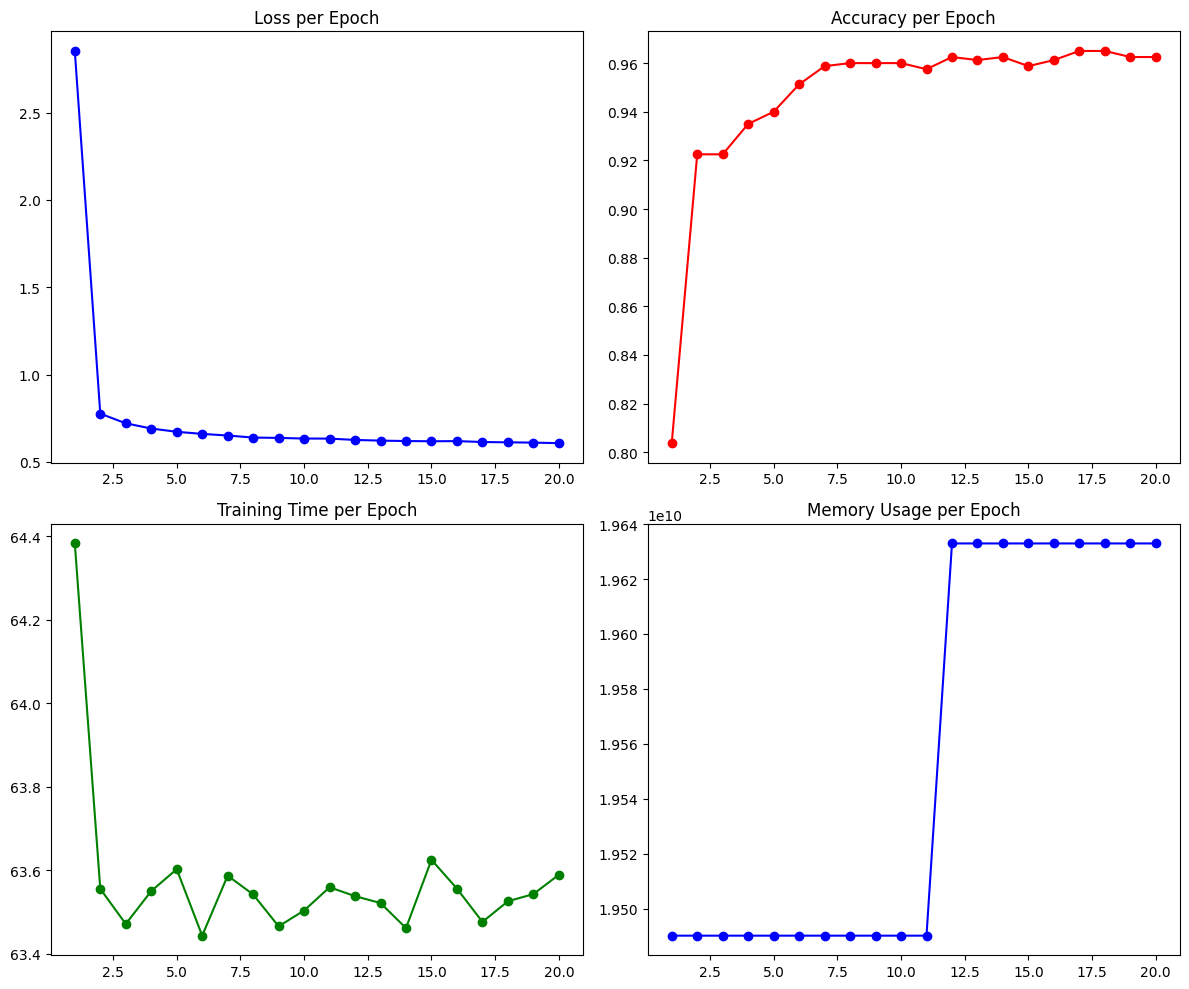

In [ ]:
# Plotting the collected data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].plot(performance_metrics['epoch'], performance_metrics['avg_loss'], marker='o', color='b')
axs[0, 0].set_title('Loss per Epoch')
axs[0, 1].plot(performance_metrics['epoch'], performance_metrics['accuracy'], marker='o', color='r')
axs[0, 1].set_title('Accuracy per Epoch')
axs[1, 0].plot(performance_metrics['epoch'], performance_metrics['training_time'], marker='o', color='g')
axs[1, 0].set_title('Training Time per Epoch')
axs[1, 1].plot(performance_metrics['epoch'], performance_metrics['memory_usage'], marker='o', color='b')
axs[1, 1].set_title('Memory Usage per Epoch')
plt.tight_layout()
plt.show()

## G. Save data to csv

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(performance_metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_cnn_base_vit/model_performance_metrics2.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")
torch.save(best_model.state_dict(), '/content/drive/My Drive/dl_model/student_model_cnn_2_new3.pth')

Data saved to 'model_performance_metrics.csv'


## H. Delete model

In [ ]:
# del student_model
del teacher_model
torch.cuda.empty_cache()

NameError: name 'student_model' is not defined

# Step14: Tsinghua University(Rep-vit)

## A. Reading data

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
import time
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
# 这里继续使用前面初始化数据集的代码
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

## B. Data processing

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset

# 扩展灰度图像到三通道
def expand_to_rgb(x):
    return x.repeat(3, 1, 1)

# 定义转换操作：调整大小并进行标准化
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 准备数据集
def prepare_dataset(data, labels, transform):

    data = data.repeat(1, 3, 1, 1)  # 转换为三通道
    data = transform(data)  # 应用转换
    dataset = TensorDataset(data, labels)
    return dataset
# 转换数据和创建 DataLoader
train_dataset = prepare_dataset(train_X, train_Y, transform)
test_dataset = prepare_dataset(test_X, test_Y, transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



## C. Installing timm

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

## D. Loading pre-trained Model

In [ ]:
import timm
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from time import time

# 加载预训练模型
model_rep_vit = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
# print(model_rep_vit)

model_rep_vit.head = nn.Linear(640, 10)  # 更改输出层
model_rep_vit = model_rep_vit.cuda()  # 使用 GPU
# 定义优化器和损失函数
optimizer = optim.Adam(model_rep_vit.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/95.5M [00:00<?, ?B/s]

## E. Testing Function

In [ ]:
# 测试函数
def test_rep_vit(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')
    return correct / total


## F. Training Function

In [ ]:
# 训练函数
def train_rep_vit(model, train_loader, optimizer, criterion, train_epoches=10):
    metrics = {
        'loss': [],
        'accuracy': [],
        'training_time': [],
        'memory_usage': []
    }
    model.train()
    for epoch in tqdm(range(train_epoches)):  # 运行 10 个训练周期
        running_loss = 0.0
        start_time = time()
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        training_time = time() - start_time
        avg_loss = running_loss / len(train_loader)
        test_accuracy = test_rep_vit(model, test_loader)  # Evaluate on test set
        memory_usage = torch.cuda.max_memory_allocated()   # Convert bytes to MB

        metrics['loss'].append(avg_loss)
        metrics['accuracy'].append(test_accuracy)
        metrics['training_time'].append(training_time)
        metrics['memory_usage'].append(memory_usage)
        torch.cuda.reset_peak_memory_stats()  # Reset peak memory after each epoch
        print(f'\nEpoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Time: {training_time:.2f}s, Memory Usage: {memory_usage:.2f}MB')
    return metrics
train_epoches = 100
metrics = train_rep_vit(model_rep_vit, train_loader, optimizer, criterion, train_epoches)


  1%|          | 1/100 [00:33<54:52, 33.25s/it]

Accuracy: 59.125%

Epoch 1, Loss: 0.7909, Accuracy: 0.59%, Time: 30.87s, Memory Usage: 16050324992.00MB


  2%|▏         | 2/100 [01:02<50:53, 31.15s/it]

Accuracy: 9.25%

Epoch 2, Loss: 8022114.3186, Accuracy: 0.09%, Time: 27.37s, Memory Usage: 16049629696.00MB


  3%|▎         | 3/100 [01:32<49:26, 30.59s/it]

Accuracy: 6.5%

Epoch 3, Loss: 8432097.2303, Accuracy: 0.07%, Time: 27.57s, Memory Usage: 16049629696.00MB


  4%|▍         | 4/100 [02:03<48:51, 30.54s/it]

Accuracy: 5.25%

Epoch 4, Loss: 6394.0805, Accuracy: 0.05%, Time: 28.10s, Memory Usage: 16049629696.00MB


  5%|▌         | 5/100 [02:33<48:18, 30.51s/it]

Accuracy: 17.875%

Epoch 5, Loss: 9.4304, Accuracy: 0.18%, Time: 28.10s, Memory Usage: 16049629696.00MB


  6%|▌         | 6/100 [03:04<47:46, 30.49s/it]

Accuracy: 31.375%

Epoch 6, Loss: 2.1662, Accuracy: 0.31%, Time: 28.09s, Memory Usage: 16049629696.00MB


  7%|▋         | 7/100 [03:34<47:16, 30.50s/it]

Accuracy: 38.5%

Epoch 7, Loss: 1.7677, Accuracy: 0.39%, Time: 28.18s, Memory Usage: 16049629696.00MB


  8%|▊         | 8/100 [04:05<46:45, 30.49s/it]

Accuracy: 45.375%

Epoch 8, Loss: 1.6825, Accuracy: 0.45%, Time: 28.13s, Memory Usage: 16049629696.00MB


  9%|▉         | 9/100 [04:35<46:14, 30.49s/it]

Accuracy: 50.25%

Epoch 9, Loss: 1.5574, Accuracy: 0.50%, Time: 28.13s, Memory Usage: 16049629696.00MB


 10%|█         | 10/100 [05:06<45:45, 30.50s/it]

Accuracy: 51.625%

Epoch 10, Loss: 1.4114, Accuracy: 0.52%, Time: 28.16s, Memory Usage: 16049629696.00MB


 11%|█         | 11/100 [05:36<45:15, 30.51s/it]

Accuracy: 47.75%

Epoch 11, Loss: 1.3588, Accuracy: 0.48%, Time: 28.17s, Memory Usage: 16049629696.00MB


 12%|█▏        | 12/100 [06:07<44:45, 30.52s/it]

Accuracy: 57.125%

Epoch 12, Loss: 1.2856, Accuracy: 0.57%, Time: 28.17s, Memory Usage: 16049629696.00MB


 13%|█▎        | 13/100 [06:37<44:15, 30.52s/it]

Accuracy: 54.5%

Epoch 13, Loss: 1.1901, Accuracy: 0.55%, Time: 28.16s, Memory Usage: 16049629696.00MB


 14%|█▍        | 14/100 [07:08<43:46, 30.54s/it]

Accuracy: 55.125%

Epoch 14, Loss: 1.1348, Accuracy: 0.55%, Time: 28.21s, Memory Usage: 16049629696.00MB


 15%|█▌        | 15/100 [07:38<43:15, 30.53s/it]

Accuracy: 64.125%

Epoch 15, Loss: 1.0586, Accuracy: 0.64%, Time: 28.15s, Memory Usage: 16049629696.00MB


 16%|█▌        | 16/100 [08:09<42:46, 30.55s/it]

Accuracy: 63.5%

Epoch 16, Loss: 1.0531, Accuracy: 0.64%, Time: 28.21s, Memory Usage: 16049629696.00MB


 17%|█▋        | 17/100 [08:40<42:14, 30.54s/it]

Accuracy: 64.25%

Epoch 17, Loss: 1.0380, Accuracy: 0.64%, Time: 28.15s, Memory Usage: 16049629696.00MB


 18%|█▊        | 18/100 [09:10<41:44, 30.54s/it]

Accuracy: 61.5%

Epoch 18, Loss: 0.9865, Accuracy: 0.61%, Time: 28.18s, Memory Usage: 16049629696.00MB


 19%|█▉        | 19/100 [09:41<41:13, 30.53s/it]

Accuracy: 67.125%

Epoch 19, Loss: 0.9425, Accuracy: 0.67%, Time: 28.17s, Memory Usage: 16049629696.00MB


 20%|██        | 20/100 [10:11<40:42, 30.53s/it]

Accuracy: 67.875%

Epoch 20, Loss: 0.8954, Accuracy: 0.68%, Time: 28.17s, Memory Usage: 16049629696.00MB


 21%|██        | 21/100 [10:42<40:12, 30.53s/it]

Accuracy: 66.0%

Epoch 21, Loss: 0.8731, Accuracy: 0.66%, Time: 28.17s, Memory Usage: 16049629696.00MB


 22%|██▏       | 22/100 [11:12<39:42, 30.55s/it]

Accuracy: 65.75%

Epoch 22, Loss: 0.8871, Accuracy: 0.66%, Time: 28.21s, Memory Usage: 16049629696.00MB


 23%|██▎       | 23/100 [11:43<39:12, 30.56s/it]

Accuracy: 74.625%

Epoch 23, Loss: 0.8301, Accuracy: 0.75%, Time: 28.20s, Memory Usage: 16049629696.00MB


 24%|██▍       | 24/100 [12:13<38:41, 30.54s/it]

Accuracy: 70.75%

Epoch 24, Loss: 0.8064, Accuracy: 0.71%, Time: 28.16s, Memory Usage: 16049629696.00MB


 25%|██▌       | 25/100 [12:44<38:10, 30.54s/it]

Accuracy: 69.5%

Epoch 25, Loss: 0.7730, Accuracy: 0.69%, Time: 28.17s, Memory Usage: 16049629696.00MB


 26%|██▌       | 26/100 [13:14<37:38, 30.52s/it]

Accuracy: 70.75%

Epoch 26, Loss: 0.7785, Accuracy: 0.71%, Time: 28.15s, Memory Usage: 16049629696.00MB


 27%|██▋       | 27/100 [13:45<37:09, 30.53s/it]

Accuracy: 68.125%

Epoch 27, Loss: 0.7769, Accuracy: 0.68%, Time: 28.19s, Memory Usage: 16049629696.00MB


 28%|██▊       | 28/100 [14:15<36:39, 30.55s/it]

Accuracy: 75.5%

Epoch 28, Loss: 0.7243, Accuracy: 0.76%, Time: 28.20s, Memory Usage: 16049629696.00MB


 29%|██▉       | 29/100 [14:46<36:09, 30.55s/it]

Accuracy: 73.75%

Epoch 29, Loss: 0.6920, Accuracy: 0.74%, Time: 28.20s, Memory Usage: 16049629696.00MB


 30%|███       | 30/100 [15:17<35:38, 30.55s/it]

Accuracy: 78.625%

Epoch 30, Loss: 0.7661, Accuracy: 0.79%, Time: 28.18s, Memory Usage: 16049629696.00MB


 31%|███       | 31/100 [15:47<35:09, 30.57s/it]

Accuracy: 80.5%

Epoch 31, Loss: 0.6675, Accuracy: 0.81%, Time: 28.23s, Memory Usage: 16049629696.00MB


 32%|███▏      | 32/100 [16:18<34:38, 30.57s/it]

Accuracy: 77.125%

Epoch 32, Loss: 0.6580, Accuracy: 0.77%, Time: 28.22s, Memory Usage: 16049629696.00MB


 33%|███▎      | 33/100 [16:48<34:07, 30.56s/it]

Accuracy: 76.125%

Epoch 33, Loss: 0.6361, Accuracy: 0.76%, Time: 28.17s, Memory Usage: 16049629696.00MB


 34%|███▍      | 34/100 [17:19<33:37, 30.57s/it]

Accuracy: 79.625%

Epoch 34, Loss: 0.6531, Accuracy: 0.80%, Time: 28.25s, Memory Usage: 16049629696.00MB


 35%|███▌      | 35/100 [17:50<33:07, 30.58s/it]

Accuracy: 73.875%

Epoch 35, Loss: 0.6292, Accuracy: 0.74%, Time: 28.23s, Memory Usage: 16049629696.00MB


 36%|███▌      | 36/100 [18:20<32:36, 30.57s/it]

Accuracy: 77.5%

Epoch 36, Loss: 0.6621, Accuracy: 0.78%, Time: 28.18s, Memory Usage: 16049629696.00MB


 37%|███▋      | 37/100 [18:51<32:05, 30.57s/it]

Accuracy: 81.125%

Epoch 37, Loss: 0.6384, Accuracy: 0.81%, Time: 28.22s, Memory Usage: 16049629696.00MB


 38%|███▊      | 38/100 [19:21<31:35, 30.57s/it]

Accuracy: 78.625%

Epoch 38, Loss: 0.5783, Accuracy: 0.79%, Time: 28.20s, Memory Usage: 16049629696.00MB


 39%|███▉      | 39/100 [19:52<31:03, 30.55s/it]

Accuracy: 81.0%

Epoch 39, Loss: 0.5631, Accuracy: 0.81%, Time: 28.15s, Memory Usage: 16049629696.00MB


 40%|████      | 40/100 [20:22<30:33, 30.56s/it]

Accuracy: 80.75%

Epoch 40, Loss: 0.5454, Accuracy: 0.81%, Time: 28.21s, Memory Usage: 16049629696.00MB


 41%|████      | 41/100 [20:53<30:03, 30.57s/it]

Accuracy: 83.25%

Epoch 41, Loss: 0.5505, Accuracy: 0.83%, Time: 28.22s, Memory Usage: 16049629696.00MB


 42%|████▏     | 42/100 [21:23<29:32, 30.56s/it]

Accuracy: 80.5%

Epoch 42, Loss: 0.4907, Accuracy: 0.81%, Time: 28.18s, Memory Usage: 16049629696.00MB


 43%|████▎     | 43/100 [21:54<29:01, 30.56s/it]

Accuracy: 82.875%

Epoch 43, Loss: 0.4900, Accuracy: 0.83%, Time: 28.20s, Memory Usage: 16049629696.00MB


 44%|████▍     | 44/100 [22:25<28:30, 30.55s/it]

Accuracy: 84.0%

Epoch 44, Loss: 0.4877, Accuracy: 0.84%, Time: 28.16s, Memory Usage: 16049629696.00MB


 45%|████▌     | 45/100 [22:55<28:00, 30.55s/it]

Accuracy: 74.75%

Epoch 45, Loss: 0.5073, Accuracy: 0.75%, Time: 28.18s, Memory Usage: 16049629696.00MB


 46%|████▌     | 46/100 [23:26<27:30, 30.57s/it]

Accuracy: 84.125%

Epoch 46, Loss: 0.5287, Accuracy: 0.84%, Time: 28.23s, Memory Usage: 16049629696.00MB


 47%|████▋     | 47/100 [23:56<27:00, 30.58s/it]

Accuracy: 84.25%

Epoch 47, Loss: 0.5168, Accuracy: 0.84%, Time: 28.24s, Memory Usage: 16049629696.00MB


 48%|████▊     | 48/100 [24:27<26:29, 30.56s/it]

Accuracy: 82.625%

Epoch 48, Loss: 0.4604, Accuracy: 0.83%, Time: 28.17s, Memory Usage: 16049629696.00MB


 49%|████▉     | 49/100 [24:57<25:59, 30.57s/it]

Accuracy: 85.5%

Epoch 49, Loss: 0.4327, Accuracy: 0.85%, Time: 28.22s, Memory Usage: 16049629696.00MB


 50%|█████     | 50/100 [25:28<25:28, 30.57s/it]

Accuracy: 80.375%

Epoch 50, Loss: 0.5899, Accuracy: 0.80%, Time: 28.21s, Memory Usage: 16049629696.00MB


 51%|█████     | 51/100 [25:59<24:58, 30.58s/it]

Accuracy: 81.125%

Epoch 51, Loss: 0.4718, Accuracy: 0.81%, Time: 28.23s, Memory Usage: 16049629696.00MB


 52%|█████▏    | 52/100 [26:29<24:27, 30.57s/it]

Accuracy: 82.75%

Epoch 52, Loss: 0.4352, Accuracy: 0.83%, Time: 28.19s, Memory Usage: 16049629696.00MB


 53%|█████▎    | 53/100 [27:00<23:56, 30.56s/it]

Accuracy: 84.0%

Epoch 53, Loss: 0.4378, Accuracy: 0.84%, Time: 28.19s, Memory Usage: 16049629696.00MB


 54%|█████▍    | 54/100 [27:30<23:25, 30.56s/it]

Accuracy: 84.875%

Epoch 54, Loss: 0.4392, Accuracy: 0.85%, Time: 28.20s, Memory Usage: 16049629696.00MB


 55%|█████▌    | 55/100 [28:01<22:54, 30.55s/it]

Accuracy: 85.0%

Epoch 55, Loss: 0.4637, Accuracy: 0.85%, Time: 28.18s, Memory Usage: 16049629696.00MB


 56%|█████▌    | 56/100 [28:31<22:24, 30.55s/it]

Accuracy: 84.125%

Epoch 56, Loss: 0.4707, Accuracy: 0.84%, Time: 28.18s, Memory Usage: 16049629696.00MB


 57%|█████▋    | 57/100 [29:02<21:53, 30.55s/it]

Accuracy: 84.125%

Epoch 57, Loss: 0.4057, Accuracy: 0.84%, Time: 28.18s, Memory Usage: 16049629696.00MB


 58%|█████▊    | 58/100 [29:32<21:23, 30.55s/it]

Accuracy: 83.375%

Epoch 58, Loss: 0.3951, Accuracy: 0.83%, Time: 28.21s, Memory Usage: 16049629696.00MB


 59%|█████▉    | 59/100 [30:03<20:52, 30.54s/it]

Accuracy: 84.875%

Epoch 59, Loss: 0.4336, Accuracy: 0.85%, Time: 28.16s, Memory Usage: 16049629696.00MB


 60%|██████    | 60/100 [30:34<20:22, 30.56s/it]

Accuracy: 86.125%

Epoch 60, Loss: 0.4127, Accuracy: 0.86%, Time: 28.24s, Memory Usage: 16049629696.00MB


 61%|██████    | 61/100 [31:04<19:51, 30.55s/it]

Accuracy: 84.625%

Epoch 61, Loss: 0.3847, Accuracy: 0.85%, Time: 28.15s, Memory Usage: 16049629696.00MB


 62%|██████▏   | 62/100 [31:35<19:20, 30.55s/it]

Accuracy: 84.625%

Epoch 62, Loss: 0.3984, Accuracy: 0.85%, Time: 28.20s, Memory Usage: 16049629696.00MB


 63%|██████▎   | 63/100 [32:05<18:50, 30.55s/it]

Accuracy: 83.375%

Epoch 63, Loss: 0.3846, Accuracy: 0.83%, Time: 28.20s, Memory Usage: 16049629696.00MB


 64%|██████▍   | 64/100 [32:36<18:19, 30.54s/it]

Accuracy: 83.625%

Epoch 64, Loss: 0.4032, Accuracy: 0.84%, Time: 28.16s, Memory Usage: 16049629696.00MB


 65%|██████▌   | 65/100 [33:06<17:48, 30.53s/it]

Accuracy: 85.625%

Epoch 65, Loss: 0.3910, Accuracy: 0.86%, Time: 28.17s, Memory Usage: 16049629696.00MB


 66%|██████▌   | 66/100 [33:37<17:17, 30.53s/it]

Accuracy: 84.875%

Epoch 66, Loss: 0.3651, Accuracy: 0.85%, Time: 28.17s, Memory Usage: 16049629696.00MB


 67%|██████▋   | 67/100 [34:07<16:47, 30.53s/it]

Accuracy: 86.5%

Epoch 67, Loss: 0.3492, Accuracy: 0.86%, Time: 28.18s, Memory Usage: 16049629696.00MB


 68%|██████▊   | 68/100 [34:38<16:17, 30.55s/it]

Accuracy: 82.375%

Epoch 68, Loss: 0.3638, Accuracy: 0.82%, Time: 28.23s, Memory Usage: 16049629696.00MB


 69%|██████▉   | 69/100 [35:08<15:46, 30.55s/it]

Accuracy: 86.0%

Epoch 69, Loss: 0.3502, Accuracy: 0.86%, Time: 28.19s, Memory Usage: 16049629696.00MB


 70%|███████   | 70/100 [35:39<15:16, 30.56s/it]

Accuracy: 85.625%

Epoch 70, Loss: 0.3593, Accuracy: 0.86%, Time: 28.23s, Memory Usage: 16049629696.00MB


 71%|███████   | 71/100 [36:10<14:46, 30.58s/it]

Accuracy: 87.375%

Epoch 71, Loss: 0.3502, Accuracy: 0.87%, Time: 28.25s, Memory Usage: 16049629696.00MB


 72%|███████▏  | 72/100 [36:40<14:15, 30.57s/it]

Accuracy: 87.0%

Epoch 72, Loss: 0.3290, Accuracy: 0.87%, Time: 28.19s, Memory Usage: 16049629696.00MB


 73%|███████▎  | 73/100 [37:11<13:45, 30.56s/it]

Accuracy: 87.625%

Epoch 73, Loss: 0.2978, Accuracy: 0.88%, Time: 28.19s, Memory Usage: 16049629696.00MB


 74%|███████▍  | 74/100 [37:41<13:14, 30.55s/it]

Accuracy: 84.625%

Epoch 74, Loss: 0.3378, Accuracy: 0.85%, Time: 28.18s, Memory Usage: 16049629696.00MB


 75%|███████▌  | 75/100 [38:12<12:43, 30.55s/it]

Accuracy: 87.25%

Epoch 75, Loss: 0.3707, Accuracy: 0.87%, Time: 28.19s, Memory Usage: 16049629696.00MB


 76%|███████▌  | 76/100 [38:42<12:13, 30.55s/it]

Accuracy: 86.125%

Epoch 76, Loss: 0.3133, Accuracy: 0.86%, Time: 28.17s, Memory Usage: 16049629696.00MB


 77%|███████▋  | 77/100 [39:13<11:42, 30.56s/it]

Accuracy: 85.5%

Epoch 77, Loss: 0.3451, Accuracy: 0.85%, Time: 28.24s, Memory Usage: 16049629696.00MB


 78%|███████▊  | 78/100 [39:43<11:12, 30.56s/it]

Accuracy: 87.25%

Epoch 78, Loss: 0.3293, Accuracy: 0.87%, Time: 28.19s, Memory Usage: 16049629696.00MB


 79%|███████▉  | 79/100 [40:14<10:41, 30.56s/it]

Accuracy: 87.25%

Epoch 79, Loss: 0.3172, Accuracy: 0.87%, Time: 28.20s, Memory Usage: 16049629696.00MB


 80%|████████  | 80/100 [40:44<10:10, 30.53s/it]

Accuracy: 88.0%

Epoch 80, Loss: 0.3298, Accuracy: 0.88%, Time: 28.13s, Memory Usage: 16049629696.00MB


 81%|████████  | 81/100 [41:15<09:39, 30.52s/it]

Accuracy: 85.875%

Epoch 81, Loss: 0.3676, Accuracy: 0.86%, Time: 28.16s, Memory Usage: 16049629696.00MB


 82%|████████▏ | 82/100 [41:46<09:09, 30.54s/it]

Accuracy: 85.875%

Epoch 82, Loss: 0.3418, Accuracy: 0.86%, Time: 28.21s, Memory Usage: 16049629696.00MB


 83%|████████▎ | 83/100 [42:16<08:39, 30.55s/it]

Accuracy: 87.25%

Epoch 83, Loss: 0.3581, Accuracy: 0.87%, Time: 28.22s, Memory Usage: 16049629696.00MB


 84%|████████▍ | 84/100 [42:47<08:08, 30.55s/it]

Accuracy: 87.375%

Epoch 84, Loss: 0.2916, Accuracy: 0.87%, Time: 28.20s, Memory Usage: 16049629696.00MB


 85%|████████▌ | 85/100 [43:17<07:38, 30.55s/it]

Accuracy: 84.625%

Epoch 85, Loss: 0.2723, Accuracy: 0.85%, Time: 28.20s, Memory Usage: 16049629696.00MB


 86%|████████▌ | 86/100 [43:48<07:07, 30.54s/it]

Accuracy: 85.75%

Epoch 86, Loss: 0.3168, Accuracy: 0.86%, Time: 28.18s, Memory Usage: 16049629696.00MB


 87%|████████▋ | 87/100 [44:18<06:37, 30.54s/it]

Accuracy: 90.0%

Epoch 87, Loss: 0.3046, Accuracy: 0.90%, Time: 28.18s, Memory Usage: 16049629696.00MB


 88%|████████▊ | 88/100 [44:49<06:06, 30.55s/it]

Accuracy: 87.0%

Epoch 88, Loss: 0.2758, Accuracy: 0.87%, Time: 28.22s, Memory Usage: 16049629696.00MB


 89%|████████▉ | 89/100 [45:19<05:36, 30.55s/it]

Accuracy: 86.25%

Epoch 89, Loss: 0.3439, Accuracy: 0.86%, Time: 28.19s, Memory Usage: 16049629696.00MB


 90%|█████████ | 90/100 [45:50<05:05, 30.54s/it]

Accuracy: 89.5%

Epoch 90, Loss: 0.2555, Accuracy: 0.90%, Time: 28.17s, Memory Usage: 16049629696.00MB


 91%|█████████ | 91/100 [46:20<04:34, 30.53s/it]

Accuracy: 87.125%

Epoch 91, Loss: 0.2539, Accuracy: 0.87%, Time: 28.15s, Memory Usage: 16049629696.00MB


 92%|█████████▏| 92/100 [46:51<04:04, 30.56s/it]

Accuracy: 87.25%

Epoch 92, Loss: 0.3114, Accuracy: 0.87%, Time: 28.27s, Memory Usage: 16049629696.00MB


 93%|█████████▎| 93/100 [47:22<03:33, 30.57s/it]

Accuracy: 88.625%

Epoch 93, Loss: 0.2862, Accuracy: 0.89%, Time: 28.21s, Memory Usage: 16049629696.00MB


 94%|█████████▍| 94/100 [47:52<03:03, 30.58s/it]

Accuracy: 84.75%

Epoch 94, Loss: 0.3249, Accuracy: 0.85%, Time: 28.23s, Memory Usage: 16049629696.00MB


 95%|█████████▌| 95/100 [48:23<02:32, 30.58s/it]

Accuracy: 88.0%

Epoch 95, Loss: 0.2641, Accuracy: 0.88%, Time: 28.21s, Memory Usage: 16049629696.00MB


 96%|█████████▌| 96/100 [48:53<02:02, 30.57s/it]

Accuracy: 88.875%

Epoch 96, Loss: 0.2659, Accuracy: 0.89%, Time: 28.20s, Memory Usage: 16049629696.00MB


 97%|█████████▋| 97/100 [49:24<01:31, 30.57s/it]

Accuracy: 88.125%

Epoch 97, Loss: 0.2520, Accuracy: 0.88%, Time: 28.21s, Memory Usage: 16049629696.00MB


 98%|█████████▊| 98/100 [49:55<01:01, 30.58s/it]

Accuracy: 85.875%

Epoch 98, Loss: 0.2513, Accuracy: 0.86%, Time: 28.23s, Memory Usage: 16049629696.00MB


 99%|█████████▉| 99/100 [50:25<00:30, 30.57s/it]

Accuracy: 88.25%

Epoch 99, Loss: 0.3580, Accuracy: 0.88%, Time: 28.19s, Memory Usage: 16049629696.00MB


100%|██████████| 100/100 [50:56<00:00, 30.56s/it]

Accuracy: 87.875%

Epoch 100, Loss: 0.2581, Accuracy: 0.88%, Time: 28.19s, Memory Usage: 16049629696.00MB


## G. Testing and saving model

In [ ]:
test_rep_vit(model_rep_vit, test_loader)
torch.save(model_rep_vit.state_dict(), '/content/drive/My Drive/dl_model/model_rep_vit_new2.pth')

Accuracy: 87.875%


## H. Save parameters to csv

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_rep_vit_2.3/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


## I. plot all parameters

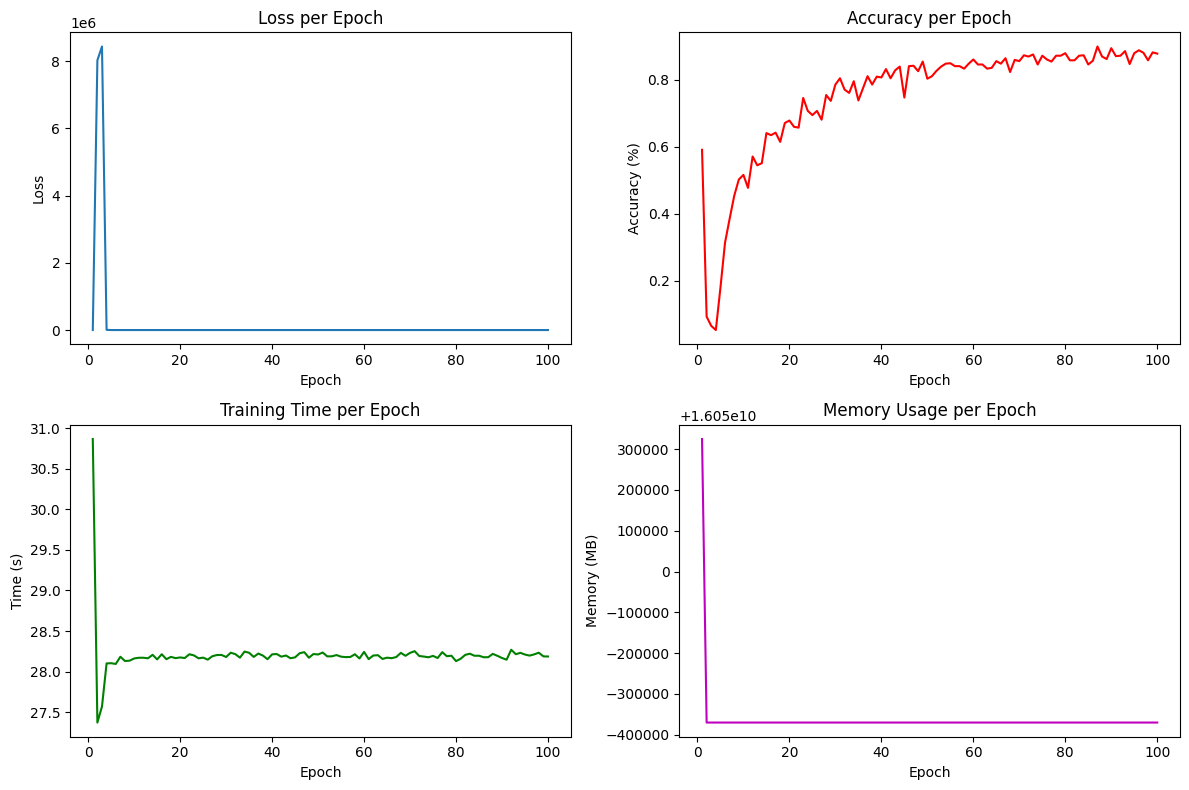

In [ ]:
import matplotlib.pyplot as plt

# Plotting the collected data
epochs = range(1, 101)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['loss'], label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['accuracy'], label='Accuracy', color='r')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['training_time'], label='Training Time', color='g')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['memory_usage'], label='Memory Usage', color='m')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()


## J. Delete model

In [ ]:
del model_rep_vit
torch.cuda.empty_cache()

# Step15: Using Rep-Vit m3

## A. Reading data

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
import time
# 假设 train_dataset 和 test_dataset 是你已经有的数据集
# 并且假设 train_labels 和 test_labels 是对应的标签列表
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)
# 将数据列表转换为numpy数组，再转换为torch张量
# 这里继续使用前面初始化数据集的代码
train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])

# 假设标签已经是整型列表
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

## B. Define parameters

In [ ]:
import timm
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from time import time

# 加载预训练模型
model_rep_vit = timm.create_model('repvit_m3.dist_in1k', pretrained=True)
# print(model_rep_vit)

model_rep_vit.head = nn.Linear(512, 10)  # 更改输出层
model_rep_vit = model_rep_vit.cuda()  # 使用 GPU
# 定义优化器和损失函数
optimizer = optim.Adam(model_rep_vit.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## C. Define testing function

In [ ]:
# 测试函数
def test_rep_vit(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')
    return correct / total


## D. Training model

In [ ]:
# 训练函数
def train_rep_vit(model, train_loader, optimizer, criterion, train_epoches=10):
    metrics = {
        'loss': [],
        'accuracy': [],
        'training_time': [],
        'memory_usage': []
    }
    model.train()
    for epoch in tqdm(range(train_epoches)):  # 运行 10 个训练周期
        running_loss = 0.0
        start_time = time()
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        training_time = time() - start_time
        avg_loss = running_loss / len(train_loader)
        test_accuracy = test_rep_vit(model, test_loader)  # Evaluate on test set
        memory_usage = torch.cuda.max_memory_allocated()   # Convert bytes to MB

        metrics['loss'].append(avg_loss)
        metrics['accuracy'].append(test_accuracy)
        metrics['training_time'].append(training_time)
        metrics['memory_usage'].append(memory_usage)
        torch.cuda.reset_peak_memory_stats()  # Reset peak memory after each epoch
        print(f'\nEpoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Time: {training_time:.2f}s, Memory Usage: {memory_usage:.2f}MB')
    return metrics
train_epoches = 20
metrics = train_rep_vit(model_rep_vit, train_loader, optimizer, criterion, train_epoches)


  5%|▌         | 1/20 [00:16<05:05, 16.07s/it]

Accuracy: 98.125%

Epoch 1, Loss: 0.4560, Accuracy: 0.98%, Time: 14.84s, Memory Usage: 16973566976.00MB


 10%|█         | 2/20 [00:31<04:42, 15.67s/it]

Accuracy: 27.625%

Epoch 2, Loss: 2474.7908, Accuracy: 0.28%, Time: 14.14s, Memory Usage: 16973254656.00MB


 15%|█▌        | 3/20 [00:46<04:24, 15.55s/it]

Accuracy: 50.0%

Epoch 3, Loss: 1.9014, Accuracy: 0.50%, Time: 14.18s, Memory Usage: 16973254656.00MB


 20%|██        | 4/20 [01:02<04:07, 15.47s/it]

Accuracy: 80.75%

Epoch 4, Loss: 1.1763, Accuracy: 0.81%, Time: 14.09s, Memory Usage: 16973254656.00MB


 25%|██▌       | 5/20 [01:17<03:51, 15.42s/it]

Accuracy: 83.25%

Epoch 5, Loss: 0.6490, Accuracy: 0.83%, Time: 14.07s, Memory Usage: 16973254656.00MB


 30%|███       | 6/20 [01:32<03:35, 15.39s/it]

Accuracy: 88.875%

Epoch 6, Loss: 0.4789, Accuracy: 0.89%, Time: 14.10s, Memory Usage: 16973254656.00MB


 35%|███▌      | 7/20 [01:48<03:19, 15.36s/it]

Accuracy: 90.375%

Epoch 7, Loss: 0.3563, Accuracy: 0.90%, Time: 14.06s, Memory Usage: 16973254656.00MB


 40%|████      | 8/20 [02:03<03:04, 15.36s/it]

Accuracy: 91.875%

Epoch 8, Loss: 0.2616, Accuracy: 0.92%, Time: 14.14s, Memory Usage: 16973254656.00MB


 45%|████▌     | 9/20 [02:18<02:48, 15.35s/it]

Accuracy: 93.75%

Epoch 9, Loss: 0.1986, Accuracy: 0.94%, Time: 14.09s, Memory Usage: 16973254656.00MB


 50%|█████     | 10/20 [02:34<02:33, 15.33s/it]

Accuracy: 93.25%

Epoch 10, Loss: 0.1777, Accuracy: 0.93%, Time: 14.06s, Memory Usage: 16973254656.00MB


 55%|█████▌    | 11/20 [02:49<02:17, 15.33s/it]

Accuracy: 94.25%

Epoch 11, Loss: 0.1459, Accuracy: 0.94%, Time: 14.09s, Memory Usage: 16973254656.00MB


 60%|██████    | 12/20 [03:04<02:02, 15.34s/it]

Accuracy: 93.875%

Epoch 12, Loss: 0.1507, Accuracy: 0.94%, Time: 14.12s, Memory Usage: 16973254656.00MB


 65%|██████▌   | 13/20 [03:20<01:47, 15.39s/it]

Accuracy: 93.25%

Epoch 13, Loss: 0.0954, Accuracy: 0.93%, Time: 14.24s, Memory Usage: 16973254656.00MB


 70%|███████   | 14/20 [03:35<01:32, 15.39s/it]

Accuracy: 95.625%

Epoch 14, Loss: 0.0892, Accuracy: 0.96%, Time: 14.14s, Memory Usage: 16973254656.00MB


 75%|███████▌  | 15/20 [03:51<01:16, 15.37s/it]

Accuracy: 94.75%

Epoch 15, Loss: 0.0636, Accuracy: 0.95%, Time: 14.10s, Memory Usage: 16973254656.00MB


 80%|████████  | 16/20 [04:06<01:01, 15.38s/it]

Accuracy: 94.25%

Epoch 16, Loss: 0.0665, Accuracy: 0.94%, Time: 14.13s, Memory Usage: 16973254656.00MB


 85%|████████▌ | 17/20 [04:21<00:46, 15.38s/it]

Accuracy: 97.0%

Epoch 17, Loss: 0.0535, Accuracy: 0.97%, Time: 14.13s, Memory Usage: 16973254656.00MB


 90%|█████████ | 18/20 [04:37<00:30, 15.38s/it]

Accuracy: 97.0%

Epoch 18, Loss: 0.0437, Accuracy: 0.97%, Time: 14.14s, Memory Usage: 16973254656.00MB


 95%|█████████▌| 19/20 [04:52<00:15, 15.38s/it]

Accuracy: 96.25%

Epoch 19, Loss: 0.0732, Accuracy: 0.96%, Time: 14.13s, Memory Usage: 16973254656.00MB


100%|██████████| 20/20 [05:07<00:00, 15.39s/it]

Accuracy: 95.875%

Epoch 20, Loss: 0.0617, Accuracy: 0.96%, Time: 14.08s, Memory Usage: 16973254656.00MB


## E. Testing model

In [ ]:
test_rep_vit(model_rep_vit, test_loader)
torch.save(model_rep_vit.state_dict(), '/content/drive/My Drive/dl_model/model_rep_vit_m3.pth')

Accuracy: 95.875%


## F. Save parameters to csv

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_rep_vit_m3/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


## G. Plot all parameters

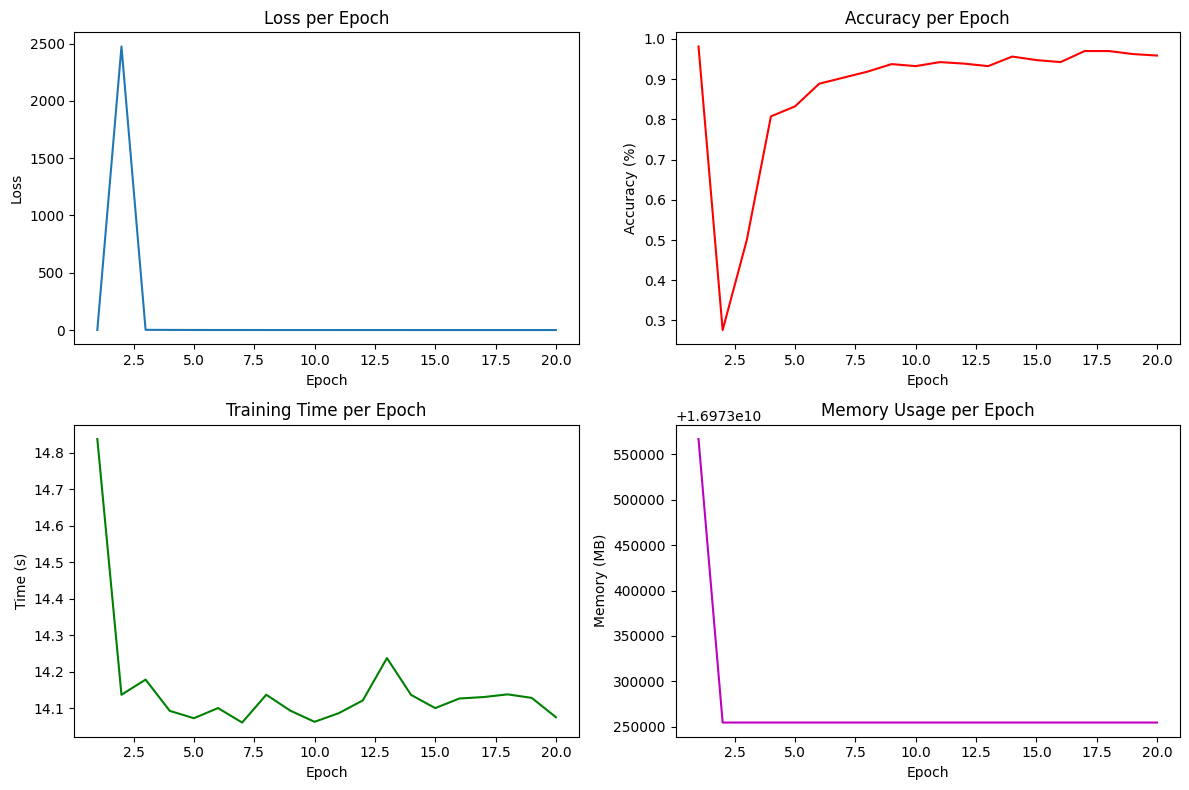

In [ ]:
import matplotlib.pyplot as plt

# Plotting the collected data
epochs = range(1, 21)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['loss'], label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['accuracy'], label='Accuracy', color='r')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['training_time'], label='Training Time', color='g')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['memory_usage'], label='Memory Usage', color='m')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()


## H. Delete model

In [ ]:
del model_rep_vit
torch.cuda.empty_cache()

## I. Try to only train one epoch

In [ ]:
import timm
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from time import time

# 加载预训练模型
model_rep_vit = timm.create_model('repvit_m3.dist_in1k', pretrained=True)
# print(model_rep_vit)

model_rep_vit.head = nn.Linear(512, 10)  # 更改输出层
model_rep_vit = model_rep_vit.cuda()  # 使用 GPU
# 定义优化器和损失函数
optimizer = optim.Adam(model_rep_vit.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
# 测试函数
def test_rep_vit(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')
    return correct / total


In [ ]:
# 训练函数
def train_rep_vit(model, train_loader, optimizer, criterion, train_epoches=10):
    metrics = {
        'loss': [],
        'accuracy': [],
        'training_time': [],
        'memory_usage': []
    }
    model.train()
    for epoch in tqdm(range(train_epoches)):  # 运行 10 个训练周期
        running_loss = 0.0
        start_time = time()
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        training_time = time() - start_time
        avg_loss = running_loss / len(train_loader)
        test_accuracy = test_rep_vit(model, test_loader)  # Evaluate on test set
        memory_usage = torch.cuda.max_memory_allocated()   # Convert bytes to MB

        metrics['loss'].append(avg_loss)
        metrics['accuracy'].append(test_accuracy)
        metrics['training_time'].append(training_time)
        metrics['memory_usage'].append(memory_usage)
        torch.cuda.reset_peak_memory_stats()  # Reset peak memory after each epoch
        print(f'\nEpoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Time: {training_time:.2f}s, Memory Usage: {memory_usage:.2f}MB')
    return metrics
train_epoches = 1
metrics = train_rep_vit(model_rep_vit, train_loader, optimizer, criterion, train_epoches)


100%|██████████| 1/1 [00:16<00:00, 16.20s/it]

Accuracy: 95.25%

Epoch 1, Loss: 0.4190, Accuracy: 0.95%, Time: 14.95s, Memory Usage: 16975172608.00MB


In [ ]:
test_rep_vit(model_rep_vit, test_loader)
torch.save(model_rep_vit.state_dict(), '/content/drive/My Drive/dl_model/model_rep_vit_m3_2.pth')

Accuracy: 95.25%


**Find that the accuracy is also very high**

In [ ]:
del model_rep_vit
torch.cuda.empty_cache()

# Step16: knowledge distillation(cnn+rep-vit)

## A. Reading data

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
from time import time
from torchvision import transforms

test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)


# 转换函数：单通道转三通道
def convert_to_3_channels(x):
    return x.repeat(3, 1, 1)

# 加载数据集
train_X = torch.stack([convert_to_3_channels(torch.Tensor(np.array(data_vector[index]).reshape(1, 28, 28))) for index in selected_indices])
test_X = torch.stack([convert_to_3_channels(torch.Tensor(np.array(data_vector[index]).reshape(1, 28, 28))) for index in remaining_indices])
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

# 创建DataLoaders
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)


## B. installing timm

In [ ]:
!pip install timm

## C. Define student and teacher model

In [ ]:
import torch.nn as nn
import timm

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x

class TeacherAdapter(nn.Module):
    def __init__(self, teacher_model, output_dim=10):
        super(TeacherAdapter, self).__init__()
        self.teacher_model = teacher_model
        self.adapter = nn.Linear(1000, output_dim)  # 假设教师模型的输出是1000维

    def forward(self, x):
        x = self.teacher_model(x)
        x = self.adapter(x)
        return x
# 初始化模型
student_model = SimpleCNN().to("cuda")
teacher_model = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
# 将适配层包装到教师模型
adapted_teacher_model = TeacherAdapter(teacher_model).eval()
adapted_teacher_model = adapted_teacher_model.to("cuda")

## D. Training model

In [ ]:
def distillation_loss(y_student, y_teacher, T=3.0):
    loss = nn.KLDivLoss()(nn.functional.log_softmax(y_student / T, dim=1),
                          nn.functional.softmax(y_teacher / T, dim=1))
    return loss

# 现在我们使用适配后的教师模型进行训练
optimizer = torch.optim.Adam(list(student_model.parameters()) + list(adapted_teacher_model.adapter.parameters()), lr=0.001)
# Metrics dictionary to store performance data
metrics = {
    'loss': [],
    'accuracy': [],
    'training_time': [],
    'memory_usage': []
}

# Function to evaluate test accuracy
def evaluate_distillation_method(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
for epoch in range(10):
    student_model.train()
    running_loss = 0.0
    start_time = time()

    for data, target in train_loader:
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        student_output = student_model(data)
        with torch.no_grad():
            teacher_output = adapted_teacher_model(data)
        loss = distillation_loss(student_output, teacher_output)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_time = time() - start_time
    avg_loss = running_loss / len(train_loader)
    test_accuracy = evaluate_distillation_method(student_model, test_loader)  # Evaluate on test set
    memory_usage = torch.cuda.max_memory_allocated() / (1024 ** 2)  # Memory usage in MB

    # Store metrics
    metrics['loss'].append(avg_loss)
    metrics['accuracy'].append(test_accuracy)
    metrics['training_time'].append(training_time)
    metrics['memory_usage'].append(memory_usage)

    torch.cuda.reset_peak_memory_stats()  # Reset peak memory statistics

    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Time: {training_time:.2f}s, Memory Usage: {memory_usage:.2f}MB')


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2949: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


Epoch 1, Loss: 0.9992, Accuracy: 7.50%, Time: 2.35s, Memory Usage: 296.42MB
Epoch 2, Loss: 0.0624, Accuracy: 9.88%, Time: 1.79s, Memory Usage: 220.87MB
Epoch 3, Loss: 0.0322, Accuracy: 10.62%, Time: 1.82s, Memory Usage: 220.87MB
Epoch 4, Loss: 0.0242, Accuracy: 11.75%, Time: 1.84s, Memory Usage: 220.87MB
Epoch 5, Loss: 0.0197, Accuracy: 10.50%, Time: 1.88s, Memory Usage: 220.87MB
Epoch 6, Loss: 0.0169, Accuracy: 8.38%, Time: 1.82s, Memory Usage: 220.87MB
Epoch 7, Loss: 0.0149, Accuracy: 10.75%, Time: 1.79s, Memory Usage: 220.87MB
Epoch 8, Loss: 0.0136, Accuracy: 10.12%, Time: 1.84s, Memory Usage: 220.87MB
Epoch 9, Loss: 0.0124, Accuracy: 11.00%, Time: 1.85s, Memory Usage: 220.87MB
Epoch 10, Loss: 0.0116, Accuracy: 10.25%, Time: 1.82s, Memory Usage: 220.87MB


## E. Plot parameters

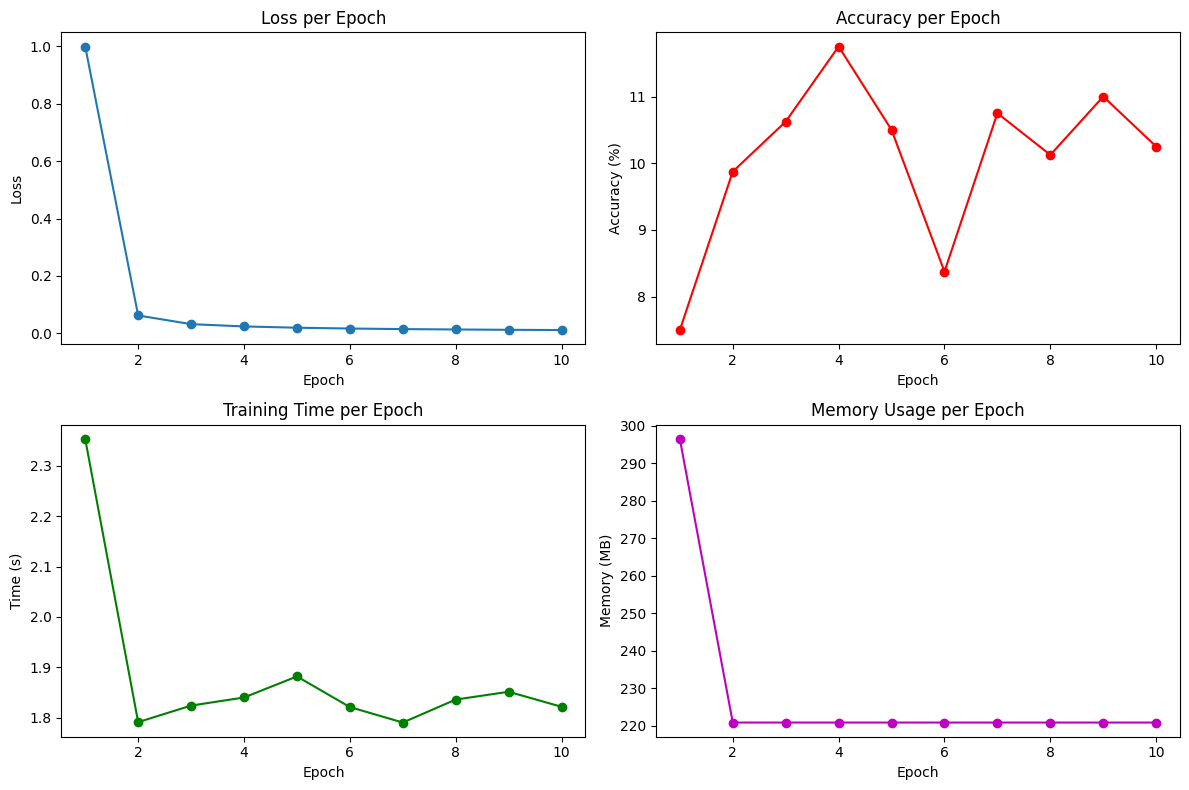

In [ ]:
import matplotlib.pyplot as plt

# Plotting the metrics
epochs = range(1, 11)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['loss'], 'o-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['accuracy'], 'o-r')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['training_time'], 'o-g')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['memory_usage'], 'o-m')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()

**Easy to find that the accuracy is not high, so I decide to not save the parameters**

# Step17: Improved code combining soft and hard targets

**After searching, I find that maybe my distillation loss function is not so great**

## A. reading data

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
import time
from torchvision import transforms

test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)


# 转换函数：单通道转三通道
def convert_to_3_channels(x):
    return x.repeat(3, 1, 1)

# 加载数据集
train_X = torch.stack([convert_to_3_channels(torch.Tensor(np.array(data_vector[index]).reshape(1, 28, 28))) for index in selected_indices])
test_X = torch.stack([convert_to_3_channels(torch.Tensor(np.array(data_vector[index]).reshape(1, 28, 28))) for index in remaining_indices])
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)

# 创建DataLoaders
train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=64, shuffle=False)


## B. installing timm

In [ ]:
!pip install timm

## C. Define model

In [ ]:
import torch.nn as nn
import timm

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x

class TeacherAdapter(nn.Module):
    def __init__(self, teacher_model, output_dim=10):
        super(TeacherAdapter, self).__init__()
        self.teacher_model = teacher_model
        self.adapter = nn.Linear(1000, output_dim)  # 假设教师模型的输出是1000维

    def forward(self, x):
        x = self.teacher_model(x)
        x = self.adapter(x)
        return x
# 初始化模型
student_model = SimpleCNN().to("cuda")
teacher_model = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
# 将适配层包装到教师模型
adapted_teacher_model = TeacherAdapter(teacher_model).eval()
adapted_teacher_model = adapted_teacher_model.to("cuda")

## D. Define combine loss

In [ ]:
# 结合使用硬目标和软目标，可能帮助提高学生模型的准确率
def combined_loss(y_student, y_teacher, y_true, T=3.0, alpha=0.5):
    kl_loss = nn.KLDivLoss()(nn.functional.log_softmax(y_student / T, dim=1),
                             nn.functional.softmax(y_teacher / T, dim=1)) * (T * T * alpha)
    ce_loss = nn.CrossEntropyLoss()(y_student, y_true) * (1 - alpha)
    return kl_loss + ce_loss
# 初始化模型
student_model = SimpleCNN().to("cuda")
teacher_model = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
# 将适配层包装到教师模型
adapted_teacher_model = TeacherAdapter(teacher_model).eval()
adapted_teacher_model = adapted_teacher_model.to("cuda")

## E. Training model

In [ ]:
# 现在我们使用适配后的教师模型进行训练
optimizer = torch.optim.Adam(list(student_model.parameters()) + list(adapted_teacher_model.adapter.parameters()), lr=0.001)
metrics = {
    'loss': [],
    'accuracy': [],
    'training_time': [],
    'memory_usage': []
}

def evaluate_accuracy_combined_loss(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    model.train()
    return 100 * correct / total

for epoch in range(10):
    start_time = time.time()
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        student_output = student_model(data)
        with torch.no_grad():
            teacher_output = adapted_teacher_model(data)
        loss = combined_loss(student_output, teacher_output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_time = time.time() - start_time
    epoch_accuracy = evaluate_accuracy_combined_loss(student_model, test_loader)
    epoch_memory_usage = torch.cuda.max_memory_allocated() / (1024 ** 2)  # Convert bytes to MB

    metrics['loss'].append(epoch_loss)
    metrics['accuracy'].append(epoch_accuracy)
    metrics['training_time'].append(epoch_time)
    metrics['memory_usage'].append(epoch_memory_usage)

    torch.cuda.reset_peak_memory_stats()  # Reset memory stats for accurate measurement

    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Time: {epoch_time:.2f}s, Memory Usage: {epoch_memory_usage:.2f}MB')

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2949: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


Epoch 1, Loss: 15.0598, Accuracy: 69.50%, Time: 1.91s, Memory Usage: 293.47MB
Epoch 2, Loss: 1.7114, Accuracy: 75.88%, Time: 1.86s, Memory Usage: 133.61MB
Epoch 3, Loss: 0.7023, Accuracy: 79.38%, Time: 1.84s, Memory Usage: 129.07MB
Epoch 4, Loss: 0.4781, Accuracy: 81.38%, Time: 1.86s, Memory Usage: 129.07MB
Epoch 5, Loss: 0.3655, Accuracy: 82.62%, Time: 1.82s, Memory Usage: 129.07MB
Epoch 6, Loss: 0.3142, Accuracy: 84.12%, Time: 1.92s, Memory Usage: 129.07MB
Epoch 7, Loss: 0.2738, Accuracy: 84.12%, Time: 1.86s, Memory Usage: 129.07MB
Epoch 8, Loss: 0.2534, Accuracy: 84.12%, Time: 1.90s, Memory Usage: 129.07MB
Epoch 9, Loss: 0.2374, Accuracy: 85.12%, Time: 1.86s, Memory Usage: 129.07MB
Epoch 10, Loss: 0.2257, Accuracy: 85.00%, Time: 1.87s, Memory Usage: 131.12MB


## F. testing model

In [ ]:
student_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.cuda(),target.cuda()
        outputs = student_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total}%')
torch.save(student_model.state_dict(), '/content/drive/My Drive/dl_model/student_model_rep_vit_cnn_new.pth')

Accuracy of the network on the test images: 85.0%


## G. ploting parameters

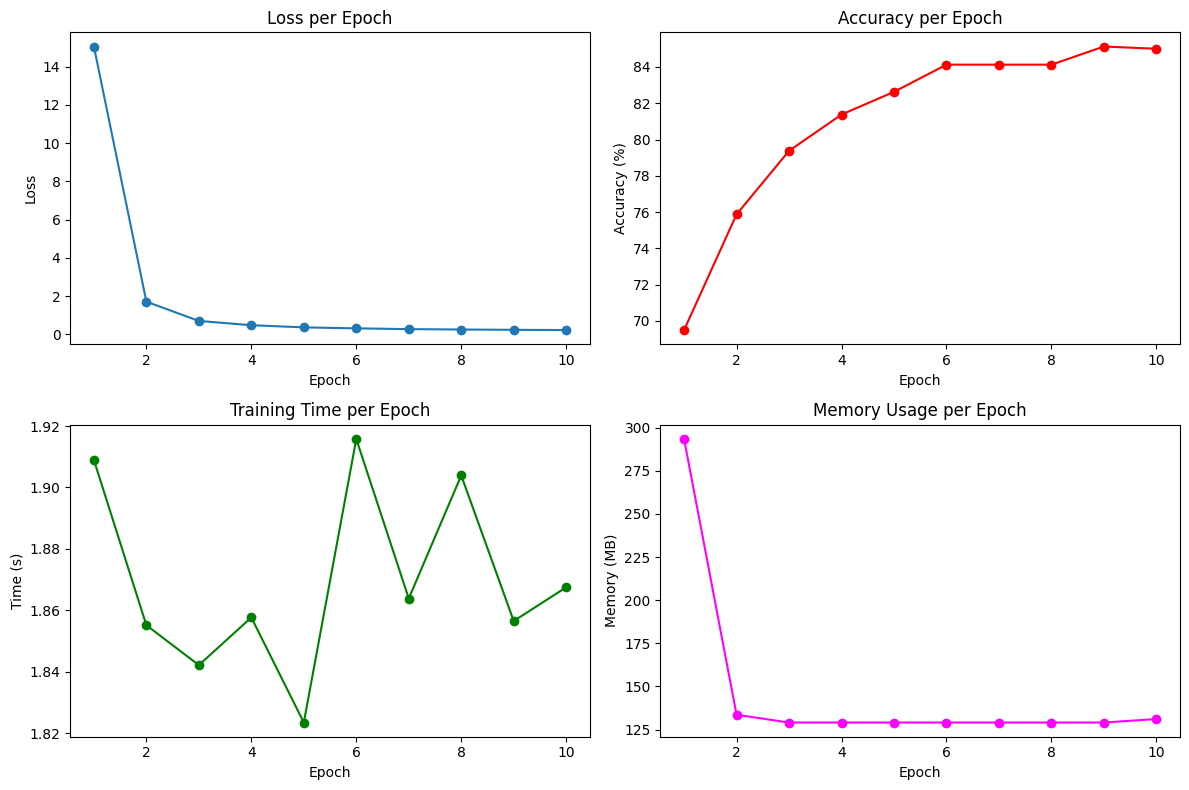

In [ ]:
import matplotlib.pyplot as plt
# Plotting
epochs = range(1, 11)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['loss'], marker='o', linestyle='-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['accuracy'], marker='o', linestyle='-', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['training_time'], marker='o', linestyle='-', color='green')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['memory_usage'], marker='o', linestyle='-', color='magenta')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()

## G. saving all parameters to csv

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_rep_vit_2.3_new/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


# Step17: Rep-vit + Mobile-vit


***When I asked gpt if there was a more suitable model than CNN, he recommended this model to me.***

## A. reading data

In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, Lambda
from PIL import Image
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import random
import time
from torchvision import transforms
# 数据转换：从1通道转换为3通道，调整大小至合适的输入尺寸
transform = Compose([
    Lambda(lambda x: x.repeat(3, 1, 1)),  # 重复通道
    Resize((224, 224)),  # 调整图像大小以符合模型输入
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])

# 应用转换和创建数据加载器
def apply_transform(data):
    transformed_data = torch.stack([transform(x) for x in data])
    return transformed_data
test_data = []
train_data = []
dataset_labels = []
data_vector = []
with open('/content/drive/MyDrive/data/digits4000_digits_labels.txt','r') as file:
    for line in file:
        dataset_labels.append(int(line.strip()))

with open('/content/drive/MyDrive/data/digits4000_testset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        test_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_trainset.txt','r') as file:
    for line in file:
        data = line.strip().split('\t')
        train_data.append(data)
with open('/content/drive/MyDrive/data/digits4000_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    data_vector.append(line_data)


# 总数据集长度
total_data = len(dataset_labels)
# 计算需要选择的数据数量
num_to_select = int(total_data * 0.8)

# 随机选取 80% 的下标
selected_indices = random.sample(range(len(dataset_labels)), num_to_select)
# 构建整个数据集的索引集合
all_indices = set(range(len(dataset_labels)))

# 已选择索引的集合
selected_indices_set = set(selected_indices)

# 通过差集运算获得剩余未选取的索引
remaining_indices = list(all_indices - selected_indices_set)
# 使用选取的下标提取对应的数据
selected_trainning_data = [dataset_labels[i] for i in selected_indices]
selected_testing_data = [dataset_labels[i] for i in remaining_indices]
train_labels = np.array(selected_trainning_data)
test_labels = np.array(selected_testing_data)

train_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in selected_indices])
print(train_X.shape)
test_X = torch.Tensor([np.array(data_vector[index]).reshape(1, 28, 28) for index in remaining_indices])
train_Y = torch.LongTensor(train_labels)
test_Y = torch.LongTensor(test_labels)
train_X = apply_transform(train_X)
test_X = apply_transform(test_X)

train_loader = DataLoader(TensorDataset(train_X, train_Y), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(test_X, test_Y), batch_size=128, shuffle=False)


torch.Size([3200, 1, 28, 28])


## B. installing timm

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

## C. loading models

In [ ]:
import timm
import torch.nn as nn

# 加载模型
model_repvit = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)

# 修改 RepVit 的输出层
model_repvit.head = nn.Linear(640, 10)
# 将模型转移到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_repvit = model_repvit.to(device)
model_mobilevit = model_mobilevit.to(device)


## D. Define distillation loss

In [ ]:
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
def distillation_loss(y_student, y_teacher, T=3.0):
    """
    Calculate the distillation loss (Kullback-Leibler divergence)
    """
    teacher_scores = F.softmax(y_teacher / T, dim=1)
    student_log_scores = F.log_softmax(y_student / T, dim=1)
    loss = F.kl_div(student_log_scores, teacher_scores, reduction='batchmean')
    return loss




## E. training model

In [ ]:
from tqdm import tqdm
import time
def train_with_distillation(teacher_model, student_model, train_loader, optimizer, criterion, distill_criterion, T, device):
    teacher_model.eval()  # 教师模型设置为评估模式
    student_model.train()  # 学生模型设置为训练模式
    metrics = {
        'loss': [],
        'accuracy': [],
        'training_time': [],
        'memory_usage': []
    }
    def test_model_rep_mobile_vit(model, test_loader, device):
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm(test_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'Accuracy: {100 * correct / total}%')
        model.train()
        return 100 * correct / total

    for epoch in tqdm(range(100)):
        start_time = time.time()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # 教师模型的前向传播
            with torch.no_grad():
                teacher_outputs = teacher_model(images)

            # 学生模型的前向传播
            optimizer.zero_grad()
            student_outputs = student_model(images)

            # 计算损失
            loss_ce = criterion(student_outputs, labels)  # 交叉熵损失
            loss_distill = distill_criterion(student_outputs, teacher_outputs, T)  # 蒸馏损失
            loss = loss_ce + loss_distill  # 总损失

            # 反向传播和优化
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        epoch_time = time.time() - start_time
        epoch_accuracy = test_model_rep_mobile_vit(student_model, test_loader, "cuda")
        epoch_memory_usage = torch.cuda.max_memory_allocated() / (1024 ** 2)  # Convert bytes to MB

        metrics['loss'].append(epoch_loss)
        metrics['accuracy'].append(epoch_accuracy)
        metrics['training_time'].append(epoch_time)
        metrics['memory_usage'].append(epoch_memory_usage)
        torch.cuda.reset_peak_memory_stats()  # Reset memory stats for accurate measurement
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)},Accuracy: {epoch_accuracy:.2f}%, Time: {epoch_time:.2f}s, Memory Usage: {epoch_memory_usage:.2f}MB')
    return metrics
# 设置优化器和损失函数
optimizer_student = optim.Adam(model_mobilevit.parameters(), lr=0.001)
criterion_ce = nn.CrossEntropyLoss()

# 开始训练
metrics = train_with_distillation(model_repvit, model_mobilevit, train_loader, optimizer_student, criterion_ce, distillation_loss, T=3.0, device=device)


  1%|          | 1/100 [00:16<27:16, 16.53s/it]

Accuracy: 36.75%
Epoch 1, Loss: 3.6699828815460207,Accuracy: 36.75%, Time: 15.97s, Memory Usage: 5666.88MB



  2%|▏         | 2/100 [00:33<27:03, 16.57s/it]

Accuracy: 88.25%
Epoch 2, Loss: 2.533061876296997,Accuracy: 88.25%, Time: 16.02s, Memory Usage: 5666.88MB



  3%|▎         | 3/100 [00:49<26:51, 16.62s/it]

Accuracy: 96.0%
Epoch 3, Loss: 2.3127338600158693,Accuracy: 96.00%, Time: 16.10s, Memory Usage: 5666.88MB



  4%|▍         | 4/100 [01:06<26:38, 16.65s/it]

Accuracy: 93.125%
Epoch 4, Loss: 2.133077850341797,Accuracy: 93.12%, Time: 16.13s, Memory Usage: 5666.88MB



  5%|▌         | 5/100 [01:23<26:25, 16.69s/it]

Accuracy: 96.0%
Epoch 5, Loss: 2.044678945541382,Accuracy: 96.00%, Time: 16.19s, Memory Usage: 5666.88MB



  6%|▌         | 6/100 [01:40<26:14, 16.75s/it]

Accuracy: 91.875%
Epoch 6, Loss: 1.9993685150146485,Accuracy: 91.88%, Time: 16.28s, Memory Usage: 5666.88MB



  7%|▋         | 7/100 [01:56<25:59, 16.77s/it]

Accuracy: 96.25%
Epoch 7, Loss: 1.9439517641067505,Accuracy: 96.25%, Time: 16.25s, Memory Usage: 5666.88MB



  8%|▊         | 8/100 [02:13<25:44, 16.79s/it]

Accuracy: 96.875%
Epoch 8, Loss: 1.914413695335388,Accuracy: 96.88%, Time: 16.25s, Memory Usage: 5666.88MB



  9%|▉         | 9/100 [02:30<25:31, 16.83s/it]

Accuracy: 96.5%
Epoch 9, Loss: 1.9136752414703369,Accuracy: 96.50%, Time: 16.31s, Memory Usage: 5666.88MB



 10%|█         | 10/100 [02:47<25:17, 16.86s/it]

Accuracy: 97.0%
Epoch 10, Loss: 1.8856397533416749,Accuracy: 97.00%, Time: 16.35s, Memory Usage: 5666.88MB



 11%|█         | 11/100 [03:04<25:01, 16.87s/it]

Accuracy: 97.5%
Epoch 11, Loss: 1.8568048286437988,Accuracy: 97.50%, Time: 16.34s, Memory Usage: 5666.88MB



 12%|█▏        | 12/100 [03:21<24:46, 16.89s/it]

Accuracy: 98.0%
Epoch 12, Loss: 1.8417604780197143,Accuracy: 98.00%, Time: 16.36s, Memory Usage: 5666.88MB



 13%|█▎        | 13/100 [03:38<24:29, 16.90s/it]

Accuracy: 89.625%
Epoch 13, Loss: 1.838152437210083,Accuracy: 89.62%, Time: 16.33s, Memory Usage: 5666.88MB



 14%|█▍        | 14/100 [03:55<24:12, 16.89s/it]

Accuracy: 86.0%
Epoch 14, Loss: 1.8637082719802855,Accuracy: 86.00%, Time: 16.32s, Memory Usage: 5666.88MB



 15%|█▌        | 15/100 [04:12<23:56, 16.90s/it]

Accuracy: 90.75%
Epoch 15, Loss: 1.8498130655288696,Accuracy: 90.75%, Time: 16.35s, Memory Usage: 5666.88MB



 16%|█▌        | 16/100 [04:29<23:40, 16.91s/it]

Accuracy: 93.625%
Epoch 16, Loss: 1.8397221660614014,Accuracy: 93.62%, Time: 16.34s, Memory Usage: 5666.88MB



 17%|█▋        | 17/100 [04:45<23:23, 16.91s/it]

Accuracy: 87.125%
Epoch 17, Loss: 1.8306411504745483,Accuracy: 87.12%, Time: 16.33s, Memory Usage: 5666.88MB



 18%|█▊        | 18/100 [05:02<23:06, 16.91s/it]

Accuracy: 97.75%
Epoch 18, Loss: 1.8225909328460694,Accuracy: 97.75%, Time: 16.34s, Memory Usage: 5666.88MB



 19%|█▉        | 19/100 [05:19<22:49, 16.91s/it]

Accuracy: 97.875%
Epoch 19, Loss: 1.8103499364852906,Accuracy: 97.88%, Time: 16.33s, Memory Usage: 5666.88MB



 20%|██        | 20/100 [05:36<22:32, 16.91s/it]

Accuracy: 93.5%
Epoch 20, Loss: 1.8015886163711547,Accuracy: 93.50%, Time: 16.33s, Memory Usage: 5666.88MB



 21%|██        | 21/100 [05:53<22:15, 16.91s/it]

Accuracy: 98.25%
Epoch 21, Loss: 1.7854303550720214,Accuracy: 98.25%, Time: 16.34s, Memory Usage: 5666.88MB



 22%|██▏       | 22/100 [06:10<21:59, 16.91s/it]

Accuracy: 97.875%
Epoch 22, Loss: 1.773370099067688,Accuracy: 97.88%, Time: 16.34s, Memory Usage: 5666.88MB



 23%|██▎       | 23/100 [06:27<21:42, 16.92s/it]

Accuracy: 96.875%
Epoch 23, Loss: 1.7746966409683227,Accuracy: 96.88%, Time: 16.36s, Memory Usage: 5666.88MB



 24%|██▍       | 24/100 [06:44<21:25, 16.92s/it]

Accuracy: 97.5%
Epoch 24, Loss: 1.7559124374389647,Accuracy: 97.50%, Time: 16.33s, Memory Usage: 5666.88MB



 25%|██▌       | 25/100 [07:01<21:08, 16.92s/it]

Accuracy: 96.5%
Epoch 25, Loss: 1.742888422012329,Accuracy: 96.50%, Time: 16.34s, Memory Usage: 5666.88MB



 26%|██▌       | 26/100 [07:18<20:51, 16.92s/it]

Accuracy: 97.375%
Epoch 26, Loss: 1.7239077615737914,Accuracy: 97.38%, Time: 16.34s, Memory Usage: 5666.88MB



 27%|██▋       | 27/100 [07:35<20:35, 16.92s/it]

Accuracy: 97.5%
Epoch 27, Loss: 1.7071147441864014,Accuracy: 97.50%, Time: 16.34s, Memory Usage: 5666.88MB



 28%|██▊       | 28/100 [07:52<20:18, 16.93s/it]

Accuracy: 95.875%
Epoch 28, Loss: 1.6700486516952515,Accuracy: 95.88%, Time: 16.36s, Memory Usage: 5666.88MB



 29%|██▉       | 29/100 [08:09<20:01, 16.93s/it]

Accuracy: 95.5%
Epoch 29, Loss: 1.6739581108093262,Accuracy: 95.50%, Time: 16.36s, Memory Usage: 5666.88MB



 30%|███       | 30/100 [08:25<19:44, 16.93s/it]

Accuracy: 95.75%
Epoch 30, Loss: 1.645725474357605,Accuracy: 95.75%, Time: 16.34s, Memory Usage: 5666.88MB



 31%|███       | 31/100 [08:42<19:27, 16.92s/it]

Accuracy: 96.75%
Epoch 31, Loss: 1.622978343963623,Accuracy: 96.75%, Time: 16.33s, Memory Usage: 5666.88MB



 32%|███▏      | 32/100 [08:59<19:10, 16.92s/it]

Accuracy: 88.125%
Epoch 32, Loss: 1.6265107011795044,Accuracy: 88.12%, Time: 16.33s, Memory Usage: 5666.88MB



 33%|███▎      | 33/100 [09:16<18:53, 16.92s/it]

Accuracy: 94.125%
Epoch 33, Loss: 1.6097258996963502,Accuracy: 94.12%, Time: 16.35s, Memory Usage: 5666.98MB



 34%|███▍      | 34/100 [09:33<18:37, 16.92s/it]

Accuracy: 94.875%
Epoch 34, Loss: 1.636083025932312,Accuracy: 94.88%, Time: 16.35s, Memory Usage: 5666.88MB



 35%|███▌      | 35/100 [09:50<18:20, 16.92s/it]

Accuracy: 95.0%
Epoch 35, Loss: 1.5759715986251832,Accuracy: 95.00%, Time: 16.35s, Memory Usage: 5666.88MB



 36%|███▌      | 36/100 [10:07<18:02, 16.92s/it]

Accuracy: 95.75%
Epoch 36, Loss: 1.5157853937149048,Accuracy: 95.75%, Time: 16.34s, Memory Usage: 5666.88MB



 37%|███▋      | 37/100 [10:24<17:45, 16.92s/it]

Accuracy: 95.0%
Epoch 37, Loss: 1.4669511556625365,Accuracy: 95.00%, Time: 16.34s, Memory Usage: 5666.88MB



 38%|███▊      | 38/100 [10:41<17:28, 16.92s/it]

Accuracy: 95.75%
Epoch 38, Loss: 1.445846242904663,Accuracy: 95.75%, Time: 16.33s, Memory Usage: 5666.88MB



 39%|███▉      | 39/100 [10:58<17:11, 16.92s/it]

Accuracy: 95.625%
Epoch 39, Loss: 1.4164978933334351,Accuracy: 95.62%, Time: 16.35s, Memory Usage: 5666.88MB



 40%|████      | 40/100 [11:15<16:54, 16.91s/it]

Accuracy: 90.75%
Epoch 40, Loss: 1.3863900756835938,Accuracy: 90.75%, Time: 16.33s, Memory Usage: 5666.88MB



 41%|████      | 41/100 [11:32<16:37, 16.91s/it]

Accuracy: 93.25%
Epoch 41, Loss: 1.3725333786010743,Accuracy: 93.25%, Time: 16.34s, Memory Usage: 5666.88MB



 42%|████▏     | 42/100 [11:48<16:21, 16.92s/it]

Accuracy: 86.375%
Epoch 42, Loss: 1.3859415531158448,Accuracy: 86.38%, Time: 16.35s, Memory Usage: 5666.88MB



 43%|████▎     | 43/100 [12:05<16:04, 16.91s/it]

Accuracy: 96.625%
Epoch 43, Loss: 1.3675882530212402,Accuracy: 96.62%, Time: 16.33s, Memory Usage: 5666.88MB



 44%|████▍     | 44/100 [12:22<15:47, 16.92s/it]

Accuracy: 93.875%
Epoch 44, Loss: 1.30483802318573,Accuracy: 93.88%, Time: 16.35s, Memory Usage: 5666.88MB



 45%|████▌     | 45/100 [12:39<15:30, 16.92s/it]

Accuracy: 92.0%
Epoch 45, Loss: 1.2776673030853272,Accuracy: 92.00%, Time: 16.34s, Memory Usage: 5666.88MB



 46%|████▌     | 46/100 [12:56<15:13, 16.92s/it]

Accuracy: 94.75%
Epoch 46, Loss: 1.2712639665603638,Accuracy: 94.75%, Time: 16.33s, Memory Usage: 5666.88MB



 47%|████▋     | 47/100 [13:13<14:56, 16.92s/it]

Accuracy: 95.875%
Epoch 47, Loss: 1.2570799350738526,Accuracy: 95.88%, Time: 16.34s, Memory Usage: 5666.88MB



 48%|████▊     | 48/100 [13:30<14:39, 16.92s/it]

Accuracy: 96.625%
Epoch 48, Loss: 1.2315703344345093,Accuracy: 96.62%, Time: 16.35s, Memory Usage: 5666.88MB



 49%|████▉     | 49/100 [13:47<14:22, 16.92s/it]

Accuracy: 93.25%
Epoch 49, Loss: 1.2216128921508789,Accuracy: 93.25%, Time: 16.34s, Memory Usage: 5666.88MB



 50%|█████     | 50/100 [14:04<14:06, 16.92s/it]

Accuracy: 97.125%
Epoch 50, Loss: 1.2038932180404662,Accuracy: 97.12%, Time: 16.35s, Memory Usage: 5666.88MB



 51%|█████     | 51/100 [14:21<13:49, 16.92s/it]

Accuracy: 96.75%
Epoch 51, Loss: 1.1850722599029542,Accuracy: 96.75%, Time: 16.35s, Memory Usage: 5666.88MB



 52%|█████▏    | 52/100 [14:38<13:31, 16.92s/it]

Accuracy: 95.125%
Epoch 52, Loss: 1.167681040763855,Accuracy: 95.12%, Time: 16.33s, Memory Usage: 5666.88MB



 53%|█████▎    | 53/100 [14:55<13:14, 16.91s/it]

Accuracy: 96.0%
Epoch 53, Loss: 1.161026406288147,Accuracy: 96.00%, Time: 16.32s, Memory Usage: 5666.88MB



 54%|█████▍    | 54/100 [15:11<12:57, 16.91s/it]

Accuracy: 96.5%
Epoch 54, Loss: 1.1495123195648194,Accuracy: 96.50%, Time: 16.34s, Memory Usage: 5666.88MB



 55%|█████▌    | 55/100 [15:28<12:40, 16.91s/it]

Accuracy: 97.875%
Epoch 55, Loss: 1.1528079414367676,Accuracy: 97.88%, Time: 16.33s, Memory Usage: 5666.88MB



 56%|█████▌    | 56/100 [15:45<12:24, 16.91s/it]

Accuracy: 94.75%
Epoch 56, Loss: 1.159934959411621,Accuracy: 94.75%, Time: 16.34s, Memory Usage: 5666.88MB



 57%|█████▋    | 57/100 [16:02<12:07, 16.91s/it]

Accuracy: 95.5%
Epoch 57, Loss: 1.1611430644989014,Accuracy: 95.50%, Time: 16.34s, Memory Usage: 5666.98MB



 58%|█████▊    | 58/100 [16:19<11:50, 16.91s/it]

Accuracy: 89.125%
Epoch 58, Loss: 1.176128282546997,Accuracy: 89.12%, Time: 16.34s, Memory Usage: 5666.88MB



 59%|█████▉    | 59/100 [16:36<11:33, 16.91s/it]

Accuracy: 90.875%
Epoch 59, Loss: 1.1927529001235961,Accuracy: 90.88%, Time: 16.32s, Memory Usage: 5666.88MB



 60%|██████    | 60/100 [16:53<11:19, 16.99s/it]

Accuracy: 96.375%
Epoch 60, Loss: 1.162685785293579,Accuracy: 96.38%, Time: 16.62s, Memory Usage: 5666.88MB



 61%|██████    | 61/100 [17:10<11:01, 16.96s/it]

Accuracy: 97.875%
Epoch 61, Loss: 1.1367726230621338,Accuracy: 97.88%, Time: 16.31s, Memory Usage: 5666.88MB



 62%|██████▏   | 62/100 [17:27<10:43, 16.94s/it]

Accuracy: 96.0%
Epoch 62, Loss: 1.1279706859588623,Accuracy: 96.00%, Time: 16.31s, Memory Usage: 5666.88MB



 63%|██████▎   | 63/100 [17:44<10:26, 16.93s/it]

Accuracy: 97.0%
Epoch 63, Loss: 1.1191263961791993,Accuracy: 97.00%, Time: 16.33s, Memory Usage: 5666.88MB



 64%|██████▍   | 64/100 [18:01<10:09, 16.93s/it]

Accuracy: 96.0%
Epoch 64, Loss: 1.1064862155914306,Accuracy: 96.00%, Time: 16.35s, Memory Usage: 5666.88MB



 65%|██████▌   | 65/100 [18:18<09:52, 16.92s/it]

Accuracy: 97.0%
Epoch 65, Loss: 1.100032434463501,Accuracy: 97.00%, Time: 16.32s, Memory Usage: 5666.88MB



 66%|██████▌   | 66/100 [18:35<09:35, 16.91s/it]

Accuracy: 96.5%
Epoch 66, Loss: 1.0934592294692993,Accuracy: 96.50%, Time: 16.32s, Memory Usage: 5666.88MB



 67%|██████▋   | 67/100 [18:52<09:17, 16.91s/it]

Accuracy: 96.875%
Epoch 67, Loss: 1.0875957345962524,Accuracy: 96.88%, Time: 16.32s, Memory Usage: 5666.88MB



 68%|██████▊   | 68/100 [19:08<09:01, 16.91s/it]

Accuracy: 97.5%
Epoch 68, Loss: 1.0863405799865722,Accuracy: 97.50%, Time: 16.35s, Memory Usage: 5666.88MB



 69%|██████▉   | 69/100 [19:25<08:44, 16.91s/it]

Accuracy: 97.5%
Epoch 69, Loss: 1.0845033502578736,Accuracy: 97.50%, Time: 16.32s, Memory Usage: 5666.88MB



 70%|███████   | 70/100 [19:42<08:27, 16.90s/it]

Accuracy: 97.5%
Epoch 70, Loss: 1.0859536266326903,Accuracy: 97.50%, Time: 16.32s, Memory Usage: 5666.88MB



 71%|███████   | 71/100 [19:59<08:10, 16.91s/it]

Accuracy: 97.25%
Epoch 71, Loss: 1.0792835140228272,Accuracy: 97.25%, Time: 16.34s, Memory Usage: 5666.88MB



 72%|███████▏  | 72/100 [20:16<07:53, 16.92s/it]

Accuracy: 98.0%
Epoch 72, Loss: 1.074372112751007,Accuracy: 98.00%, Time: 16.36s, Memory Usage: 5666.88MB



 73%|███████▎  | 73/100 [20:33<07:36, 16.92s/it]

Accuracy: 96.75%
Epoch 73, Loss: 1.0738459777832032,Accuracy: 96.75%, Time: 16.34s, Memory Usage: 5666.88MB



 74%|███████▍  | 74/100 [20:50<07:19, 16.92s/it]

Accuracy: 96.875%
Epoch 74, Loss: 1.0839052200317383,Accuracy: 96.88%, Time: 16.33s, Memory Usage: 5666.88MB



 75%|███████▌  | 75/100 [21:07<07:02, 16.92s/it]

Accuracy: 97.625%
Epoch 75, Loss: 1.0820974922180175,Accuracy: 97.62%, Time: 16.35s, Memory Usage: 5666.88MB



 76%|███████▌  | 76/100 [21:24<06:46, 16.92s/it]

Accuracy: 96.0%
Epoch 76, Loss: 1.0779487133026122,Accuracy: 96.00%, Time: 16.33s, Memory Usage: 5666.88MB



 77%|███████▋  | 77/100 [21:41<06:28, 16.91s/it]

Accuracy: 97.5%
Epoch 77, Loss: 1.0762593364715576,Accuracy: 97.50%, Time: 16.32s, Memory Usage: 5666.88MB



 78%|███████▊  | 78/100 [21:58<06:12, 16.92s/it]

Accuracy: 97.875%
Epoch 78, Loss: 1.0701374197006226,Accuracy: 97.88%, Time: 16.35s, Memory Usage: 5666.88MB



 79%|███████▉  | 79/100 [22:14<05:55, 16.91s/it]

Accuracy: 96.875%
Epoch 79, Loss: 1.0664366817474364,Accuracy: 96.88%, Time: 16.33s, Memory Usage: 5666.88MB



 80%|████████  | 80/100 [22:31<05:38, 16.92s/it]

Accuracy: 97.625%
Epoch 80, Loss: 1.0642049837112426,Accuracy: 97.62%, Time: 16.35s, Memory Usage: 5666.88MB



 81%|████████  | 81/100 [22:48<05:21, 16.91s/it]

Accuracy: 97.5%
Epoch 81, Loss: 1.061599326133728,Accuracy: 97.50%, Time: 16.32s, Memory Usage: 5666.88MB



 82%|████████▏ | 82/100 [23:05<05:04, 16.91s/it]

Accuracy: 97.625%
Epoch 82, Loss: 1.062305383682251,Accuracy: 97.62%, Time: 16.34s, Memory Usage: 5666.88MB



 83%|████████▎ | 83/100 [23:22<04:47, 16.91s/it]

Accuracy: 97.125%
Epoch 83, Loss: 1.0589112377166747,Accuracy: 97.12%, Time: 16.33s, Memory Usage: 5666.88MB



 84%|████████▍ | 84/100 [23:39<04:30, 16.91s/it]

Accuracy: 97.875%
Epoch 84, Loss: 1.0582473468780518,Accuracy: 97.88%, Time: 16.33s, Memory Usage: 5666.88MB



 85%|████████▌ | 85/100 [23:56<04:13, 16.90s/it]

Accuracy: 96.875%
Epoch 85, Loss: 1.0544831013679505,Accuracy: 96.88%, Time: 16.32s, Memory Usage: 5666.88MB



 86%|████████▌ | 86/100 [24:13<03:56, 16.90s/it]

Accuracy: 98.0%
Epoch 86, Loss: 1.0551174831390382,Accuracy: 98.00%, Time: 16.32s, Memory Usage: 5666.88MB



 87%|████████▋ | 87/100 [24:30<03:39, 16.90s/it]

Accuracy: 97.0%
Epoch 87, Loss: 1.0548416042327882,Accuracy: 97.00%, Time: 16.32s, Memory Usage: 5666.88MB



 88%|████████▊ | 88/100 [24:47<03:22, 16.90s/it]

Accuracy: 97.625%
Epoch 88, Loss: 1.0554328918457032,Accuracy: 97.62%, Time: 16.32s, Memory Usage: 5666.88MB



 89%|████████▉ | 89/100 [25:04<03:05, 16.91s/it]

Accuracy: 96.75%
Epoch 89, Loss: 1.056937382221222,Accuracy: 96.75%, Time: 16.34s, Memory Usage: 5666.88MB



 90%|█████████ | 90/100 [25:20<02:49, 16.91s/it]

Accuracy: 97.375%
Epoch 90, Loss: 1.0552470421791076,Accuracy: 97.38%, Time: 16.33s, Memory Usage: 5666.88MB



 91%|█████████ | 91/100 [25:37<02:32, 16.91s/it]

Accuracy: 96.625%
Epoch 91, Loss: 1.0572259140014648,Accuracy: 96.62%, Time: 16.34s, Memory Usage: 5666.88MB



 92%|█████████▏| 92/100 [25:54<02:15, 16.92s/it]

Accuracy: 96.75%
Epoch 92, Loss: 1.053934907913208,Accuracy: 96.75%, Time: 16.35s, Memory Usage: 5666.88MB



 93%|█████████▎| 93/100 [26:11<01:58, 16.91s/it]

Accuracy: 97.375%
Epoch 93, Loss: 1.0501138710975646,Accuracy: 97.38%, Time: 16.33s, Memory Usage: 5666.88MB



 94%|█████████▍| 94/100 [26:28<01:41, 16.91s/it]

Accuracy: 98.5%
Epoch 94, Loss: 1.0483866429328919,Accuracy: 98.50%, Time: 16.33s, Memory Usage: 5666.88MB



 95%|█████████▌| 95/100 [26:45<01:24, 16.91s/it]

Accuracy: 97.625%
Epoch 95, Loss: 1.0479810762405395,Accuracy: 97.62%, Time: 16.33s, Memory Usage: 5666.88MB



 96%|█████████▌| 96/100 [27:02<01:07, 16.91s/it]

Accuracy: 97.375%
Epoch 96, Loss: 1.0477307009696961,Accuracy: 97.38%, Time: 16.33s, Memory Usage: 5666.88MB



 97%|█████████▋| 97/100 [27:19<00:50, 16.90s/it]

Accuracy: 97.625%
Epoch 97, Loss: 1.0489456701278685,Accuracy: 97.62%, Time: 16.32s, Memory Usage: 5666.88MB



 98%|█████████▊| 98/100 [27:36<00:33, 16.90s/it]

Accuracy: 97.0%
Epoch 98, Loss: 1.0489730310440064,Accuracy: 97.00%, Time: 16.33s, Memory Usage: 5666.88MB



 99%|█████████▉| 99/100 [27:53<00:16, 16.91s/it]

Accuracy: 97.75%
Epoch 99, Loss: 1.0496056294441223,Accuracy: 97.75%, Time: 16.34s, Memory Usage: 5666.88MB



100%|██████████| 100/100 [28:10<00:00, 16.90s/it]

Accuracy: 97.625%
Epoch 100, Loss: 1.048962240219116,Accuracy: 97.62%, Time: 16.35s, Memory Usage: 5666.88MB


## F. ploting parameters

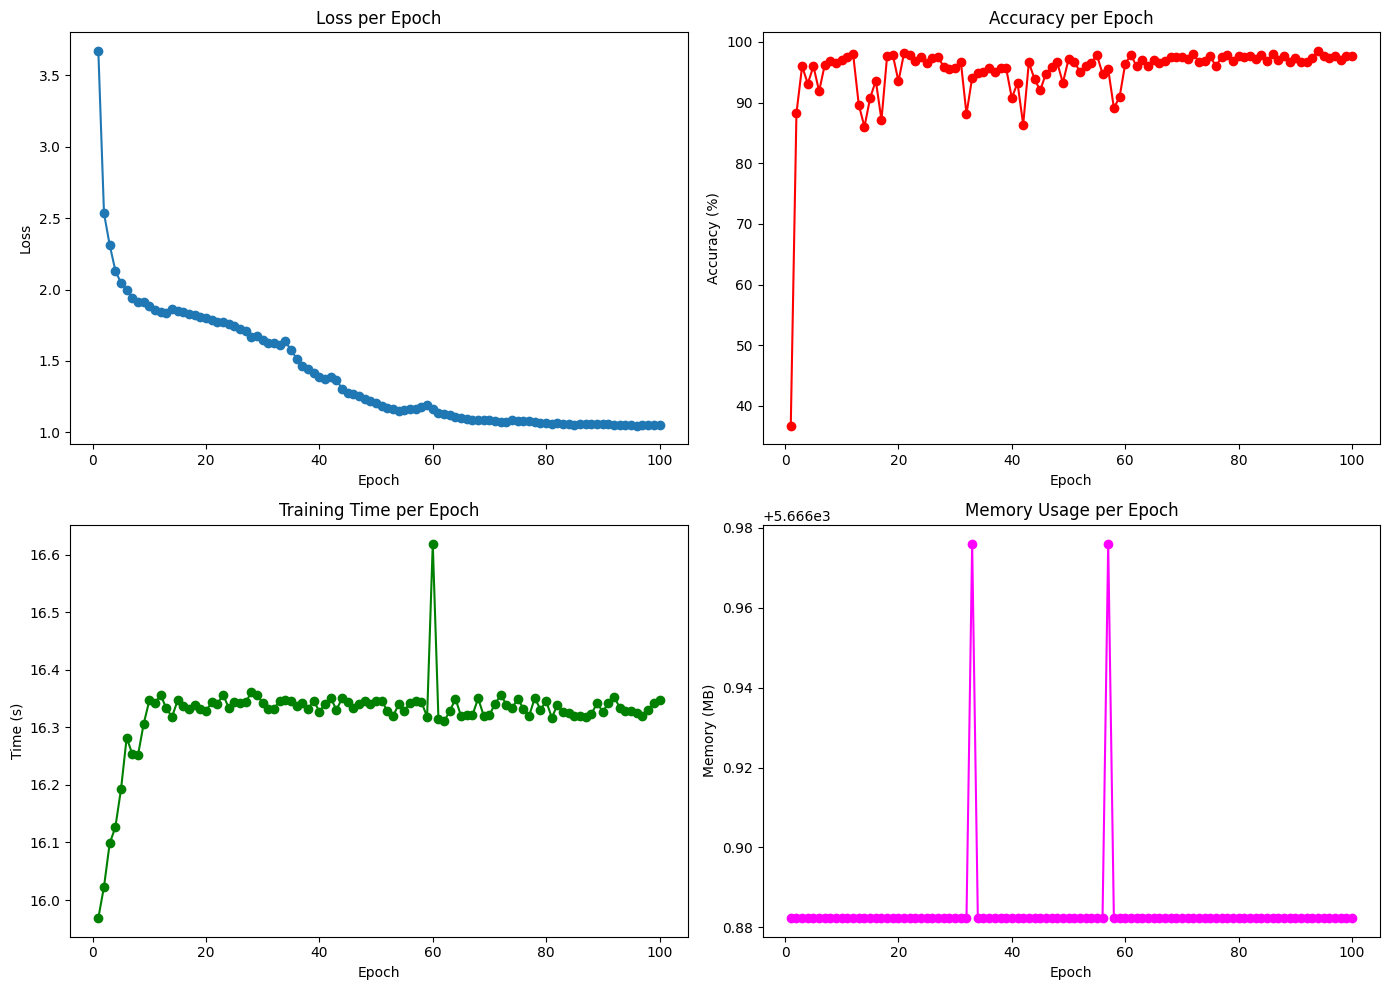

In [ ]:
import matplotlib.pyplot as plt
# Plotting
epochs = range(1, 101)
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['loss'], marker='o', linestyle='-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['accuracy'], marker='o', linestyle='-', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['training_time'], marker='o', linestyle='-', color='green')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['memory_usage'], marker='o', linestyle='-', color='magenta')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()

## G. saving data to csv

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_rep_vit_and_mobile_vit/model_performance_metrics.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


## H. Testing model

In [ ]:
def evaluate_accuracy_combined_loss(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy:{100 * correct / total}%")
    return 100 * correct / total

In [ ]:
accuracy = evaluate_accuracy_combined_loss(model_mobilevit, test_loader)
torch.save(model_mobilevit.state_dict(), '/content/drive/My Drive/dl_model/student_model_mobilevit_4.pth')

Accuracy:97.625%


## I. Training once again

***Because it was found from the images that the training accuracy after more than 60 times has been fluctuating, and the difference is not big.***

In [ ]:
import timm
import torch.nn as nn

# 加载模型
model_repvit = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)

# 修改 RepVit 的输出层
model_repvit.head = nn.Linear(640, 10)
# 将模型转移到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_repvit = model_repvit.to(device)
model_mobilevit = model_mobilevit.to(device)


In [ ]:
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
def distillation_loss(y_student, y_teacher, T=3.0):
    """
    Calculate the distillation loss (Kullback-Leibler divergence)
    """
    teacher_scores = F.softmax(y_teacher / T, dim=1)
    student_log_scores = F.log_softmax(y_student / T, dim=1)
    loss = F.kl_div(student_log_scores, teacher_scores, reduction='batchmean')
    return loss

In [ ]:
from tqdm import tqdm
import time
def train_with_distillation(teacher_model, student_model, train_loader, optimizer, criterion, distill_criterion, T, device):
    teacher_model.eval()  # 教师模型设置为评估模式
    student_model.train()  # 学生模型设置为训练模式
    metrics = {
        'loss': [],
        'accuracy': [],
        'training_time': [],
        'memory_usage': []
    }
    def test_model_rep_mobile_vit(model, test_loader, device):
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm(test_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'Accuracy: {100 * correct / total}%')
        model.train()
        return 100 * correct / total

    for epoch in tqdm(range(64)):
        start_time = time.time()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # 教师模型的前向传播
            with torch.no_grad():
                teacher_outputs = teacher_model(images)

            # 学生模型的前向传播
            optimizer.zero_grad()
            student_outputs = student_model(images)

            # 计算损失
            loss_ce = criterion(student_outputs, labels)  # 交叉熵损失
            loss_distill = distill_criterion(student_outputs, teacher_outputs, T)  # 蒸馏损失
            loss = loss_ce + loss_distill  # 总损失

            # 反向传播和优化
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        epoch_time = time.time() - start_time
        epoch_accuracy = test_model_rep_mobile_vit(student_model, test_loader, "cuda")
        epoch_memory_usage = torch.cuda.max_memory_allocated() / (1024 ** 2)  # Convert bytes to MB

        metrics['loss'].append(epoch_loss)
        metrics['accuracy'].append(epoch_accuracy)
        metrics['training_time'].append(epoch_time)
        metrics['memory_usage'].append(epoch_memory_usage)
        torch.cuda.reset_peak_memory_stats()  # Reset memory stats for accurate measurement
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)},Accuracy: {epoch_accuracy:.2f}%, Time: {epoch_time:.2f}s, Memory Usage: {epoch_memory_usage:.2f}MB')
    return metrics
# 设置优化器和损失函数
optimizer_student = optim.Adam(model_mobilevit.parameters(), lr=0.001)
criterion_ce = nn.CrossEntropyLoss()

# 开始训练
metrics = train_with_distillation(model_repvit, model_mobilevit, train_loader, optimizer_student, criterion_ce, distillation_loss, T=3.0, device=device)


  2%|▏         | 1/64 [00:16<17:16, 16.46s/it]

Accuracy: 46.625%
Epoch 1, Loss: 3.7832241249084473,Accuracy: 46.62%, Time: 15.89s, Memory Usage: 5841.12MB



  3%|▎         | 2/64 [00:32<17:01, 16.48s/it]

Accuracy: 83.625%
Epoch 2, Loss: 2.683594093322754,Accuracy: 83.62%, Time: 15.94s, Memory Usage: 5841.12MB



  5%|▍         | 3/64 [00:49<16:47, 16.52s/it]

Accuracy: 60.875%
Epoch 3, Loss: 2.337559337615967,Accuracy: 60.88%, Time: 15.99s, Memory Usage: 5841.12MB



  6%|▋         | 4/64 [01:06<16:32, 16.54s/it]

Accuracy: 89.25%
Epoch 4, Loss: 2.13840350151062,Accuracy: 89.25%, Time: 15.99s, Memory Usage: 5841.12MB



  8%|▊         | 5/64 [01:22<16:17, 16.56s/it]

Accuracy: 95.375%
Epoch 5, Loss: 1.9995081186294557,Accuracy: 95.38%, Time: 16.03s, Memory Usage: 5841.12MB



  9%|▉         | 6/64 [01:39<16:02, 16.59s/it]

Accuracy: 89.5%
Epoch 6, Loss: 1.9178205728530884,Accuracy: 89.50%, Time: 16.08s, Memory Usage: 5841.12MB



 11%|█         | 7/64 [01:56<15:47, 16.62s/it]

Accuracy: 96.5%
Epoch 7, Loss: 1.8618521833419799,Accuracy: 96.50%, Time: 16.09s, Memory Usage: 5841.12MB



 12%|█▎        | 8/64 [02:12<15:32, 16.65s/it]

Accuracy: 79.25%
Epoch 8, Loss: 1.8250790596008302,Accuracy: 79.25%, Time: 16.14s, Memory Usage: 5841.12MB



 14%|█▍        | 9/64 [02:29<15:17, 16.68s/it]

Accuracy: 96.25%
Epoch 9, Loss: 1.8125398302078246,Accuracy: 96.25%, Time: 16.18s, Memory Usage: 5841.12MB



 16%|█▌        | 10/64 [02:46<15:02, 16.71s/it]

Accuracy: 87.25%
Epoch 10, Loss: 1.7946196460723878,Accuracy: 87.25%, Time: 16.21s, Memory Usage: 5841.12MB



 17%|█▋        | 11/64 [03:03<14:47, 16.74s/it]

Accuracy: 95.625%
Epoch 11, Loss: 1.7672564363479615,Accuracy: 95.62%, Time: 16.22s, Memory Usage: 5841.12MB



 19%|█▉        | 12/64 [03:19<14:31, 16.76s/it]

Accuracy: 92.875%
Epoch 12, Loss: 1.779718174934387,Accuracy: 92.88%, Time: 16.24s, Memory Usage: 5841.12MB



 20%|██        | 13/64 [03:36<14:15, 16.78s/it]

Accuracy: 95.375%
Epoch 13, Loss: 1.7576047801971435,Accuracy: 95.38%, Time: 16.25s, Memory Usage: 5841.12MB



 22%|██▏       | 14/64 [03:53<14:00, 16.80s/it]

Accuracy: 84.625%
Epoch 14, Loss: 1.7626101493835449,Accuracy: 84.62%, Time: 16.26s, Memory Usage: 5841.12MB



 23%|██▎       | 15/64 [04:10<13:43, 16.82s/it]

Accuracy: 88.375%
Epoch 15, Loss: 1.7855704927444458,Accuracy: 88.38%, Time: 16.27s, Memory Usage: 5841.12MB



 25%|██▌       | 16/64 [04:27<13:28, 16.84s/it]

Accuracy: 97.0%
Epoch 16, Loss: 1.7558684968948364,Accuracy: 97.00%, Time: 16.33s, Memory Usage: 5841.12MB



 27%|██▋       | 17/64 [04:44<13:12, 16.86s/it]

Accuracy: 93.875%
Epoch 17, Loss: 1.7451653242111207,Accuracy: 93.88%, Time: 16.33s, Memory Usage: 5841.12MB



 28%|██▊       | 18/64 [05:01<12:55, 16.86s/it]

Accuracy: 97.5%
Epoch 18, Loss: 1.7333253526687622,Accuracy: 97.50%, Time: 16.30s, Memory Usage: 5841.12MB



 30%|██▉       | 19/64 [05:17<12:39, 16.87s/it]

Accuracy: 97.375%
Epoch 19, Loss: 1.7228424119949342,Accuracy: 97.38%, Time: 16.31s, Memory Usage: 5841.12MB



 31%|███▏      | 20/64 [05:34<12:22, 16.87s/it]

Accuracy: 98.25%
Epoch 20, Loss: 1.7149674797058105,Accuracy: 98.25%, Time: 16.29s, Memory Usage: 5841.12MB



 33%|███▎      | 21/64 [05:51<12:05, 16.87s/it]

Accuracy: 98.875%
Epoch 21, Loss: 1.701434268951416,Accuracy: 98.88%, Time: 16.30s, Memory Usage: 5841.33MB



 34%|███▍      | 22/64 [06:08<11:48, 16.87s/it]

Accuracy: 98.5%
Epoch 22, Loss: 1.6970724248886109,Accuracy: 98.50%, Time: 16.31s, Memory Usage: 5841.12MB



 36%|███▌      | 23/64 [06:25<11:31, 16.87s/it]

Accuracy: 98.0%
Epoch 23, Loss: 1.6846286010742189,Accuracy: 98.00%, Time: 16.30s, Memory Usage: 5841.12MB



 38%|███▊      | 24/64 [06:42<11:14, 16.87s/it]

Accuracy: 98.0%
Epoch 24, Loss: 1.6738488149642945,Accuracy: 98.00%, Time: 16.30s, Memory Usage: 5841.12MB



 39%|███▉      | 25/64 [06:59<10:58, 16.88s/it]

Accuracy: 97.75%
Epoch 25, Loss: 1.6725032091140748,Accuracy: 97.75%, Time: 16.32s, Memory Usage: 5841.12MB



 41%|████      | 26/64 [07:16<10:41, 16.89s/it]

Accuracy: 97.625%
Epoch 26, Loss: 1.6689522123336793,Accuracy: 97.62%, Time: 16.33s, Memory Usage: 5841.12MB



 42%|████▏     | 27/64 [07:33<10:25, 16.89s/it]

Accuracy: 98.125%
Epoch 27, Loss: 1.6660725355148316,Accuracy: 98.12%, Time: 16.32s, Memory Usage: 5841.12MB



 44%|████▍     | 28/64 [07:49<10:08, 16.89s/it]

Accuracy: 98.375%
Epoch 28, Loss: 1.644256353378296,Accuracy: 98.38%, Time: 16.31s, Memory Usage: 5841.12MB



 45%|████▌     | 29/64 [08:06<09:50, 16.89s/it]

Accuracy: 96.25%
Epoch 29, Loss: 1.6384645462036134,Accuracy: 96.25%, Time: 16.30s, Memory Usage: 5841.12MB



 47%|████▋     | 30/64 [08:23<09:34, 16.89s/it]

Accuracy: 95.75%
Epoch 30, Loss: 1.6322081279754639,Accuracy: 95.75%, Time: 16.31s, Memory Usage: 5841.12MB



 48%|████▊     | 31/64 [08:40<09:20, 16.98s/it]

Accuracy: 94.5%
Epoch 31, Loss: 1.6287500667572021,Accuracy: 94.50%, Time: 16.61s, Memory Usage: 5841.12MB



 50%|█████     | 32/64 [08:57<09:02, 16.95s/it]

Accuracy: 94.75%
Epoch 32, Loss: 1.6559677076339723,Accuracy: 94.75%, Time: 16.31s, Memory Usage: 5841.12MB



 52%|█████▏    | 33/64 [09:14<08:44, 16.93s/it]

Accuracy: 87.125%
Epoch 33, Loss: 1.652916955947876,Accuracy: 87.12%, Time: 16.32s, Memory Usage: 5841.12MB



 53%|█████▎    | 34/64 [09:31<08:27, 16.92s/it]

Accuracy: 97.125%
Epoch 34, Loss: 1.6718431663513185,Accuracy: 97.12%, Time: 16.32s, Memory Usage: 5841.12MB



 55%|█████▍    | 35/64 [09:48<08:10, 16.91s/it]

Accuracy: 92.25%
Epoch 35, Loss: 1.6399553394317627,Accuracy: 92.25%, Time: 16.30s, Memory Usage: 5841.12MB



 56%|█████▋    | 36/64 [10:05<07:53, 16.90s/it]

Accuracy: 96.25%
Epoch 36, Loss: 1.6134529685974122,Accuracy: 96.25%, Time: 16.31s, Memory Usage: 5841.12MB



 58%|█████▊    | 37/64 [10:22<07:36, 16.90s/it]

Accuracy: 96.25%
Epoch 37, Loss: 1.5841916370391846,Accuracy: 96.25%, Time: 16.32s, Memory Usage: 5841.12MB



 59%|█████▉    | 38/64 [10:39<07:19, 16.90s/it]

Accuracy: 95.75%
Epoch 38, Loss: 1.5437918424606323,Accuracy: 95.75%, Time: 16.32s, Memory Usage: 5841.12MB



 61%|██████    | 39/64 [10:55<07:02, 16.89s/it]

Accuracy: 96.25%
Epoch 39, Loss: 1.5503299188613893,Accuracy: 96.25%, Time: 16.31s, Memory Usage: 5841.12MB



 62%|██████▎   | 40/64 [11:12<06:45, 16.89s/it]

Accuracy: 96.875%
Epoch 40, Loss: 1.522744092941284,Accuracy: 96.88%, Time: 16.31s, Memory Usage: 5841.12MB



 64%|██████▍   | 41/64 [11:29<06:28, 16.88s/it]

Accuracy: 95.25%
Epoch 41, Loss: 1.4799505853652954,Accuracy: 95.25%, Time: 16.29s, Memory Usage: 5841.12MB



 66%|██████▌   | 42/64 [11:46<06:11, 16.88s/it]

Accuracy: 90.625%
Epoch 42, Loss: 1.4835190343856812,Accuracy: 90.62%, Time: 16.31s, Memory Usage: 5841.12MB



 67%|██████▋   | 43/64 [12:03<05:54, 16.88s/it]

Accuracy: 86.375%
Epoch 43, Loss: 1.5454442596435547,Accuracy: 86.38%, Time: 16.31s, Memory Usage: 5841.12MB



 69%|██████▉   | 44/64 [12:20<05:37, 16.88s/it]

Accuracy: 93.375%
Epoch 44, Loss: 1.5144306373596192,Accuracy: 93.38%, Time: 16.31s, Memory Usage: 5841.12MB



 70%|███████   | 45/64 [12:37<05:20, 16.88s/it]

Accuracy: 88.375%
Epoch 45, Loss: 1.4385310745239257,Accuracy: 88.38%, Time: 16.31s, Memory Usage: 5841.12MB



 72%|███████▏  | 46/64 [12:54<05:03, 16.88s/it]

Accuracy: 97.625%
Epoch 46, Loss: 1.3866673707962036,Accuracy: 97.62%, Time: 16.31s, Memory Usage: 5841.12MB



 73%|███████▎  | 47/64 [13:11<04:47, 16.88s/it]

Accuracy: 96.25%
Epoch 47, Loss: 1.341102170944214,Accuracy: 96.25%, Time: 16.32s, Memory Usage: 5841.12MB



 75%|███████▌  | 48/64 [13:27<04:30, 16.89s/it]

Accuracy: 95.5%
Epoch 48, Loss: 1.314285101890564,Accuracy: 95.50%, Time: 16.31s, Memory Usage: 5841.12MB



 77%|███████▋  | 49/64 [13:44<04:13, 16.89s/it]

Accuracy: 92.25%
Epoch 49, Loss: 1.2962013959884644,Accuracy: 92.25%, Time: 16.32s, Memory Usage: 5841.12MB



 78%|███████▊  | 50/64 [14:01<03:56, 16.89s/it]

Accuracy: 96.375%
Epoch 50, Loss: 1.2725928592681885,Accuracy: 96.38%, Time: 16.33s, Memory Usage: 5841.12MB



 80%|███████▉  | 51/64 [14:18<03:39, 16.89s/it]

Accuracy: 95.375%
Epoch 51, Loss: 1.2657814407348633,Accuracy: 95.38%, Time: 16.30s, Memory Usage: 5841.12MB



 81%|████████▏ | 52/64 [14:35<03:22, 16.89s/it]

Accuracy: 94.0%
Epoch 52, Loss: 1.2477392482757568,Accuracy: 94.00%, Time: 16.33s, Memory Usage: 5841.12MB



 83%|████████▎ | 53/64 [14:52<03:05, 16.89s/it]

Accuracy: 97.125%
Epoch 53, Loss: 1.2257607984542847,Accuracy: 97.12%, Time: 16.31s, Memory Usage: 5841.12MB



 84%|████████▍ | 54/64 [15:09<02:48, 16.89s/it]

Accuracy: 98.125%
Epoch 54, Loss: 1.2070219659805297,Accuracy: 98.12%, Time: 16.31s, Memory Usage: 5841.12MB



 86%|████████▌ | 55/64 [15:26<02:31, 16.89s/it]

Accuracy: 92.375%
Epoch 55, Loss: 1.1957540225982666,Accuracy: 92.38%, Time: 16.30s, Memory Usage: 5841.12MB



 88%|████████▊ | 56/64 [15:43<02:15, 16.88s/it]

Accuracy: 96.75%
Epoch 56, Loss: 1.1947566366195679,Accuracy: 96.75%, Time: 16.30s, Memory Usage: 5841.12MB



 89%|████████▉ | 57/64 [15:59<01:58, 16.89s/it]

Accuracy: 95.25%
Epoch 57, Loss: 1.1950201511383056,Accuracy: 95.25%, Time: 16.32s, Memory Usage: 5841.12MB



 91%|█████████ | 58/64 [16:16<01:41, 16.88s/it]

Accuracy: 86.125%
Epoch 58, Loss: 1.189908618927002,Accuracy: 86.12%, Time: 16.30s, Memory Usage: 5841.12MB



 92%|█████████▏| 59/64 [16:33<01:24, 16.88s/it]

Accuracy: 96.625%
Epoch 59, Loss: 1.1718582344055175,Accuracy: 96.62%, Time: 16.31s, Memory Usage: 5841.12MB



 94%|█████████▍| 60/64 [16:50<01:07, 16.88s/it]

Accuracy: 97.25%
Epoch 60, Loss: 1.1545590782165527,Accuracy: 97.25%, Time: 16.31s, Memory Usage: 5841.12MB



 95%|█████████▌| 61/64 [17:07<00:50, 16.88s/it]

Accuracy: 94.5%
Epoch 61, Loss: 1.132104983329773,Accuracy: 94.50%, Time: 16.30s, Memory Usage: 5841.12MB



 97%|█████████▋| 62/64 [17:24<00:33, 16.88s/it]

Accuracy: 97.375%
Epoch 62, Loss: 1.1317078638076783,Accuracy: 97.38%, Time: 16.31s, Memory Usage: 5841.12MB



 98%|█████████▊| 63/64 [17:41<00:16, 16.88s/it]

Accuracy: 97.25%
Epoch 63, Loss: 1.1234283208847047,Accuracy: 97.25%, Time: 16.29s, Memory Usage: 5841.12MB



100%|██████████| 64/64 [17:58<00:00, 16.84s/it]

Accuracy: 96.875%
Epoch 64, Loss: 1.1133124494552613,Accuracy: 96.88%, Time: 16.31s, Memory Usage: 5841.12MB


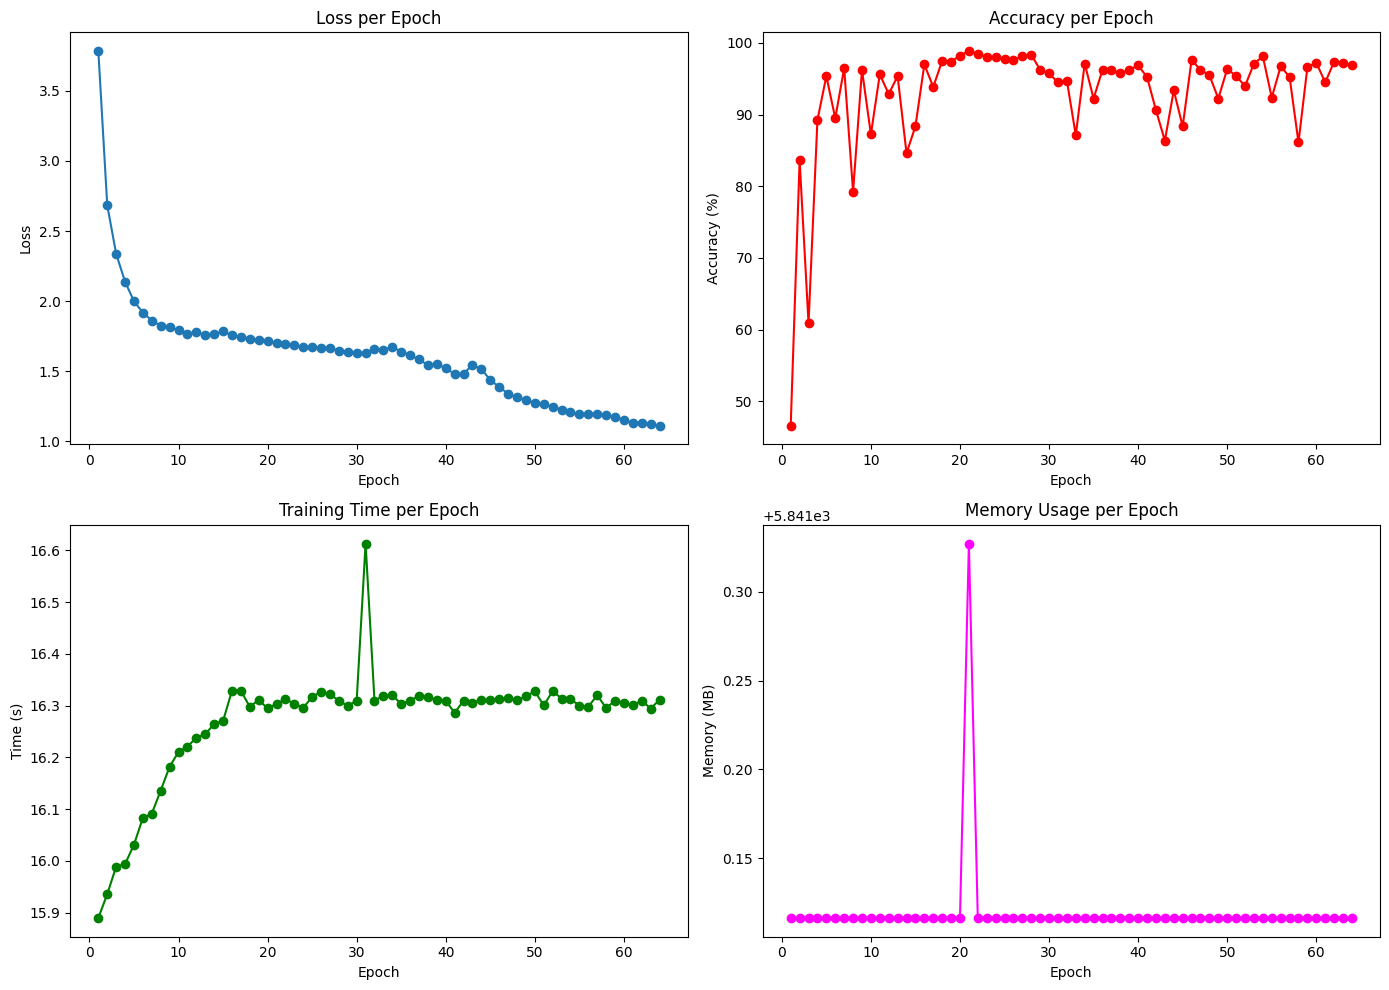

In [ ]:
import matplotlib.pyplot as plt
# Plotting
epochs = range(1, 65)
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['loss'], marker='o', linestyle='-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['accuracy'], marker='o', linestyle='-', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['training_time'], marker='o', linestyle='-', color='green')
plt.title('Training Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['memory_usage'], marker='o', linestyle='-', color='magenta')
plt.title('Memory Usage per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Memory (MB)')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# 将数据转换为DataFrame
df = pd.DataFrame(metrics)

# 保存DataFrame到CSV文件
df.to_csv("/content/drive/MyDrive/result_rep_vit_and_mobile_vit/model_performance_metrics2.csv", index=False)
print("Data saved to 'model_performance_metrics.csv'")

Data saved to 'model_performance_metrics.csv'


In [ ]:
def evaluate_accuracy_combined_loss(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy:{100 * correct / total}%")
    return 100 * correct / total

In [ ]:
accuracy = evaluate_accuracy_combined_loss(model_mobilevit, test_loader)
torch.save(model_mobilevit.state_dict(), '/content/drive/My Drive/dl_model/student_model_mobilevit_5.pth')

Accuracy:96.875%


***Finally, it was found that the accuracy was not low.***

# Bonus

In [10]:
bonus_labels = []
bonus_vector = []
with open('/content/drive/MyDrive/data/cdigits_digits_labels.txt','r') as file:
    for line in file:
        bonus_labels.append(int(line.strip()))
print("bonus_labels:",bonus_labels)
with open('/content/drive/MyDrive/data/cdigits_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    bonus_vector.append(line_data)
print("bonus_vector:",bonus_vector)


bonus_labels: [7, 5, 3, 2, 9, 0, 1, 2, 9, 3, 9, 6, 0, 6, 2, 4, 9, 4, 0, 5, 7, 8, 2, 9, 8, 1, 9, 4, 1, 2, 4, 2, 0, 5, 1, 9, 7, 0, 2, 4, 5, 6, 2, 3, 3, 6, 8, 6, 4, 8, 8, 8, 1, 1, 4, 8, 4, 6, 3, 4, 8, 8, 6, 8, 3, 3, 9, 5, 3, 7, 9, 2, 8, 8, 3, 3, 2, 4, 5, 0, 7, 8, 6, 5, 0, 4, 6, 5, 9, 9, 1, 3, 1, 9, 1, 7, 3, 4, 2, 7, 1, 6, 7, 9, 5, 5, 4, 2, 5, 7, 1, 7, 3, 2, 1, 1, 0, 4, 2, 0, 5, 0, 5, 1, 0, 9, 4, 1, 3, 5, 3, 0, 6, 6, 5, 6, 8, 0, 6, 0, 0, 2, 7, 7, 9, 8, 6, 7, 7, 7]
bonus_vector: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Machine Learning

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

## A. Reading all best models in one directory and testing together

In [ ]:
import os
import pickle
from tqdm import tqdm
def load_pkl_models(directory):
    models = []
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith('.pkl'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'rb') as file:
                model = pickle.load(file)
                models.append(model)
            print(f"Loaded model from {filepath}")
    return models

# 路径应该替换成您存放模型的实际路径
directory_path = '/content/drive/MyDrive/ml_model_new/'
loaded_models = load_pkl_models(directory_path)
print("Model reading successfully!")
max_ml_accuracy = 0
best_ml_model = None
# 如果你想测试每个模型的功能，例如打印模型的概述
for model in tqdm(loaded_models):
    predictions = model.predict(bonus_train_scaled)
    accuracy = accuracy_score(bonus_train_labels, predictions)
    if accuracy>max_ml_accuracy:
        max_ml_accuracy=accuracy
        best_ml_model = model
print("\nbest_model:",model)
print("max_ml_accuracy:",max_ml_accuracy)

100%|██████████| 10/10 [00:00<00:00, 93.93it/s]


Loaded model from /content/drive/MyDrive/ml_model_new/svm_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/logreg_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/gnb_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/knn_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/rf_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/gb_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/mlp_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/ada_best_model.pkl
Loaded model from /content/drive/MyDrive/ml_model_new/et_best_model.pkl
Model reading successfully!


100%|██████████| 9/9 [00:00<00:00, 25.21it/s]

best_model: ExtraTreesClassifier(random_state=42)
max_ml_accuracy: 0.6666666666666666


Find that no k-fold cross validation, the best model(ExtraTrees) has accuracy 66%

## B. Reading all best models in one directory and testing together

In [ ]:
import os
import pickle
from tqdm import tqdm
def load_pkl_models(directory):
    models = []
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith('.pkl'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'rb') as file:
                model = pickle.load(file)
                models.append(model)
            print(f"Loaded model from {filepath}")
    return models

# 路径应该替换成您存放模型的实际路径
directory_path = '/content/drive/MyDrive/ml_model_old/'
loaded_models = load_pkl_models(directory_path)
print("Model reading successfully!")
max_ml_accuracy = 0
best_ml_model = None
# 如果你想测试每个模型的功能，例如打印模型的概述
for model in tqdm(loaded_models):
    predictions = model.predict(bonus_train_scaled)
    accuracy = accuracy_score(bonus_train_labels, predictions)
    if accuracy>max_ml_accuracy:
        max_ml_accuracy=accuracy
        best_ml_model = model
print("best_model:",model)
print("max_ml_accuracy:",max_ml_accuracy)

100%|██████████| 10/10 [00:00<00:00, 44.35it/s]


Loaded model from /content/drive/MyDrive/ml_model_old/model_svm_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_logreg_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_gnb_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_knn_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_rf_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_gb_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_mlp_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_ada_no_cross_val_2.pkl
Loaded model from /content/drive/MyDrive/ml_model_old/model_et_no_cross_val_2.pkl
Model reading successfully!


100%|██████████| 9/9 [00:00<00:00, 18.46it/s]

best_model: ExtraTreesClassifier(random_state=42)
max_ml_accuracy: 0.7533333333333333


# Deep Learning

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from time import time

In [14]:
bonus_labels = []
bonus_vector = []
with open('/content/drive/MyDrive/data/cdigits_digits_labels.txt','r') as file:
    for line in file:
        bonus_labels.append(int(line.strip()))
print("bonus_labels:",bonus_labels)
with open('/content/drive/MyDrive/data/cdigits_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    bonus_vector.append(line_data)
print("bonus_vector:",bonus_vector)
selected_indices = list(range(len(bonus_labels)))

bonus_labels: [7, 5, 3, 2, 9, 0, 1, 2, 9, 3, 9, 6, 0, 6, 2, 4, 9, 4, 0, 5, 7, 8, 2, 9, 8, 1, 9, 4, 1, 2, 4, 2, 0, 5, 1, 9, 7, 0, 2, 4, 5, 6, 2, 3, 3, 6, 8, 6, 4, 8, 8, 8, 1, 1, 4, 8, 4, 6, 3, 4, 8, 8, 6, 8, 3, 3, 9, 5, 3, 7, 9, 2, 8, 8, 3, 3, 2, 4, 5, 0, 7, 8, 6, 5, 0, 4, 6, 5, 9, 9, 1, 3, 1, 9, 1, 7, 3, 4, 2, 7, 1, 6, 7, 9, 5, 5, 4, 2, 5, 7, 1, 7, 3, 2, 1, 1, 0, 4, 2, 0, 5, 0, 5, 1, 0, 9, 4, 1, 3, 5, 3, 0, 6, 6, 5, 6, 8, 0, 6, 0, 0, 2, 7, 7, 9, 8, 6, 7, 7, 7]
bonus_vector: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
test_X_bonus = torch.Tensor([np.array(bonus_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_Y_bonus = torch.LongTensor(bonus_labels)
test_loader_bonus = DataLoader(TensorDataset(test_X_bonus, test_Y_bonus), batch_size=32, shuffle=False)

## Neural Networks

In [ ]:
# 定义模型
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

In [ ]:
model_nn = NeuralNet()
model_nn.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/best_nn_model.pth'))
model_nn.to("cuda")
# 评估模型
model_nn.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader_bonus:
        data, target = data.to("cuda"), target.to("cuda")
        outputs = model_nn(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 68.66666666666667 %


In [ ]:
model_nn = NeuralNet()
model_nn.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/best_nn_model_new.pth'))
model_nn.to("cuda")
# 评估模型
model_nn.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader_bonus:
        data, target = data.to("cuda"), target.to("cuda")
        outputs = model_nn(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 62.666666666666664 %


## CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 1024)
        self.fc2 = nn.Linear(1024, 10)  # 假设有10个类别

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model_cnn = CNN()
model_cnn.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/best_model_cnn.pth'))
model_cnn.to(device)
model_cnn.eval()

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader_bonus:
        data, target = data.to(device), target.to(device)
        outputs = model_cnn(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {test_accuracy} %')

Accuracy of the network on the test images: 85.33333333333333 %


In [ ]:
model_cnn = CNN()
model_cnn.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/best_model_cnn_new.pth'))
model_cnn.to(device)
model_cnn.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader_bonus:
        data, target = data.to(device), target.to(device)
        outputs = model_cnn(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {test_accuracy} %')

Accuracy of the network on the test images: 82.66666666666667 %


## LeNet-5

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 输入通道1, 输出通道6, 卷积核大小5
        self.pool = nn.MaxPool2d(2, 2)   # 池化层, 窗口大小2, 步长2
        self.conv2 = nn.Conv2d(6, 16, 5) # 输入通道6, 输出通道16, 卷积核大小5
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 输入特征维度, 输出特征维度
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 假设有10个类别

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model_net5 = LeNet5()
model_net5.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/best_model_LeNet5.pth'))
model_net5.to(device)
model_net5.eval()


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# 评估模型
model_net5.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader_bonus:
        data, target = data.to(device), target.to(device)
        outputs = model_net5(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 82.66666666666667 %


In [ ]:
model_net5 = LeNet5()
model_net5.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/best_model_LeNet5_new.pth'))
model_net5.to(device)
model_net5.eval()


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# 评估模型
model_net5.eval()  # 将模型设置为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader_bonus:
        data, target = data.to(device), target.to(device)
        outputs = model_net5(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 84.0 %


## VIT-small

In [ ]:
# 定义ViT模型
class ViTClassifier(torch.nn.Module):
    def __init__(self, num_labels=10):
        super(ViTClassifier, self).__init__()
        self.num_labels = num_labels
        self.vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=self.num_labels)
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

    def forward(self, x):
        inputs = self.feature_extractor(images=x, return_tensors="pt").to(torch.device("cuda"))
        outputs = self.vit(**inputs)
        logits = outputs.logits
        return logits


In [ ]:
# 测试函数
def eval_model_vit_base(model, data_loader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for images, _ in tqdm(data_loader):
            images = images.to(device)
            images = images.repeat(1, 3, 1, 1)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())

    return predictions


In [ ]:
model_vit_small = ViTClassifier(num_labels=10).to(device)
model_vit_small.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_vit_small.pth'))
model_vit_small.to(device)
predictions = eval_model_vit_base(model_vit_small, test_loader_bonus)
print("\nModel prediction accuracy on test set:", np.mean(np.array(predictions) == test_Y_bonus.numpy()))

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 5/5 [00:01<00:00,  4.57it/s]


Model prediction accuracy on test set: 0.9333333333333333


In [ ]:
model_vit_small = ViTClassifier(num_labels=10).to(device)
model_vit_small.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_vit_small_new.pth'))
model_vit_small.to(device)
predictions = eval_model_vit_base(model_vit_small, test_loader_bonus)
print("\nModel prediction accuracy on test set:", np.mean(np.array(predictions) == test_Y_bonus.numpy()))

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 5/5 [00:01<00:00,  4.65it/s]


Model prediction accuracy on test set: 0.9133333333333333


## Vit-Huge

In [18]:
test_loader_bonus = DataLoader(TensorDataset(test_X_bonus, test_Y_bonus), batch_size=64, shuffle=False)

In [14]:
# 定义 ViT 模型
class ViTClassifierHuge(torch.nn.Module):
    def __init__(self, num_labels=10):
        super(ViTClassifierHuge, self).__init__()
        self.vit = ViTForImageClassification.from_pretrained('google/vit-huge-patch14-224-in21k',
                                                             num_labels=num_labels)
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-huge-patch14-224-in21k')

    def forward(self, x):
        inputs = self.feature_extractor(images=x, return_tensors="pt").to(device)
        outputs = self.vit(**inputs)
        logits = outputs.logits
        return logits

In [15]:
# 测试模型性能
def evaluate_epoch_huge_vit(model, data_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in tqdm(data_loader):
            images, labels = images.to(device), labels.to(device)
            images = images.repeat(1, 3, 1, 1)  # 调整为3通道
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

In [16]:
model_huge_vit = ViTClassifierHuge().to('cuda')
model_huge_vit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_huge_vit.pth'))
model_huge_vit.to("cuda")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-huge-patch14-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTClassifierHuge(
  (vit): ViTForImageClassification(
    (vit): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0-31): 32 x ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=1280, out_features=1280, bias=True)
                (key): Linear(in_features=1280, out_features=1280, bias=True)
                (value): Linear(in_features=1280, out_features=1280, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=1280, out_features=1280, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
   

In [19]:
evaluate_epoch_huge_vit(model_huge_vit, test_loader_bonus)

100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

Accuracy on the test set: 93.33%


## CNN+Base_VIT

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.adapool = nn.AdaptiveAvgPool2d((7, 7))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(64 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.adapool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [ ]:
def distillation_loss(student_logits, labels, teacher_logits, T=3.0, alpha=0.5):
    """
    计算知识蒸馏损失。
    :param student_logits: 学生模型的输出
    :param labels: 真实标签
    :param teacher_logits: 教师模型的输出
    :param T: 蒸馏温度
    :param alpha: 平衡参数
    :return: 组合损失
    """
    student_loss = nn.CrossEntropyLoss()(student_logits, labels)
    distill_loss = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(student_logits / T, dim=1),F.softmax(teacher_logits / T, dim=1)) * (T * T)
    return alpha * distill_loss + (1. - alpha) * student_loss

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# 定义ViT模型
class ViTClassifier_base_vit(torch.nn.Module):
    def __init__(self, num_labels=10):
        super(ViTClassifier_base_vit, self).__init__()
        self.num_labels = num_labels
        self.vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=self.num_labels)
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

    def forward(self, x):
        x = x / 255.0  # 如果images在[0, 255]的范围
        inputs = self.feature_extractor(images=x, return_tensors="pt").to(torch.device("cuda"))
        outputs = self.vit(**inputs)
        logits = outputs.logits
        return logits


In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import matplotlib.pyplot as plt


def evaluate_model_cnn_vit(model, test_loader):
    """
    评估模型在测试集上的表现。
    :param model: 要评估的模型
    :param test_loader: 测试数据加载器
    :return: None
    """
    model.eval()  # 设置为评估模式
    correct = 0
    total = 0
    with torch.no_grad():  # 在评估过程中不需要计算梯度
        for images, labels in test_loader:
            images, labels = images.to('cuda'), labels.to('cuda')

            # 调整图像尺寸以适配模型输入大小
            images = images.view(-1, 1, 28, 28)  # 对于MNIST数据集
            images = F.interpolate(images, size=(224, 224), mode='bilinear', align_corners=False)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')
    return  correct / total

## Student Model CNN 1

In [ ]:
student_model = SimpleCNN().to('cuda')
student_model.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_cnn_2.pth'))
student_model.to("cuda")

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (adapool): AdaptiveAvgPool2d(output_size=(7, 7))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [ ]:
evaluate_model_cnn_vit(student_model, test_loader_bonus)

Accuracy on the test set: 76.67%


0.7666666666666667

## Student Model CNN 2

In [ ]:
student_model = SimpleCNN().to('cuda')
student_model.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_cnn_2_new.pth'))
student_model.to("cuda")

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (adapool): AdaptiveAvgPool2d(output_size=(7, 7))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [ ]:
evaluate_model_cnn_vit(student_model, test_loader_bonus)

Accuracy on the test set: 78.67%


0.7866666666666666

## Student Model CNN 3

In [ ]:
student_model = SimpleCNN().to('cuda')
student_model.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_cnn_2_new2.pth'))
student_model.to("cuda")

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (adapool): AdaptiveAvgPool2d(output_size=(7, 7))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [ ]:
evaluate_model_cnn_vit(student_model, test_loader_bonus)

Accuracy on the test set: 78.67%


0.7866666666666666

## Student Model CNN 3 temperature=3

In [ ]:
student_model = SimpleCNN().to('cuda')
student_model.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_cnn_2_new3.pth'))
student_model.to("cuda")

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (adapool): AdaptiveAvgPool2d(output_size=(7, 7))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [ ]:
evaluate_model_cnn_vit(student_model, test_loader_bonus)

Accuracy on the test set: 82.00%


0.82

## Rep-Vit

In [18]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset

# 扩展灰度图像到三通道
def expand_to_rgb(x):
    return x.repeat(3, 1, 1)

# 定义转换操作：调整大小并进行标准化
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 准备数据集
def prepare_dataset(data, labels, transform):

    data = data.repeat(1, 3, 1, 1)  # 转换为三通道
    data = transform(data)  # 应用转换
    dataset = TensorDataset(data, labels)
    return dataset
# 转换数据和创建 DataLoader
test_dataset_rep_vit = prepare_dataset(test_X_bonus, test_Y_bonus, transform)
test_loader_rep_vit = DataLoader(test_dataset_rep_vit, batch_size=64, shuffle=False)



In [19]:
# 测试函数
def test_rep_vit(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')
    return correct / total
# 加载预训练模型
rep_vit = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
rep_vit.head = nn.Linear(640, 10)  # 更改输出层
rep_vit = rep_vit.cuda()  # 使用 GPU
rep_vit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_rep_vit_new.pth'))
test_rep_vit(rep_vit,test_loader_rep_vit)

Accuracy: 62.666666666666664%


0.6266666666666667

In [ ]:
# 加载预训练模型
rep_vit = timm.create_model('repvit_m2_3.dist_450e_in1k', pretrained=True)
rep_vit.head = nn.Linear(640, 10)  # 更改输出层
rep_vit = rep_vit.cuda()  # 使用 GPU
rep_vit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_rep_vit_new2.pth'))
test_rep_vit(rep_vit,test_loader_rep_vit)

Accuracy: 72.0%


0.72

## Rep-vit m3

In [10]:
!pip install timm

**training for more than two eopchs**

In [20]:
import timm
# 加载预训练模型
rep_vit = timm.create_model('repvit_m3.dist_in1k', pretrained=True)
rep_vit.head = nn.Linear(512, 10)  # 更改输出层
rep_vit = rep_vit.cuda()  # 使用 GPU
rep_vit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_rep_vit_m3.pth'))
test_rep_vit(rep_vit,test_loader_rep_vit)

Accuracy: 87.33333333333333%


0.8733333333333333

**training for more than one eopchs**

In [21]:
import timm
# 加载预训练模型
rep_vit = timm.create_model('repvit_m3.dist_in1k', pretrained=True)
rep_vit.head = nn.Linear(512, 10)  # 更改输出层
rep_vit = rep_vit.cuda()  # 使用 GPU
rep_vit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/model_rep_vit_m3_2.pth'))
test_rep_vit(rep_vit,test_loader_rep_vit)

Accuracy: 86.66666666666667%


0.8666666666666667

**不训练**

In [22]:
# 加载预训练模型
rep_vit = timm.create_model('repvit_m3.dist_in1k', pretrained=True)
rep_vit.head = nn.Linear(512, 10)  # 更改输出层
rep_vit = rep_vit.cuda()  # 使用 GPU
test_rep_vit(rep_vit, test_loader_rep_vit)

Accuracy: 8.666666666666666%


0.08666666666666667

## cnn+rep-vit: combine soft and hard targets

In [ ]:
import torch.nn as nn
import timm

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x
# 转换函数：单通道转三通道
def convert_to_3_channels(x):
    return x.repeat(3, 1, 1)

bonus_labels = []
bonus_vector = []
with open('/content/drive/MyDrive/data/cdigits_digits_labels.txt','r') as file:
    for line in file:
        bonus_labels.append(int(line.strip()))
print("bonus_labels:",bonus_labels)
with open('/content/drive/MyDrive/data/cdigits_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    bonus_vector.append(line_data)
print("bonus_vector:",bonus_vector)
selected_indices = list(range(len(bonus_labels)))


test_X_bonus = torch.stack([convert_to_3_channels(torch.Tensor(np.array(bonus_vector[index]).reshape(1, 28, 28))) for index in selected_indices])
test_Y_bonus = torch.LongTensor(bonus_labels)
test_loader_bonus = DataLoader(TensorDataset(test_X_bonus, test_Y_bonus), batch_size=32, shuffle=False)

bonus_labels: [7, 5, 3, 2, 9, 0, 1, 2, 9, 3, 9, 6, 0, 6, 2, 4, 9, 4, 0, 5, 7, 8, 2, 9, 8, 1, 9, 4, 1, 2, 4, 2, 0, 5, 1, 9, 7, 0, 2, 4, 5, 6, 2, 3, 3, 6, 8, 6, 4, 8, 8, 8, 1, 1, 4, 8, 4, 6, 3, 4, 8, 8, 6, 8, 3, 3, 9, 5, 3, 7, 9, 2, 8, 8, 3, 3, 2, 4, 5, 0, 7, 8, 6, 5, 0, 4, 6, 5, 9, 9, 1, 3, 1, 9, 1, 7, 3, 4, 2, 7, 1, 6, 7, 9, 5, 5, 4, 2, 5, 7, 1, 7, 3, 2, 1, 1, 0, 4, 2, 0, 5, 0, 5, 1, 0, 9, 4, 1, 3, 5, 3, 0, 6, 6, 5, 6, 8, 0, 6, 0, 0, 2, 7, 7, 9, 8, 6, 7, 7, 7]
bonus_vector: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# 初始化模型
student_model = SimpleCNN().to("cuda")
student_model.load_state_dict(torch.load('/content/drive/My Drive/dl_model/student_model_rep_vit_cnn_new.pth'))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader_bonus:
        data, target = data.cuda(),target.cuda()
        outputs = student_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
print(f'Accuracy: {100 * correct / total}%')

Accuracy: 62.666666666666664%


## Rep-Vit + Mobile-Vit

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import numpy as np
from tqdm import tqdm

In [ ]:
bonus_labels = []
bonus_vector = []
with open('/content/drive/MyDrive/data/cdigits_digits_labels.txt','r') as file:
    for line in file:
        bonus_labels.append(int(line.strip()))
print("bonus_labels:",bonus_labels)
with open('/content/drive/MyDrive/data/cdigits_digits_vec.txt','r') as file:
    lines = file.readlines()
for line in lines:
    line_data = [int(item.strip()) for item in line.split('\t')]
    bonus_vector.append(line_data)
print("bonus_vector:",bonus_vector)
selected_indices = list(range(len(bonus_labels)))

bonus_labels: [7, 5, 3, 2, 9, 0, 1, 2, 9, 3, 9, 6, 0, 6, 2, 4, 9, 4, 0, 5, 7, 8, 2, 9, 8, 1, 9, 4, 1, 2, 4, 2, 0, 5, 1, 9, 7, 0, 2, 4, 5, 6, 2, 3, 3, 6, 8, 6, 4, 8, 8, 8, 1, 1, 4, 8, 4, 6, 3, 4, 8, 8, 6, 8, 3, 3, 9, 5, 3, 7, 9, 2, 8, 8, 3, 3, 2, 4, 5, 0, 7, 8, 6, 5, 0, 4, 6, 5, 9, 9, 1, 3, 1, 9, 1, 7, 3, 4, 2, 7, 1, 6, 7, 9, 5, 5, 4, 2, 5, 7, 1, 7, 3, 2, 1, 1, 0, 4, 2, 0, 5, 0, 5, 1, 0, 9, 4, 1, 3, 5, 3, 0, 6, 6, 5, 6, 8, 0, 6, 0, 0, 2, 7, 7, 9, 8, 6, 7, 7, 7]
bonus_vector: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test_X_bonus = torch.Tensor([np.array(bonus_vector[index]).reshape(1, 28, 28) for index in selected_indices])
test_Y_bonus = torch.LongTensor(bonus_labels)

In [ ]:
def evaluate_accuracy_combined_loss(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')
    return 100 * correct / total
# 数据转换：从1通道转换为3通道，调整大小至合适的输入尺寸
transform = Compose([
    Lambda(lambda x: x.repeat(3, 1, 1)),  # 重复通道
    Resize((224, 224)),  # 调整图像大小以符合模型输入
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])

# 应用转换和创建数据加载器
def apply_transform(data):
    transformed_data = torch.stack([transform(x) for x in data])
    return transformed_data

In [ ]:
test_X_bonus = apply_transform(test_X_bonus)
test_loader_bonus = DataLoader(TensorDataset(test_X_bonus, test_Y_bonus), batch_size=32, shuffle=False)

In [ ]:
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)
model_mobilevit = model_mobilevit.to("cuda")
model_mobilevit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_mobilevit.pth'))

<All keys matched successfully>

In [ ]:
evaluate_accuracy_combined_loss(model_mobilevit, test_loader_bonus)

Accuracy: 83.33333333333333%


83.33333333333333

In [ ]:
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)
model_mobilevit = model_mobilevit.to(device)
model_mobilevit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_mobilevit_2.pth'))

<All keys matched successfully>

In [ ]:
evaluate_accuracy_combined_loss(model_mobilevit, test_loader_bonus)

Accuracy: 88.66666666666667%


88.66666666666667

In [ ]:
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)
model_mobilevit = model_mobilevit.to(device)
model_mobilevit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_mobilevit_3.pth'))

<All keys matched successfully>

In [ ]:
evaluate_accuracy_combined_loss(model_mobilevit, test_loader_bonus)

Accuracy: 87.33333333333333%


87.33333333333333

In [ ]:
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)
model_mobilevit = model_mobilevit.to(device)
model_mobilevit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_mobilevit_4.pth'))

<All keys matched successfully>

In [ ]:
evaluate_accuracy_combined_loss(model_mobilevit, test_loader_bonus)

Accuracy: 86.66666666666667%


86.66666666666667

In [ ]:
model_mobilevit = timm.create_model('mobilevit_xxs.cvnets_in1k', pretrained=True, num_classes=10)
model_mobilevit = model_mobilevit.to(device)
model_mobilevit.load_state_dict(torch.load('/content/drive/MyDrive/dl_model/student_model_mobilevit_5.pth'))

<All keys matched successfully>

In [ ]:
evaluate_accuracy_combined_loss(model_mobilevit, test_loader_bonus)

Accuracy:90.0%


90.0